#Read Data and preprocess

In [ ]:
import os
import numpy
import pandas
idx=pandas.IndexSlice
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model


In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

In [ ]:
fname=("uiuc-gpa-dataset.csv","https://drive.google.com/file/d/17iMVJ64MWmxCTf-oP779c3vrA3UGFCOI/view?usp=sharing")

In [ ]:
data_raw = getfile(fname)
data_raw.head()

local file not found; accessing Google Drive


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"


In [ ]:
#data_raw.to_pickle("./working_dataset.pkl")

In [ ]:
data_raw['Subject'].value_counts()

ECON    3498
ACCY    2543
MATH    2482
BADM    2446
MCB     2107
        ... 
GRKM       2
CB         2
JS         2
HNDI       1
DTX        1
Name: Subject, Length: 168, dtype: int64

In [ ]:
debugging_df = data_raw.groupby('Subject').filter(lambda x: len(x)>10).sample(n=500, random_state=42)
debugging_df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
28714,2016,Spring,2016-sp,ECON,203,Economic Statistics II,LAB,0,5,2,...,1,6,6,1,2,2,6,0,0,"Stevens, Alexander N"
34996,2015,Summer,2015-su,ANSC,331,Biology of Reproduction,ONL,6,6,4,...,0,0,2,0,0,0,0,0,0,"Nowak, Romana A"
9827,2020,Winter,2020-wi,FSHN,120,Contemporary Nutrition,ONL,0,58,0,...,0,0,6,0,0,3,0,0,1,"Burkhalter, Toni M"
53466,2011,Summer,2011-su,ACCY,512,Risk Measurement/Reporting II,LCD,2,25,6,...,0,0,0,0,0,0,0,0,0,"Schwartz, Rachel"
57642,2010,Fall,2010-fa,HIST,439,The Ottoman Empire,LCD,1,11,3,...,2,1,0,0,0,0,0,3,1,"Todorova, Maria N"


In [ ]:
debugging_df['Subject'].value_counts()

ECON    30
BADM    24
CS      22
MATH    22
PSYC    19
        ..
REL      1
ACES     1
ENSU     1
ATMS     1
HRD      1
Name: Subject, Length: 100, dtype: int64

In [ ]:
# debugging_df.to_pickle("./debugging_dataset.pkl")

In [ ]:
def getpickle(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_pickle(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_pickle(loc,**kwargs)
    return out

In [ ]:
fname=("working_dataset.pkl", "https://drive.google.com/file/d/1ihNXt1tef8zR7CqvAtooysEC7b5dyYkZ/view?usp=sharing")
data = getpickle(fname) 
data.head()

local file not found; accessing Google Drive


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"


In [ ]:
print(data.shape)

(61557, 22)


In [ ]:
data.columns

Index(['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Course Title',
       'Sched Type', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+',
       'D', 'D-', 'F', 'W', 'Primary Instructor'],
      dtype='object')

In [ ]:
data['Year'].value_counts()

2011    7970
2010    5423
2015    5218
2017    5093
2021    5092
2013    5045
2019    5041
2018    5029
2016    4969
2014    4957
2020    4855
2012    2865
Name: Year, dtype: int64

In [ ]:
data

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61552,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
61553,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,0,"Unger, David"
61554,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
61555,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


#Milestone 2

In [ ]:
#label Encoding Term and dropping YearTerm

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df=data
# Encode labels in column 'species'.
df['Term']= label_encoder.fit_transform(df['Term'])
df = df.drop('YearTerm', axis=1)


In [ ]:
df

,Year,Term,Subject,Number,Course Title,Sched Type,A+,A,A-,B+,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,0,AAS,100,Intro Asian American Studies,DIS,2,14,2,3,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,0,AAS,100,Intro Asian American Studies,DIS,0,15,0,3,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,0,AAS,100,Intro Asian American Studies,OD,7,4,1,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,0,AAS,100,Intro Asian American Studies,DIS,1,18,0,2,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,0,AAS,100,Intro Asian American Studies,DIS,0,16,1,3,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61552,2010,2,STAT,410,Statistics and Probability II,LEC,5,10,2,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
61553,2010,2,STAT,440,Statistical Data Management,LEC,4,12,8,1,...,0,0,0,0,0,0,0,0,0,"Unger, David"
61554,2010,2,TAM,212,Introductory Dynamics,LEC,0,1,3,2,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
61555,2010,2,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,1,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


In [ ]:
#Creatinig a New Column CourseCode by combining Subject, Number and dropping the Course Title, Subject and Number Columns

df["CourseCode"] = (data["Subject"] + " " + df["Number"].astype('str'))
df.drop(['Course Title','Subject','Number'],axis=1,inplace=True)

In [ ]:
df.head()

,Year,Term,Sched Type,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor,CourseCode
0,2021,0,DIS,2,14,2,3,5,3,0,1,0,0,0,0,0,0,"Zheng, Reanne",AAS 100
1,2021,0,DIS,0,15,0,3,5,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L",AAS 100
2,2021,0,OD,7,4,1,1,7,0,2,3,0,0,1,0,1,0,"Wang, Yu",AAS 100
3,2021,0,DIS,1,18,0,2,4,1,0,0,0,0,0,0,0,0,"Zheng, Reanne",AAS 100
4,2021,0,DIS,0,16,1,3,5,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L",AAS 100


## Converting Grades to a Overall GPA Value for every single Course and Instructor

In [ ]:
## Need to Convert the Grades to a Overall Gpa Value
# First we will Drop the 'W' Column and define the Grades as well as their corresponding Weightage
df.drop(['W'],axis=1,inplace=True)
grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
WEIGHT = [4.00, 4.00, 3.67, 3.33, 3, 2.67, 2.33, 2, 1.67, 1.33, 1, 0.67, 0]
df['GPA'] = df[grades].mul(WEIGHT).sum(1)/df[grades].sum(axis=1)


In [ ]:
#drop the Grades Column since we do not really need it
df_new=df.drop(grades,axis=1)


In [ ]:
##The Newly Computed GPA Values
df_new

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [ ]:
df['GPA'].describe()

count    61557.000000
mean         3.356943
std          0.399213
min          1.142857
25%          3.102609
50%          3.411548
75%          3.667778
max          3.995350
Name: GPA, dtype: float64

In [ ]:
## This is the Course + Instructor Wise Average GPA


instructor_Course = df.groupby(['Primary Instructor', 'CourseCode'])['GPA'].mean().reset_index()
print(instructor_Course)

            Primary Instructor CourseCode       GPA
0           Aadland, Matthew A   GEOG 101  3.065463
1           Abbamonte, Peter M   PHYS 402  3.405047
2           Abbamonte, Peter M   PHYS 435  3.154046
3           Abbamonte, Peter M   PHYS 436  3.284651
4           Abbamonte, Peter M   PHYS 486  2.879787
...                        ...        ...       ...
17453     van der Veen, Renske   CHEM 442  2.914418
17454  van der Velde, Adrian T   HIST 100  3.022333
17455  van der Velde, Adrian T   HIST 255  3.667391
17456  van der Velde, Adrian T   HIST 308  3.051538
17457     van der Zande, Arend     ME 370  3.435548

[17458 rows x 3 columns]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
instructor_Course

,Primary Instructor,CourseCode,GPA
0,"Aadland, Matthew A",GEOG 101,3.065463
1,"Abbamonte, Peter M",PHYS 402,3.405047
2,"Abbamonte, Peter M",PHYS 435,3.154046
3,"Abbamonte, Peter M",PHYS 436,3.284651
4,"Abbamonte, Peter M",PHYS 486,2.879787
...,...,...,...
17453,"van der Veen, Renske",CHEM 442,2.914418
17454,"van der Velde, Adrian T",HIST 100,3.022333
17455,"van der Velde, Adrian T",HIST 255,3.667391
17456,"van der Velde, Adrian T",HIST 308,3.051538


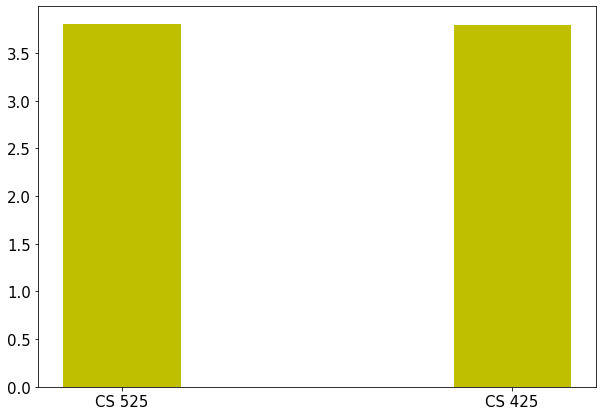

In [ ]:
# Given a Instructor Name, plot average GPA of all Courses Taught by that Instructor 

from matplotlib import pyplot as plt

def plot_course(df,instructor_name):
  test= df.loc[df['Primary Instructor'] == instructor_name]
  fig = plt.figure(figsize =(10, 7))
  plt.bar(test['CourseCode'], test['GPA'],width = 0.3,color='y')

plot_course(df,'Gupta, Indranil')

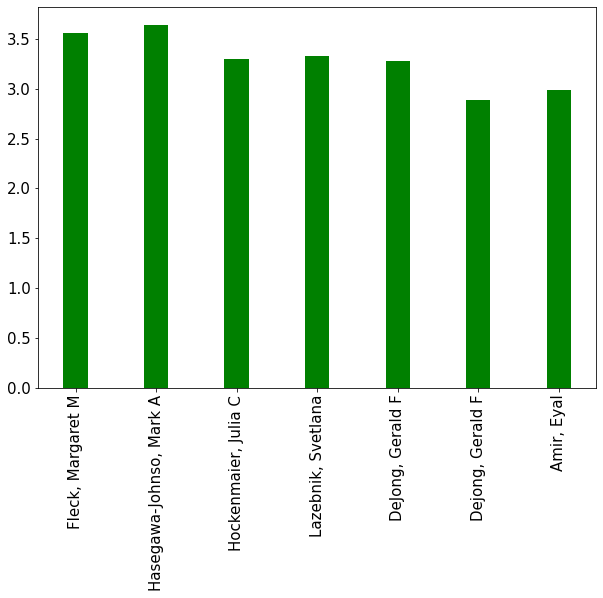

In [ ]:
# Given a Course, plot average GPA for that Course for All Instructors 

from matplotlib import pyplot as plt

def plot_instructor(df,course):
  test= df.loc[df['CourseCode'] == course]
  fig = plt.figure(figsize =(10, 7))
  plt.bar(test['Primary Instructor'], test['GPA'],width = 0.3,color='g')
  plt.xticks(rotation=90)

plot_instructor(df,'CS 440')

In [ ]:
df_new

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [ ]:
df_new.isna().sum()

Year                      0
Term                      0
Sched Type            10053
Primary Instructor      171
CourseCode                0
GPA                       0
dtype: int64

In [ ]:
## dropping all the rows with Null values
df_notna = df_new.dropna()

In [ ]:
df_notna

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [ ]:
df_notna.head()

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500


In [ ]:

##There are multiple rows present where the columns Year,Term,Sched Type, Primary Instructor and Course Code have the exact same value. We can combine these rows and take average over the GPA column

df_final = df_notna.groupby(['Year','Term','Sched Type','Primary Instructor', 'CourseCode'])['GPA'].mean().reset_index()


In [ ]:
df_final

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2010,0,CNF,"Faughn, Shirley J",CMN 304,3.885312
1,2010,0,CNF,"Hicks, Stewart R",ARCH 101,2.911854
2,2010,0,CNF,"Kelley, Margaret S",SOC 396,2.421304
3,2010,0,CNF,"Lapunzina, Alejandro",ARCH 199,3.430625
4,2010,0,CNF,"Lapunzina, Alejandro",ARCH 409,3.395833
...,...,...,...,...,...,...
38643,2021,3,ONL,"Tomkin, Jonathan H",ESE 360,3.111429
38644,2021,3,ONL,"Vazquez, Jose J",ECON 437,3.771343
38645,2021,3,ONL,"White, Judith B",BADM 310,3.888047
38646,2021,3,ONL,"Woodson, Markisha J",CHLH 101,3.222222


#Milestone 3

## One-Hot and Target Encoding the features

The Schedule Type is a categorical feature with 21 different types. We use one-hot encoding to encode this feature.

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_final, columns = ['Sched Type'])

To remove superfluous information from the Year attribute, we only extract the last two digits of each year. This reduces redundant information while keeping the information intact.

In [ ]:
one_hot_encoded_data['Year'] = one_hot_encoded_data['Year'].apply(lambda x: int(str(x)[-2:]))

The other two categorical features i.e. CourseCode and Primary Instructor have around 12,000 different categories in total. On performing a one-hot encoding for these two attributes, it would result in a feature explosion for the deep learning model. On the other hand, using just label encoding would induce an order between the categories although it wouldn't be intended. To overcome this, we use target encoding with mean smoothing (to avoid overfitting). This technique provides a middle-ground to us by eliminating the large number of features but also inducing significant meaning to the encoding as opposed to label encoding.

In [ ]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [ ]:
one_hot_encoded_data['CourseCode'] = calc_smooth_mean(one_hot_encoded_data, by='CourseCode', on='GPA', m=10)
one_hot_encoded_data['Primary Instructor'] = calc_smooth_mean(one_hot_encoded_data, by='Primary Instructor', on='GPA', m=10)

In [ ]:
one_hot_encoded_data

,Year,Term,Primary Instructor,CourseCode,GPA,Sched Type_CNF,Sched Type_DIS,Sched Type_INT,Sched Type_Int,Sched Type_LAB,...,Sched Type_OD,Sched Type_OLB,Sched Type_OLC,Sched Type_ONL,Sched Type_Onl,Sched Type_PKG,Sched Type_PR,Sched Type_Q,Sched Type_SEM,Sched Type_ST
0,10,0,3.461827,3.479211,3.885312,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,3.347027,3.460379,2.911854,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,3.161820,3.323788,2.421304,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,3.414938,3.476298,3.430625,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,3.414938,3.374993,3.395833,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38643,21,3,3.211409,3.336547,3.111429,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38644,21,3,3.481817,3.334207,3.771343,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38645,21,3,3.594487,3.518977,3.888047,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38646,21,3,3.323058,3.313577,3.222222,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Data Normalization and split

To avoid over-complicating the problem, we round down the target variable i.e. GPA to two decimal places.

In [ ]:
Y = one_hot_encoded_data['GPA'].round(2)
X = one_hot_encoded_data.drop('GPA',axis=1)

We split the whole dataset into train (60%), validation (20%) and test (20%) datasets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=104, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=104, shuffle=True) # 0.25 x 0.8 = 0.2

print("Training set size:", str(len(X_train)), "\n", "Test set size:", str(len(X_test)), "\n", "Validation set size:", str(len(X_val)))

Training set size: 23188 
 Test set size: 7730 
 Validation set size: 7730


##Build a deep learning model for the dataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm

torch.cuda.is_available()


False

In [ ]:
class Network():
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, learning_rate, optimizer):
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden1_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(self.hidden1_size, self.hidden2_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(self.hidden2_size, self.output_size)
        )
        self.loss_function = nn.MSELoss()
        if optimizer == "Adam":
          self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=1e-4)
        elif optimizer == "SGD":
          self.optimizer = torch.optim.SGD(self.model.parameters(), lr = self.learning_rate, weight_decay=1e-4)
        elif optimizer == "RMSprop":
          self.optimizer = torch.optim.RMSprop(self.model.parameters(), lr=self.learning_rate, weight_decay=1e-4)

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        self.model.train()
        train_losses = []
        val_losses = []
        num_batches = len(X_train)/batch_size
        for epoch in tqdm.tqdm(range(epochs)):

            batch_train_loss = 0

            for batch_start in range(0, len(X_train), batch_size):
                self.optimizer.zero_grad()
                output = self.model(X_train[batch_start:batch_start+batch_size])
                loss = self.loss_function(output, y_train[batch_start:batch_start+batch_size])
                batch_train_loss += loss.item()
                loss.backward()
                self.optimizer.step()

            val_loss = self.evaluate(X_val, y_val)
            batch_train_loss /= num_batches
            train_losses.append(batch_train_loss)
            val_losses.append(val_loss.item())
            print("Training Loss: " + str(batch_train_loss) + " Validation Loss: " + str(val_loss.item()))
        return train_losses, val_losses

    def predict(self, X_test):
        self.model.eval()
        with torch.no_grad():
            output = self.model(X_test)
        return output

    def evaluate(self, X_test, y_test):
        self.model.eval()
        with torch.no_grad():
            output = self.model(X_test)
            loss = self.loss_function(output, y_test)
        return loss

    def save(self, path):
        torch.save(self.model.state_dict(), path)

    def load(self, path):
        self.model.load_state_dict(torch.load(path))

In [ ]:
net = Network(X_train.shape[1], 16, 4, 1, 0.001, "Adam")
train_losses, val_losses = net.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, len(X_train))

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([23188])) that is different to the input size (torch.Size([23188, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([7730])) that is different to the input size (torch.Size([7730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:01<07:54,  1.90s/it]

Training Loss: 12.937692642211914 Validation Loss: 13.305229187011719


  1%|          | 2/250 [00:03<07:47,  1.88s/it]

Training Loss: 13.341204643249512 Validation Loss: 13.173242568969727


  1%|          | 3/250 [00:05<07:46,  1.89s/it]

Training Loss: 13.207589149475098 Validation Loss: 13.033199310302734


  2%|▏         | 4/250 [00:07<07:47,  1.90s/it]

Training Loss: 13.065820693969727 Validation Loss: 12.885074615478516


  2%|▏         | 5/250 [00:09<07:42,  1.89s/it]

Training Loss: 12.916376113891602 Validation Loss: 12.732858657836914


  2%|▏         | 6/250 [00:11<07:38,  1.88s/it]

Training Loss: 12.762903213500977 Validation Loss: 12.577445030212402


  3%|▎         | 7/250 [00:13<07:38,  1.89s/it]

Training Loss: 12.606437683105469 Validation Loss: 12.421562194824219


  3%|▎         | 8/250 [00:15<07:36,  1.88s/it]

Training Loss: 12.449554443359375 Validation Loss: 12.265521049499512


  4%|▎         | 9/250 [00:16<07:34,  1.89s/it]

Training Loss: 12.292516708374023 Validation Loss: 12.109435081481934


  4%|▍         | 10/250 [00:18<07:32,  1.88s/it]

Training Loss: 12.13543701171875 Validation Loss: 11.953389167785645


  4%|▍         | 11/250 [00:20<07:31,  1.89s/it]

Training Loss: 11.978402137756348 Validation Loss: 11.797449111938477


  5%|▍         | 12/250 [00:22<07:27,  1.88s/it]

Training Loss: 11.821478843688965 Validation Loss: 11.641664505004883


  5%|▌         | 13/250 [00:24<07:26,  1.88s/it]

Training Loss: 11.664716720581055 Validation Loss: 11.48608112335205


  6%|▌         | 14/250 [00:26<07:56,  2.02s/it]

Training Loss: 11.508157730102539 Validation Loss: 11.330734252929688


  6%|▌         | 15/250 [00:29<09:00,  2.30s/it]

Training Loss: 11.351839065551758 Validation Loss: 11.175652503967285


  6%|▋         | 16/250 [00:31<08:27,  2.17s/it]

Training Loss: 11.195794105529785 Validation Loss: 11.020862579345703


  7%|▋         | 17/250 [00:33<08:04,  2.08s/it]

Training Loss: 11.04004955291748 Validation Loss: 10.866392135620117


  7%|▋         | 18/250 [00:35<07:46,  2.01s/it]

Training Loss: 10.88464069366455 Validation Loss: 10.712287902832031


  8%|▊         | 19/250 [00:37<07:35,  1.97s/it]

Training Loss: 10.729607582092285 Validation Loss: 10.55860710144043


  8%|▊         | 20/250 [00:39<07:28,  1.95s/it]

Training Loss: 10.57499885559082 Validation Loss: 10.405424118041992


  8%|▊         | 21/250 [00:41<07:21,  1.93s/it]

Training Loss: 10.420880317687988 Validation Loss: 10.252791404724121


  9%|▉         | 22/250 [00:42<07:14,  1.90s/it]

Training Loss: 10.267292022705078 Validation Loss: 10.100776672363281


  9%|▉         | 23/250 [00:44<07:10,  1.90s/it]

Training Loss: 10.114331245422363 Validation Loss: 9.949459075927734


 10%|▉         | 24/250 [00:46<07:05,  1.88s/it]

Training Loss: 9.96208381652832 Validation Loss: 9.79887866973877


 10%|█         | 25/250 [00:48<07:04,  1.89s/it]

Training Loss: 9.81057357788086 Validation Loss: 9.649081230163574


 10%|█         | 26/250 [00:50<07:02,  1.89s/it]

Training Loss: 9.659855842590332 Validation Loss: 9.500076293945312


 11%|█         | 27/250 [00:52<06:59,  1.88s/it]

Training Loss: 9.509976387023926 Validation Loss: 9.351978302001953


 11%|█         | 28/250 [00:54<06:56,  1.88s/it]

Training Loss: 9.361028671264648 Validation Loss: 9.204846382141113


 12%|█▏        | 29/250 [00:56<07:08,  1.94s/it]

Training Loss: 9.213052749633789 Validation Loss: 9.058673858642578


 12%|█▏        | 30/250 [00:58<07:15,  1.98s/it]

Training Loss: 9.066027641296387 Validation Loss: 8.913518905639648


 12%|█▏        | 31/250 [01:00<07:06,  1.95s/it]

Training Loss: 8.919989585876465 Validation Loss: 8.769355773925781


 13%|█▎        | 32/250 [01:02<06:57,  1.92s/it]

Training Loss: 8.774970054626465 Validation Loss: 8.626204490661621


 13%|█▎        | 33/250 [01:03<06:52,  1.90s/it]

Training Loss: 8.63100528717041 Validation Loss: 8.484098434448242


 14%|█▎        | 34/250 [01:05<06:46,  1.88s/it]

Training Loss: 8.488097190856934 Validation Loss: 8.34303092956543


 14%|█▍        | 35/250 [01:07<06:45,  1.89s/it]

Training Loss: 8.346213340759277 Validation Loss: 8.203068733215332


 14%|█▍        | 36/250 [01:09<06:45,  1.89s/it]

Training Loss: 8.205443382263184 Validation Loss: 8.064352035522461


 15%|█▍        | 37/250 [01:11<06:42,  1.89s/it]

Training Loss: 8.065914154052734 Validation Loss: 7.926896095275879


 15%|█▌        | 38/250 [01:13<06:38,  1.88s/it]

Training Loss: 7.9276957511901855 Validation Loss: 7.790693759918213


 16%|█▌        | 39/250 [01:15<06:37,  1.89s/it]

Training Loss: 7.790731430053711 Validation Loss: 7.655675888061523


 16%|█▌        | 40/250 [01:17<06:36,  1.89s/it]

Training Loss: 7.654951572418213 Validation Loss: 7.521728038787842


 16%|█▋        | 41/250 [01:18<06:34,  1.89s/it]

Training Loss: 7.520240306854248 Validation Loss: 7.3887786865234375


 17%|█▋        | 42/250 [01:20<06:30,  1.88s/it]

Training Loss: 7.386518955230713 Validation Loss: 7.256762981414795


 17%|█▋        | 43/250 [01:22<06:30,  1.89s/it]

Training Loss: 7.2537665367126465 Validation Loss: 7.12567138671875


 18%|█▊        | 44/250 [01:24<06:27,  1.88s/it]

Training Loss: 7.121967315673828 Validation Loss: 6.995485305786133


 18%|█▊        | 45/250 [01:26<06:26,  1.88s/it]

Training Loss: 6.991093158721924 Validation Loss: 6.866171360015869


 18%|█▊        | 46/250 [01:28<06:22,  1.88s/it]

Training Loss: 6.861126899719238 Validation Loss: 6.737751007080078


 19%|█▉        | 47/250 [01:30<06:22,  1.89s/it]

Training Loss: 6.732100009918213 Validation Loss: 6.610249996185303


 19%|█▉        | 48/250 [01:32<06:19,  1.88s/it]

Training Loss: 6.604021072387695 Validation Loss: 6.483645915985107


 20%|█▉        | 49/250 [01:33<06:17,  1.88s/it]

Training Loss: 6.476861476898193 Validation Loss: 6.357928276062012


 20%|██        | 50/250 [01:35<06:14,  1.87s/it]

Training Loss: 6.3506011962890625 Validation Loss: 6.233125686645508


 20%|██        | 51/250 [01:37<06:13,  1.88s/it]

Training Loss: 6.22526216506958 Validation Loss: 6.109250545501709


 21%|██        | 52/250 [01:39<06:11,  1.88s/it]

Training Loss: 6.10084342956543 Validation Loss: 5.986264705657959


 21%|██        | 53/250 [01:41<06:11,  1.89s/it]

Training Loss: 5.977330207824707 Validation Loss: 5.864147186279297


 22%|██▏       | 54/250 [01:43<06:07,  1.88s/it]

Training Loss: 5.854709148406982 Validation Loss: 5.7429046630859375


 22%|██▏       | 55/250 [01:45<06:06,  1.88s/it]

Training Loss: 5.732980728149414 Validation Loss: 5.622551441192627


 22%|██▏       | 56/250 [01:47<06:03,  1.87s/it]

Training Loss: 5.612146854400635 Validation Loss: 5.503079414367676


 23%|██▎       | 57/250 [01:48<06:03,  1.88s/it]

Training Loss: 5.492199420928955 Validation Loss: 5.384492874145508


 23%|██▎       | 58/250 [01:50<06:01,  1.88s/it]

Training Loss: 5.373138427734375 Validation Loss: 5.266801357269287


 24%|██▎       | 59/250 [01:52<05:58,  1.88s/it]

Training Loss: 5.254980087280273 Validation Loss: 5.150035381317139


 24%|██▍       | 60/250 [01:54<05:54,  1.87s/it]

Training Loss: 5.137747287750244 Validation Loss: 5.03423547744751


 24%|██▍       | 61/250 [01:56<05:52,  1.87s/it]

Training Loss: 5.021488666534424 Validation Loss: 4.919434070587158


 25%|██▍       | 62/250 [01:58<05:50,  1.86s/it]

Training Loss: 4.906245708465576 Validation Loss: 4.805639266967773


 25%|██▌       | 63/250 [02:00<05:48,  1.86s/it]

Training Loss: 4.792031288146973 Validation Loss: 4.692918300628662


 26%|██▌       | 64/250 [02:02<05:46,  1.86s/it]

Training Loss: 4.6789069175720215 Validation Loss: 4.581337928771973


 26%|██▌       | 65/250 [02:03<05:45,  1.87s/it]

Training Loss: 4.566929340362549 Validation Loss: 4.470998287200928


 26%|██▋       | 66/250 [02:05<05:42,  1.86s/it]

Training Loss: 4.45620584487915 Validation Loss: 4.361978054046631


 27%|██▋       | 67/250 [02:07<05:41,  1.87s/it]

Training Loss: 4.3468170166015625 Validation Loss: 4.25430154800415


 27%|██▋       | 68/250 [02:09<05:39,  1.87s/it]

Training Loss: 4.238783359527588 Validation Loss: 4.148017406463623


 28%|██▊       | 69/250 [02:11<05:40,  1.88s/it]

Training Loss: 4.132150173187256 Validation Loss: 4.043222904205322


 28%|██▊       | 70/250 [02:13<05:39,  1.89s/it]

Training Loss: 4.027003765106201 Validation Loss: 3.9399213790893555


 28%|██▊       | 71/250 [02:15<05:37,  1.88s/it]

Training Loss: 3.923377275466919 Validation Loss: 3.8380463123321533


 29%|██▉       | 72/250 [02:17<05:58,  2.02s/it]

Training Loss: 3.821211814880371 Validation Loss: 3.7376019954681396


 29%|██▉       | 73/250 [02:19<05:51,  1.99s/it]

Training Loss: 3.720505475997925 Validation Loss: 3.6386845111846924


 30%|██▉       | 74/250 [02:21<05:44,  1.96s/it]

Training Loss: 3.6213409900665283 Validation Loss: 3.5412847995758057


 30%|███       | 75/250 [02:23<05:37,  1.93s/it]

Training Loss: 3.523721694946289 Validation Loss: 3.445302724838257


 30%|███       | 76/250 [02:25<05:31,  1.90s/it]

Training Loss: 3.4275357723236084 Validation Loss: 3.3506829738616943


 31%|███       | 77/250 [02:26<05:27,  1.89s/it]

Training Loss: 3.3327250480651855 Validation Loss: 3.257437229156494


 31%|███       | 78/250 [02:28<05:22,  1.88s/it]

Training Loss: 3.2393040657043457 Validation Loss: 3.1655828952789307


 32%|███▏      | 79/250 [02:30<05:21,  1.88s/it]

Training Loss: 3.147289276123047 Validation Loss: 3.075145959854126


 32%|███▏      | 80/250 [02:32<05:18,  1.87s/it]

Training Loss: 3.0567095279693604 Validation Loss: 2.9861650466918945


 32%|███▏      | 81/250 [02:34<05:16,  1.87s/it]

Training Loss: 2.9676008224487305 Validation Loss: 2.8986799716949463


 33%|███▎      | 82/250 [02:36<05:14,  1.87s/it]

Training Loss: 2.880004644393921 Validation Loss: 2.8127212524414062


 33%|███▎      | 83/250 [02:38<05:13,  1.88s/it]

Training Loss: 2.793949842453003 Validation Loss: 2.728304386138916


 34%|███▎      | 84/250 [02:39<05:12,  1.88s/it]

Training Loss: 2.70945405960083 Validation Loss: 2.6454527378082275


 34%|███▍      | 85/250 [02:41<05:13,  1.90s/it]

Training Loss: 2.626540184020996 Validation Loss: 2.564192533493042


 34%|███▍      | 86/250 [02:43<05:10,  1.89s/it]

Training Loss: 2.545234441757202 Validation Loss: 2.484553337097168


 35%|███▍      | 87/250 [02:45<05:08,  1.89s/it]

Training Loss: 2.465566635131836 Validation Loss: 2.4065589904785156


 35%|███▌      | 88/250 [02:47<05:04,  1.88s/it]

Training Loss: 2.387559652328491 Validation Loss: 2.330235004425049


 36%|███▌      | 89/250 [02:49<05:02,  1.88s/it]

Training Loss: 2.3112387657165527 Validation Loss: 2.2556045055389404


 36%|███▌      | 90/250 [02:51<04:59,  1.87s/it]

Training Loss: 2.2366271018981934 Validation Loss: 2.182690143585205


 36%|███▋      | 91/250 [02:53<04:58,  1.88s/it]

Training Loss: 2.163750410079956 Validation Loss: 2.111508369445801


 37%|███▋      | 92/250 [02:55<04:55,  1.87s/it]

Training Loss: 2.092622995376587 Validation Loss: 2.04207444190979


 37%|███▋      | 93/250 [02:56<04:53,  1.87s/it]

Training Loss: 2.0232608318328857 Validation Loss: 1.9744044542312622


 38%|███▊      | 94/250 [02:58<04:51,  1.87s/it]

Training Loss: 1.9556794166564941 Validation Loss: 1.9085131883621216


 38%|███▊      | 95/250 [03:00<04:50,  1.88s/it]

Training Loss: 1.8898924589157104 Validation Loss: 1.8444132804870605


 38%|███▊      | 96/250 [03:02<04:49,  1.88s/it]

Training Loss: 1.8259129524230957 Validation Loss: 1.7821165323257446


 39%|███▉      | 97/250 [03:04<04:48,  1.89s/it]

Training Loss: 1.7637529373168945 Validation Loss: 1.72162926197052


 39%|███▉      | 98/250 [03:06<04:44,  1.87s/it]

Training Loss: 1.7034170627593994 Validation Loss: 1.6629600524902344


 40%|███▉      | 99/250 [03:08<04:41,  1.87s/it]

Training Loss: 1.6449111700057983 Validation Loss: 1.606108546257019


 40%|████      | 100/250 [03:09<04:38,  1.86s/it]

Training Loss: 1.588239073753357 Validation Loss: 1.551074743270874


 40%|████      | 101/250 [03:11<04:37,  1.86s/it]

Training Loss: 1.5334001779556274 Validation Loss: 1.4978559017181396


 41%|████      | 102/250 [03:13<04:36,  1.87s/it]

Training Loss: 1.4803906679153442 Validation Loss: 1.4464479684829712


 41%|████      | 103/250 [03:15<04:34,  1.87s/it]

Training Loss: 1.4292066097259521 Validation Loss: 1.3968439102172852


 42%|████▏     | 104/250 [03:17<04:32,  1.87s/it]

Training Loss: 1.3798408508300781 Validation Loss: 1.3490372896194458


 42%|████▏     | 105/250 [03:19<04:31,  1.87s/it]

Training Loss: 1.332284927368164 Validation Loss: 1.3030182123184204


 42%|████▏     | 106/250 [03:21<04:28,  1.87s/it]

Training Loss: 1.2865265607833862 Validation Loss: 1.2587699890136719


 43%|████▎     | 107/250 [03:23<04:27,  1.87s/it]

Training Loss: 1.2425497770309448 Validation Loss: 1.216275691986084


 43%|████▎     | 108/250 [03:24<04:24,  1.86s/it]

Training Loss: 1.200337290763855 Validation Loss: 1.1755133867263794


 44%|████▎     | 109/250 [03:26<04:22,  1.86s/it]

Training Loss: 1.1598669290542603 Validation Loss: 1.1364614963531494


 44%|████▍     | 110/250 [03:28<04:20,  1.86s/it]

Training Loss: 1.121115803718567 Validation Loss: 1.0990960597991943


 44%|████▍     | 111/250 [03:30<04:19,  1.87s/it]

Training Loss: 1.0840579271316528 Validation Loss: 1.0633894205093384


 45%|████▍     | 112/250 [03:32<04:17,  1.86s/it]

Training Loss: 1.048667311668396 Validation Loss: 1.0293141603469849


 45%|████▌     | 113/250 [03:34<04:35,  2.01s/it]

Training Loss: 1.0149149894714355 Validation Loss: 0.9968383312225342


 46%|████▌     | 114/250 [03:36<04:28,  1.97s/it]

Training Loss: 0.9827702045440674 Validation Loss: 0.9659302830696106


 46%|████▌     | 115/250 [03:38<04:22,  1.94s/it]

Training Loss: 0.9521989226341248 Validation Loss: 0.9365555047988892


 46%|████▋     | 116/250 [03:40<04:16,  1.92s/it]

Training Loss: 0.9231669902801514 Validation Loss: 0.9086759686470032


 47%|████▋     | 117/250 [03:42<04:13,  1.91s/it]

Training Loss: 0.8956379294395447 Validation Loss: 0.8822540640830994


 47%|████▋     | 118/250 [03:44<04:11,  1.90s/it]

Training Loss: 0.8695722222328186 Validation Loss: 0.8572520017623901


 48%|████▊     | 119/250 [03:45<04:07,  1.89s/it]

Training Loss: 0.8449298739433289 Validation Loss: 0.8336284756660461


 48%|████▊     | 120/250 [03:47<04:04,  1.88s/it]

Training Loss: 0.8216701149940491 Validation Loss: 0.8113417625427246


 48%|████▊     | 121/250 [03:49<04:03,  1.89s/it]

Training Loss: 0.7997487187385559 Validation Loss: 0.7903493046760559


 49%|████▉     | 122/250 [03:51<03:59,  1.87s/it]

Training Loss: 0.7791223526000977 Validation Loss: 0.7706056237220764


 49%|████▉     | 123/250 [03:53<03:59,  1.88s/it]

Training Loss: 0.7597461342811584 Validation Loss: 0.7520651817321777


 50%|████▉     | 124/250 [03:55<03:58,  1.89s/it]

Training Loss: 0.7415747046470642 Validation Loss: 0.7346833944320679


 50%|█████     | 125/250 [03:57<03:55,  1.88s/it]

Training Loss: 0.7245616316795349 Validation Loss: 0.718415379524231


 50%|█████     | 126/250 [03:59<03:52,  1.87s/it]

Training Loss: 0.7086610198020935 Validation Loss: 0.7032139301300049


 51%|█████     | 127/250 [04:00<03:50,  1.87s/it]

Training Loss: 0.6938255429267883 Validation Loss: 0.6890331506729126


 51%|█████     | 128/250 [04:02<03:48,  1.87s/it]

Training Loss: 0.6800084710121155 Validation Loss: 0.6758267283439636


 52%|█████▏    | 129/250 [04:04<03:46,  1.87s/it]

Training Loss: 0.6671634316444397 Validation Loss: 0.6635487079620361


 52%|█████▏    | 130/250 [04:06<03:44,  1.87s/it]

Training Loss: 0.6552433371543884 Validation Loss: 0.6521532535552979


 52%|█████▏    | 131/250 [04:08<03:42,  1.87s/it]

Training Loss: 0.6442017555236816 Validation Loss: 0.641595721244812


 53%|█████▎    | 132/250 [04:10<03:39,  1.86s/it]

Training Loss: 0.6339930295944214 Validation Loss: 0.6318314075469971


 53%|█████▎    | 133/250 [04:12<03:37,  1.86s/it]

Training Loss: 0.6245725154876709 Validation Loss: 0.6228163242340088


 54%|█████▎    | 134/250 [04:14<03:36,  1.87s/it]

Training Loss: 0.6158957481384277 Validation Loss: 0.6145073175430298


 54%|█████▍    | 135/250 [04:15<03:35,  1.88s/it]

Training Loss: 0.6079192757606506 Validation Loss: 0.606863260269165


 54%|█████▍    | 136/250 [04:17<03:33,  1.88s/it]

Training Loss: 0.6006007790565491 Validation Loss: 0.599842369556427


 55%|█████▍    | 137/250 [04:19<03:32,  1.88s/it]

Training Loss: 0.5938988327980042 Validation Loss: 0.5934050679206848


 55%|█████▌    | 138/250 [04:21<03:29,  1.87s/it]

Training Loss: 0.5877735018730164 Validation Loss: 0.5875125527381897


 56%|█████▌    | 139/250 [04:23<03:28,  1.88s/it]

Training Loss: 0.5821853280067444 Validation Loss: 0.5821280479431152


 56%|█████▌    | 140/250 [04:25<03:25,  1.87s/it]

Training Loss: 0.5770975351333618 Validation Loss: 0.5772159695625305


 56%|█████▋    | 141/250 [04:27<03:24,  1.87s/it]

Training Loss: 0.5724738240242004 Validation Loss: 0.5727415680885315


 57%|█████▋    | 142/250 [04:29<03:21,  1.86s/it]

Training Loss: 0.5682793259620667 Validation Loss: 0.5686721205711365


 57%|█████▋    | 143/250 [04:30<03:20,  1.87s/it]

Training Loss: 0.564481258392334 Validation Loss: 0.5649764537811279


 58%|█████▊    | 144/250 [04:32<03:18,  1.87s/it]

Training Loss: 0.5610480308532715 Validation Loss: 0.56162428855896


 58%|█████▊    | 145/250 [04:34<03:16,  1.87s/it]

Training Loss: 0.5579496026039124 Validation Loss: 0.5585876703262329


 58%|█████▊    | 146/250 [04:36<03:13,  1.86s/it]

Training Loss: 0.555157482624054 Validation Loss: 0.5558397769927979


 59%|█████▉    | 147/250 [04:38<03:12,  1.87s/it]

Training Loss: 0.5526449680328369 Validation Loss: 0.5533555150032043


 59%|█████▉    | 148/250 [04:40<03:11,  1.88s/it]

Training Loss: 0.5503870248794556 Validation Loss: 0.5511108636856079


 60%|█████▉    | 149/250 [04:42<03:09,  1.88s/it]

Training Loss: 0.5483595132827759 Validation Loss: 0.5490837693214417


 60%|██████    | 150/250 [04:44<03:09,  1.89s/it]

Training Loss: 0.5465402603149414 Validation Loss: 0.5472535490989685


 60%|██████    | 151/250 [04:45<03:07,  1.89s/it]

Training Loss: 0.5449089407920837 Validation Loss: 0.545600950717926


 61%|██████    | 152/250 [04:47<03:04,  1.89s/it]

Training Loss: 0.5434461236000061 Validation Loss: 0.5441076159477234


 61%|██████    | 153/250 [04:49<03:03,  1.89s/it]

Training Loss: 0.5421336889266968 Validation Loss: 0.5427575707435608


 62%|██████▏   | 154/250 [04:51<03:00,  1.88s/it]

Training Loss: 0.5409554243087769 Validation Loss: 0.5415351390838623


 62%|██████▏   | 155/250 [04:53<02:58,  1.88s/it]

Training Loss: 0.5398962497711182 Validation Loss: 0.5404264330863953


 62%|██████▏   | 156/250 [04:55<03:06,  1.98s/it]

Training Loss: 0.5389421582221985 Validation Loss: 0.539418637752533


 63%|██████▎   | 157/250 [04:57<03:01,  1.95s/it]

Training Loss: 0.5380806922912598 Validation Loss: 0.5384998321533203


 63%|██████▎   | 158/250 [04:59<02:56,  1.92s/it]

Training Loss: 0.5372999310493469 Validation Loss: 0.5376596450805664


 64%|██████▎   | 159/250 [05:01<02:53,  1.90s/it]

Training Loss: 0.5365896821022034 Validation Loss: 0.5368885397911072


 64%|██████▍   | 160/250 [05:03<02:50,  1.89s/it]

Training Loss: 0.5359407663345337 Validation Loss: 0.5361771583557129


 64%|██████▍   | 161/250 [05:05<02:47,  1.89s/it]

Training Loss: 0.5353440642356873 Validation Loss: 0.5355179905891418


 65%|██████▍   | 162/250 [05:06<02:45,  1.88s/it]

Training Loss: 0.5347921848297119 Validation Loss: 0.5349041819572449


 65%|██████▌   | 163/250 [05:08<02:43,  1.88s/it]

Training Loss: 0.5342786312103271 Validation Loss: 0.5343294143676758


 66%|██████▌   | 164/250 [05:10<02:40,  1.87s/it]

Training Loss: 0.5337971448898315 Validation Loss: 0.5337879061698914


 66%|██████▌   | 165/250 [05:12<02:38,  1.87s/it]

Training Loss: 0.5333424806594849 Validation Loss: 0.5332751870155334


 66%|██████▋   | 166/250 [05:14<02:38,  1.88s/it]

Training Loss: 0.532910168170929 Validation Loss: 0.5327863097190857


 67%|██████▋   | 167/250 [05:16<02:36,  1.88s/it]

Training Loss: 0.5324956774711609 Validation Loss: 0.5323176383972168


 67%|██████▋   | 168/250 [05:18<02:33,  1.88s/it]

Training Loss: 0.5320956110954285 Validation Loss: 0.5318663120269775


 68%|██████▊   | 169/250 [05:19<02:31,  1.87s/it]

Training Loss: 0.531707227230072 Validation Loss: 0.5314290523529053


 68%|██████▊   | 170/250 [05:21<02:28,  1.86s/it]

Training Loss: 0.5313276648521423 Validation Loss: 0.5310038328170776


 68%|██████▊   | 171/250 [05:23<02:27,  1.86s/it]

Training Loss: 0.530954897403717 Validation Loss: 0.5305876135826111


 69%|██████▉   | 172/250 [05:25<02:25,  1.87s/it]

Training Loss: 0.5305866003036499 Validation Loss: 0.5301795601844788


 69%|██████▉   | 173/250 [05:27<02:23,  1.87s/it]

Training Loss: 0.5302221179008484 Validation Loss: 0.5297776460647583


 70%|██████▉   | 174/250 [05:29<02:21,  1.87s/it]

Training Loss: 0.5298592448234558 Validation Loss: 0.5293803811073303


 70%|███████   | 175/250 [05:31<02:20,  1.87s/it]

Training Loss: 0.5294972062110901 Validation Loss: 0.5289871692657471


 70%|███████   | 176/250 [05:33<02:17,  1.86s/it]

Training Loss: 0.5291353464126587 Validation Loss: 0.5285969972610474


 71%|███████   | 177/250 [05:34<02:17,  1.88s/it]

Training Loss: 0.5287730693817139 Validation Loss: 0.5282091498374939


 71%|███████   | 178/250 [05:36<02:15,  1.88s/it]

Training Loss: 0.5284098982810974 Validation Loss: 0.5278229117393494


 72%|███████▏  | 179/250 [05:38<02:13,  1.88s/it]

Training Loss: 0.5280452966690063 Validation Loss: 0.527437686920166


 72%|███████▏  | 180/250 [05:40<02:11,  1.88s/it]

Training Loss: 0.5276788473129272 Validation Loss: 0.5270538330078125


 72%|███████▏  | 181/250 [05:42<02:09,  1.88s/it]

Training Loss: 0.5273111462593079 Validation Loss: 0.5266703963279724


 73%|███████▎  | 182/250 [05:44<02:07,  1.87s/it]

Training Loss: 0.5269412994384766 Validation Loss: 0.5262874960899353


 73%|███████▎  | 183/250 [05:46<02:06,  1.89s/it]

Training Loss: 0.5265697836875916 Validation Loss: 0.5259048342704773


 74%|███████▎  | 184/250 [05:48<02:04,  1.88s/it]

Training Loss: 0.5261965394020081 Validation Loss: 0.5255223512649536


 74%|███████▍  | 185/250 [05:50<02:02,  1.89s/it]

Training Loss: 0.5258214473724365 Validation Loss: 0.5251398086547852


 74%|███████▍  | 186/250 [05:51<01:59,  1.87s/it]

Training Loss: 0.525444507598877 Validation Loss: 0.5247573852539062


 75%|███████▍  | 187/250 [05:53<01:57,  1.87s/it]

Training Loss: 0.5250662565231323 Validation Loss: 0.5243752002716064


 75%|███████▌  | 188/250 [05:55<01:55,  1.86s/it]

Training Loss: 0.5246867537498474 Validation Loss: 0.5239930152893066


 76%|███████▌  | 189/250 [05:57<01:53,  1.86s/it]

Training Loss: 0.5243059396743774 Validation Loss: 0.5236108899116516


 76%|███████▌  | 190/250 [05:59<01:51,  1.86s/it]

Training Loss: 0.5239241123199463 Validation Loss: 0.5232290029525757


 76%|███████▋  | 191/250 [06:01<01:49,  1.86s/it]

Training Loss: 0.5235413312911987 Validation Loss: 0.5228471159934998


 77%|███████▋  | 192/250 [06:03<01:47,  1.86s/it]

Training Loss: 0.5231577157974243 Validation Loss: 0.5224652290344238


 77%|███████▋  | 193/250 [06:04<01:45,  1.86s/it]

Training Loss: 0.5227732062339783 Validation Loss: 0.5220839381217957


 78%|███████▊  | 194/250 [06:06<01:43,  1.85s/it]

Training Loss: 0.5223885774612427 Validation Loss: 0.5217021703720093


 78%|███████▊  | 195/250 [06:08<01:42,  1.86s/it]

Training Loss: 0.5220031142234802 Validation Loss: 0.5213209986686707


 78%|███████▊  | 196/250 [06:10<01:40,  1.87s/it]

Training Loss: 0.5216176509857178 Validation Loss: 0.5209399461746216


 79%|███████▉  | 197/250 [06:12<01:44,  1.96s/it]

Training Loss: 0.5212319493293762 Validation Loss: 0.5205589532852173


 79%|███████▉  | 198/250 [06:14<01:40,  1.94s/it]

Training Loss: 0.5208462476730347 Validation Loss: 0.5201778411865234


 80%|███████▉  | 199/250 [06:16<01:38,  1.94s/it]

Training Loss: 0.5204600691795349 Validation Loss: 0.5197970867156982


 80%|████████  | 200/250 [06:18<01:36,  1.92s/it]

Training Loss: 0.5200740098953247 Validation Loss: 0.5194167494773865


 80%|████████  | 201/250 [06:20<01:33,  1.90s/it]

Training Loss: 0.5196883082389832 Validation Loss: 0.5190362930297852


 81%|████████  | 202/250 [06:22<01:30,  1.88s/it]

Training Loss: 0.5193023681640625 Validation Loss: 0.5186559557914734


 81%|████████  | 203/250 [06:23<01:28,  1.88s/it]

Training Loss: 0.5189167857170105 Validation Loss: 0.5182754397392273


 82%|████████▏ | 204/250 [06:25<01:25,  1.86s/it]

Training Loss: 0.5185310244560242 Validation Loss: 0.5178954005241394


 82%|████████▏ | 205/250 [06:27<01:24,  1.87s/it]

Training Loss: 0.5181456208229065 Validation Loss: 0.5175153613090515


 82%|████████▏ | 206/250 [06:29<01:22,  1.87s/it]

Training Loss: 0.5177605748176575 Validation Loss: 0.5171350836753845


 83%|████████▎ | 207/250 [06:31<01:20,  1.87s/it]

Training Loss: 0.5173754096031189 Validation Loss: 0.5167549848556519


 83%|████████▎ | 208/250 [06:33<01:18,  1.87s/it]

Training Loss: 0.516990602016449 Validation Loss: 0.5163750052452087


 84%|████████▎ | 209/250 [06:35<01:16,  1.87s/it]

Training Loss: 0.5166062116622925 Validation Loss: 0.5159948468208313


 84%|████████▍ | 210/250 [06:36<01:14,  1.87s/it]

Training Loss: 0.5162217617034912 Validation Loss: 0.5156145095825195


 84%|████████▍ | 211/250 [06:38<01:12,  1.87s/it]

Training Loss: 0.5158376097679138 Validation Loss: 0.5152342319488525


 85%|████████▍ | 212/250 [06:40<01:10,  1.86s/it]

Training Loss: 0.5154538154602051 Validation Loss: 0.5148535966873169


 85%|████████▌ | 213/250 [06:42<01:08,  1.86s/it]

Training Loss: 0.5150699019432068 Validation Loss: 0.5144728422164917


 86%|████████▌ | 214/250 [06:44<01:07,  1.86s/it]

Training Loss: 0.5146862268447876 Validation Loss: 0.5140920281410217


 86%|████████▌ | 215/250 [06:46<01:05,  1.88s/it]

Training Loss: 0.5143029689788818 Validation Loss: 0.5137107372283936


 86%|████████▋ | 216/250 [06:48<01:03,  1.87s/it]

Training Loss: 0.5139192938804626 Validation Loss: 0.5133295655250549


 87%|████████▋ | 217/250 [06:50<01:01,  1.88s/it]

Training Loss: 0.5135359764099121 Validation Loss: 0.5129480361938477


 87%|████████▋ | 218/250 [06:51<00:59,  1.87s/it]

Training Loss: 0.5131526589393616 Validation Loss: 0.5125663876533508


 88%|████████▊ | 219/250 [06:53<00:57,  1.87s/it]

Training Loss: 0.5127695798873901 Validation Loss: 0.5121840834617615


 88%|████████▊ | 220/250 [06:55<00:55,  1.86s/it]

Training Loss: 0.51238614320755 Validation Loss: 0.5118017196655273


 88%|████████▊ | 221/250 [06:57<00:54,  1.87s/it]

Training Loss: 0.5120028257369995 Validation Loss: 0.5114191174507141


 89%|████████▉ | 222/250 [06:59<00:52,  1.87s/it]

Training Loss: 0.5116197466850281 Validation Loss: 0.5110361576080322


 89%|████████▉ | 223/250 [07:01<00:50,  1.88s/it]

Training Loss: 0.5112365484237671 Validation Loss: 0.5106527209281921


 90%|████████▉ | 224/250 [07:03<00:48,  1.88s/it]

Training Loss: 0.510853111743927 Validation Loss: 0.510269284248352


 90%|█████████ | 225/250 [07:05<00:46,  1.88s/it]

Training Loss: 0.5104699730873108 Validation Loss: 0.5098853707313538


 90%|█████████ | 226/250 [07:06<00:44,  1.87s/it]

Training Loss: 0.5100867748260498 Validation Loss: 0.5095010995864868


 91%|█████████ | 227/250 [07:08<00:42,  1.87s/it]

Training Loss: 0.5097033381462097 Validation Loss: 0.5091168880462646


 91%|█████████ | 228/250 [07:10<00:41,  1.87s/it]

Training Loss: 0.5093201994895935 Validation Loss: 0.5087317228317261


 92%|█████████▏| 229/250 [07:12<00:39,  1.88s/it]

Training Loss: 0.5089365243911743 Validation Loss: 0.508346676826477


 92%|█████████▏| 230/250 [07:14<00:37,  1.87s/it]

Training Loss: 0.5085532069206238 Validation Loss: 0.5079613327980042


 92%|█████████▏| 231/250 [07:16<00:35,  1.89s/it]

Training Loss: 0.5081698894500732 Validation Loss: 0.507575511932373


 93%|█████████▎| 232/250 [07:18<00:33,  1.88s/it]

Training Loss: 0.5077862739562988 Validation Loss: 0.5071893930435181


 93%|█████████▎| 233/250 [07:20<00:31,  1.88s/it]

Training Loss: 0.5074025988578796 Validation Loss: 0.5068031549453735


 94%|█████████▎| 234/250 [07:21<00:29,  1.87s/it]

Training Loss: 0.50701904296875 Validation Loss: 0.5064164996147156


 94%|█████████▍| 235/250 [07:23<00:28,  1.87s/it]

Training Loss: 0.5066351890563965 Validation Loss: 0.5060297250747681


 94%|█████████▍| 236/250 [07:25<00:26,  1.86s/it]

Training Loss: 0.5062513947486877 Validation Loss: 0.5056425333023071


 95%|█████████▍| 237/250 [07:27<00:24,  1.87s/it]

Training Loss: 0.5058673620223999 Validation Loss: 0.5052551627159119


 95%|█████████▌| 238/250 [07:29<00:22,  1.87s/it]

Training Loss: 0.5054833889007568 Validation Loss: 0.504867672920227


 96%|█████████▌| 239/250 [07:31<00:20,  1.88s/it]

Training Loss: 0.5050994753837585 Validation Loss: 0.5044798254966736


 96%|█████████▌| 240/250 [07:33<00:19,  1.93s/it]

Training Loss: 0.5047151446342468 Validation Loss: 0.504091739654541


 96%|█████████▋| 241/250 [07:35<00:17,  1.96s/it]

Training Loss: 0.5043309330940247 Validation Loss: 0.5037034749984741


 97%|█████████▋| 242/250 [07:37<00:15,  1.93s/it]

Training Loss: 0.5039466023445129 Validation Loss: 0.5033153295516968


 97%|█████████▋| 243/250 [07:39<00:13,  1.92s/it]

Training Loss: 0.5035624504089355 Validation Loss: 0.5029266476631165


 98%|█████████▊| 244/250 [07:40<00:11,  1.90s/it]

Training Loss: 0.5031779408454895 Validation Loss: 0.502537727355957


 98%|█████████▊| 245/250 [07:42<00:09,  1.89s/it]

Training Loss: 0.5027934312820435 Validation Loss: 0.5021489262580872


 98%|█████████▊| 246/250 [07:44<00:07,  1.88s/it]

Training Loss: 0.5024091005325317 Validation Loss: 0.5017598867416382


 99%|█████████▉| 247/250 [07:46<00:05,  1.89s/it]

Training Loss: 0.5020245909690857 Validation Loss: 0.5013704299926758


 99%|█████████▉| 248/250 [07:48<00:03,  1.88s/it]

Training Loss: 0.501639723777771 Validation Loss: 0.5009811520576477


100%|█████████▉| 249/250 [07:50<00:01,  1.88s/it]

Training Loss: 0.5012551546096802 Validation Loss: 0.500591516494751


100%|██████████| 250/250 [07:52<00:00,  1.89s/it]

Training Loss: 0.5008701086044312 Validation Loss: 0.5002018213272095


In [ ]:
# Get mean absolute error on the validation data
predictions = net.predict(torch.tensor(X_test.values).float())
mae = torch.mean(torch.abs(predictions - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae}")

# Get mean squared error on the validation data
mse = torch.mean((predictions - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse}")

# get root mean squared error on the validation data
rmse = torch.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")




Mean Absolute Error: 0.5938686728477478
Mean Squared Error: 0.49889832735061646
Root Mean Squared Error: 0.7063273787498474


In [ ]:
predictions

tensor([[3.2469],
        [2.7980],
        [3.2694],
        ...,
        [2.6245],
        [2.5168],
        [2.6101]])

In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_initial_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net.save("M3_initial_model.pth")


In [ ]:
# Load the model
net = Network(X_train.shape[1], 16, 4, 1, 0.001, "Adam")
net.load("M3_initial_model.pth")

##Effects of mini-batch learning

The previous training of the model was done without any batches i.e. with the batch size equal to the size of the dataset. In this section, we test the effects of using mini-batch learning. We compare the mean absolute errors of the validation set with batch size 22, 44 and 124.

###Batch Size = 22

In [ ]:
net_22 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
train_losses_22, val_losses_22 = net_22.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 22)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([7730])) that is different to the input size (torch.Size([7730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:00<03:55,  1.06it/s]

Training Loss: 11.409728346106224 Validation Loss: 10.812006950378418


  1%|          | 2/250 [00:01<03:49,  1.08it/s]

Training Loss: 10.547255756732861 Validation Loss: 10.238368034362793


  1%|          | 3/250 [00:02<03:39,  1.13it/s]

Training Loss: 10.192906329030103 Validation Loss: 10.104488372802734


  2%|▏         | 4/250 [00:03<03:33,  1.15it/s]

Training Loss: 10.10911077702068 Validation Loss: 10.036738395690918


  2%|▏         | 5/250 [00:04<03:32,  1.15it/s]

Training Loss: 10.041951050115944 Validation Loss: 9.970231056213379


  2%|▏         | 6/250 [00:05<03:27,  1.18it/s]

Training Loss: 9.97554057734741 Validation Loss: 9.904240608215332


  3%|▎         | 7/250 [00:06<03:24,  1.19it/s]

Training Loss: 9.909611050499006 Validation Loss: 9.838635444641113


  3%|▎         | 8/250 [00:06<03:23,  1.19it/s]

Training Loss: 9.844050253591229 Validation Loss: 9.773353576660156


  4%|▎         | 9/250 [00:07<03:21,  1.20it/s]

Training Loss: 9.778751923418136 Validation Loss: 9.7083101272583


  4%|▍         | 10/250 [00:08<03:26,  1.16it/s]

Training Loss: 9.713680467297953 Validation Loss: 9.6434907913208


  4%|▍         | 11/250 [00:09<03:25,  1.16it/s]

Training Loss: 9.648831288773827 Validation Loss: 9.578892707824707


  5%|▍         | 12/250 [00:10<03:21,  1.18it/s]

Training Loss: 9.584204373821136 Validation Loss: 9.51451587677002


  5%|▌         | 13/250 [00:11<03:19,  1.19it/s]

Training Loss: 9.519799455972052 Validation Loss: 9.450361251831055


  6%|▌         | 14/250 [00:11<03:17,  1.19it/s]

Training Loss: 9.455615854353788 Validation Loss: 9.38642692565918


  6%|▌         | 15/250 [00:12<03:16,  1.20it/s]

Training Loss: 9.391654897233792 Validation Loss: 9.322715759277344


  6%|▋         | 16/250 [00:13<03:13,  1.21it/s]

Training Loss: 9.327915468975986 Validation Loss: 9.25922679901123


  7%|▋         | 17/250 [00:14<03:12,  1.21it/s]

Training Loss: 9.264397646489586 Validation Loss: 9.195960998535156


  7%|▋         | 18/250 [00:15<03:10,  1.21it/s]

Training Loss: 9.2011014175596 Validation Loss: 9.132913589477539


  8%|▊         | 19/250 [00:16<03:08,  1.22it/s]

Training Loss: 9.138026641487397 Validation Loss: 9.070087432861328


  8%|▊         | 20/250 [00:16<03:07,  1.23it/s]

Training Loss: 9.075173644910954 Validation Loss: 9.007485389709473


  8%|▊         | 21/250 [00:17<03:07,  1.22it/s]

Training Loss: 9.01254216091004 Validation Loss: 8.945104598999023


  9%|▉         | 22/250 [00:18<03:07,  1.22it/s]

Training Loss: 8.95013250390764 Validation Loss: 8.882946014404297


  9%|▉         | 23/250 [00:19<03:05,  1.22it/s]

Training Loss: 8.887944863914765 Validation Loss: 8.821006774902344


 10%|▉         | 24/250 [00:20<03:05,  1.22it/s]

Training Loss: 8.825978552367701 Validation Loss: 8.759291648864746


 10%|█         | 25/250 [00:20<03:05,  1.21it/s]

Training Loss: 8.76423384885408 Validation Loss: 8.697796821594238


 10%|█         | 26/250 [00:21<03:05,  1.21it/s]

Training Loss: 8.702710337159303 Validation Loss: 8.636523246765137


 11%|█         | 27/250 [00:22<03:02,  1.22it/s]

Training Loss: 8.641408456570735 Validation Loss: 8.575470924377441


 11%|█         | 28/250 [00:23<03:01,  1.22it/s]

Training Loss: 8.580328732785508 Validation Loss: 8.514641761779785


 12%|█▏        | 29/250 [00:24<03:01,  1.22it/s]

Training Loss: 8.51947051705174 Validation Loss: 8.454033851623535


 12%|█▏        | 30/250 [00:25<03:01,  1.21it/s]

Training Loss: 8.45883306244519 Validation Loss: 8.393646240234375


 12%|█▏        | 31/250 [00:25<02:59,  1.22it/s]

Training Loss: 8.398416995097383 Validation Loss: 8.333479881286621


 13%|█▎        | 32/250 [00:26<02:59,  1.21it/s]

Training Loss: 8.338223787141253 Validation Loss: 8.273537635803223


 13%|█▎        | 33/250 [00:27<03:00,  1.20it/s]

Training Loss: 8.278252763585302 Validation Loss: 8.21381664276123


 14%|█▎        | 34/250 [00:28<02:58,  1.21it/s]

Training Loss: 8.218503638508198 Validation Loss: 8.154317855834961


 14%|█▍        | 35/250 [00:29<02:58,  1.20it/s]

Training Loss: 8.15897477419598 Validation Loss: 8.095037460327148


 14%|█▍        | 36/250 [00:30<02:57,  1.20it/s]

Training Loss: 8.099666915763262 Validation Loss: 8.035981178283691


 15%|█▍        | 37/250 [00:31<03:24,  1.04it/s]

Training Loss: 8.040581239921092 Validation Loss: 7.977145671844482


 15%|█▌        | 38/250 [00:32<03:23,  1.04it/s]

Training Loss: 7.981718041186541 Validation Loss: 7.918533802032471


 16%|█▌        | 39/250 [00:33<03:16,  1.08it/s]

Training Loss: 7.923076996993295 Validation Loss: 7.860140800476074


 16%|█▌        | 40/250 [00:33<03:09,  1.11it/s]

Training Loss: 7.8646567845027855 Validation Loss: 7.8019700050354


 16%|█▋        | 41/250 [00:34<03:04,  1.13it/s]

Training Loss: 7.806457156248292 Validation Loss: 7.744020462036133


 17%|█▋        | 42/250 [00:35<03:00,  1.15it/s]

Training Loss: 7.748478252928442 Validation Loss: 7.686290264129639


 17%|█▋        | 43/250 [00:36<02:58,  1.16it/s]

Training Loss: 7.690720394395108 Validation Loss: 7.628783226013184


 18%|█▊        | 44/250 [00:37<02:55,  1.18it/s]

Training Loss: 7.6331840158639865 Validation Loss: 7.57149600982666


 18%|█▊        | 45/250 [00:38<02:51,  1.19it/s]

Training Loss: 7.575853881618782 Validation Loss: 7.513988494873047


 18%|█▊        | 46/250 [00:38<02:49,  1.21it/s]

Training Loss: 7.506781289880597 Validation Loss: 7.432703018188477


 19%|█▉        | 47/250 [00:40<03:19,  1.02it/s]

Training Loss: 7.4205689683584835 Validation Loss: 7.340476989746094


 19%|█▉        | 48/250 [00:41<03:13,  1.04it/s]

Training Loss: 7.317565327124985 Validation Loss: 7.226618766784668


 20%|█▉        | 49/250 [00:42<03:12,  1.05it/s]

Training Loss: 7.19017433667771 Validation Loss: 7.086700916290283


 20%|██        | 50/250 [00:43<03:13,  1.03it/s]

Training Loss: 7.035571071635614 Validation Loss: 6.919059753417969


 20%|██        | 51/250 [00:44<03:33,  1.07s/it]

Training Loss: 6.85238165556819 Validation Loss: 6.722431182861328


 21%|██        | 52/250 [00:45<03:23,  1.03s/it]

Training Loss: 6.639404990415193 Validation Loss: 6.495739936828613


 21%|██        | 53/250 [00:47<04:06,  1.25s/it]

Training Loss: 6.395781229750255 Validation Loss: 6.238370418548584


 22%|██▏       | 54/250 [00:48<03:53,  1.19s/it]

Training Loss: 6.121182123669184 Validation Loss: 5.9502949714660645


 22%|██▏       | 55/250 [00:49<03:31,  1.08s/it]

Training Loss: 5.815926311138233 Validation Loss: 5.632172584533691


 22%|██▏       | 56/250 [00:49<03:15,  1.01s/it]

Training Loss: 5.481058671759473 Validation Loss: 5.285421371459961


 23%|██▎       | 57/250 [00:50<03:03,  1.05it/s]

Training Loss: 5.118438473010199 Validation Loss: 4.91229772567749


 23%|██▎       | 58/250 [00:51<02:55,  1.09it/s]

Training Loss: 4.730799730860078 Validation Loss: 4.515970706939697


 24%|██▎       | 59/250 [00:52<02:58,  1.07it/s]

Training Loss: 4.321826377222615 Validation Loss: 4.100569248199463


 24%|██▍       | 60/250 [00:53<02:53,  1.10it/s]

Training Loss: 3.8962021290238034 Validation Loss: 3.6712419986724854


 24%|██▍       | 61/250 [00:55<03:41,  1.17s/it]

Training Loss: 3.459661668572978 Validation Loss: 3.2341983318328857


 25%|██▍       | 62/250 [00:56<03:51,  1.23s/it]

Training Loss: 3.01901839444488 Validation Loss: 2.7967209815979004


 25%|██▌       | 63/250 [00:58<04:13,  1.36s/it]

Training Loss: 2.582150287827233 Validation Loss: 2.367121696472168


 26%|██▌       | 64/250 [00:59<03:48,  1.23s/it]

Training Loss: 2.1572918796901233 Validation Loss: 1.9477591514587402


 26%|██▌       | 65/250 [01:00<03:35,  1.17s/it]

Training Loss: 1.7288317162352675 Validation Loss: 1.522195816040039


 26%|██▋       | 66/250 [01:00<03:16,  1.07s/it]

Training Loss: 1.3219485632382488 Validation Loss: 1.140896201133728


 27%|██▋       | 67/250 [01:01<03:13,  1.06s/it]

Training Loss: 0.9691413222782074 Validation Loss: 0.8217823505401611


 27%|██▋       | 68/250 [01:03<03:14,  1.07s/it]

Training Loss: 0.6870593252738467 Validation Loss: 0.5797660946846008


 28%|██▊       | 69/250 [01:04<03:08,  1.04s/it]

Training Loss: 0.4875742865468338 Validation Loss: 0.4226459264755249


 28%|██▊       | 70/250 [01:05<03:19,  1.11s/it]

Training Loss: 0.37188308871222175 Validation Loss: 0.344022661447525


 28%|██▊       | 71/250 [01:06<03:22,  1.13s/it]

Training Loss: 0.32352443989472324 Validation Loss: 0.3181811571121216


 29%|██▉       | 72/250 [01:07<03:04,  1.04s/it]

Training Loss: 0.3105292859605639 Validation Loss: 0.3119710683822632


 29%|██▉       | 73/250 [01:08<02:51,  1.03it/s]

Training Loss: 0.30653179937397507 Validation Loss: 0.3085072636604309


 30%|██▉       | 74/250 [01:08<02:43,  1.08it/s]

Training Loss: 0.3031196403379006 Validation Loss: 0.30496060848236084


 30%|███       | 75/250 [01:09<02:37,  1.11it/s]

Training Loss: 0.2995257847986592 Validation Loss: 0.3013002574443817


 30%|███       | 76/250 [01:10<02:32,  1.14it/s]

Training Loss: 0.29587261996583647 Validation Loss: 0.29763883352279663


 31%|███       | 77/250 [01:11<02:31,  1.14it/s]

Training Loss: 0.29224791619537904 Validation Loss: 0.294031023979187


 31%|███       | 78/250 [01:12<02:28,  1.16it/s]

Training Loss: 0.2886873202034373 Validation Loss: 0.2904965877532959


 32%|███▏      | 79/250 [01:13<02:26,  1.17it/s]

Training Loss: 0.285185610815402 Validation Loss: 0.28701162338256836


 32%|███▏      | 80/250 [01:13<02:24,  1.18it/s]

Training Loss: 0.28174992266201204 Validation Loss: 0.2836013734340668


 32%|███▏      | 81/250 [01:14<02:22,  1.19it/s]

Training Loss: 0.2783793974420377 Validation Loss: 0.28025421500205994


 33%|███▎      | 82/250 [01:15<02:20,  1.20it/s]

Training Loss: 0.27507049347180346 Validation Loss: 0.27697041630744934


 33%|███▎      | 83/250 [01:16<02:18,  1.20it/s]

Training Loss: 0.2718249998378799 Validation Loss: 0.2737516164779663


 34%|███▎      | 84/250 [01:17<02:18,  1.20it/s]

Training Loss: 0.26864416016516696 Validation Loss: 0.2705986797809601


 34%|███▍      | 85/250 [01:18<02:17,  1.20it/s]

Training Loss: 0.2655280746053021 Validation Loss: 0.26751092076301575


 34%|███▍      | 86/250 [01:18<02:18,  1.19it/s]

Training Loss: 0.26247645332080366 Validation Loss: 0.26448819041252136


 35%|███▍      | 87/250 [01:19<02:16,  1.19it/s]

Training Loss: 0.259488688064368 Validation Loss: 0.2615295946598053


 35%|███▌      | 88/250 [01:20<02:18,  1.17it/s]

Training Loss: 0.25656386224492905 Validation Loss: 0.2586345374584198


 36%|███▌      | 89/250 [01:21<02:27,  1.09it/s]

Training Loss: 0.25370169945584303 Validation Loss: 0.2558019757270813


 36%|███▌      | 90/250 [01:22<02:29,  1.07it/s]

Training Loss: 0.25090137087303505 Validation Loss: 0.2530316412448883


 36%|███▋      | 91/250 [01:23<02:23,  1.10it/s]

Training Loss: 0.24816233332514537 Validation Loss: 0.2503225803375244


 37%|███▋      | 92/250 [01:24<02:18,  1.14it/s]

Training Loss: 0.24548394967443124 Validation Loss: 0.24767480790615082


 37%|███▋      | 93/250 [01:25<02:15,  1.16it/s]

Training Loss: 0.24286560762313106 Validation Loss: 0.24508707225322723


 38%|███▊      | 94/250 [01:26<02:12,  1.18it/s]

Training Loss: 0.24030645735264955 Validation Loss: 0.24255895614624023


 38%|███▊      | 95/250 [01:26<02:10,  1.19it/s]

Training Loss: 0.23780576684697755 Validation Loss: 0.2400897741317749


 38%|███▊      | 96/250 [01:27<02:08,  1.20it/s]

Training Loss: 0.23536313000705936 Validation Loss: 0.23767858743667603


 39%|███▉      | 97/250 [01:28<02:06,  1.20it/s]

Training Loss: 0.232977578837064 Validation Loss: 0.2353246659040451


 39%|███▉      | 98/250 [01:29<02:05,  1.21it/s]

Training Loss: 0.23064849864995457 Validation Loss: 0.23302732408046722


 40%|███▉      | 99/250 [01:30<02:04,  1.21it/s]

Training Loss: 0.2283751552949255 Validation Loss: 0.23078607022762299


 40%|████      | 100/250 [01:30<02:03,  1.21it/s]

Training Loss: 0.22615701430238627 Validation Loss: 0.22860006988048553


 40%|████      | 101/250 [01:31<02:03,  1.21it/s]

Training Loss: 0.22399323008092123 Validation Loss: 0.22646856307983398


 41%|████      | 102/250 [01:32<02:02,  1.21it/s]

Training Loss: 0.22188328508379562 Validation Loss: 0.22439120709896088


 41%|████      | 103/250 [01:33<02:02,  1.20it/s]

Training Loss: 0.21982661654476424 Validation Loss: 0.2223670482635498


 42%|████▏     | 104/250 [01:34<02:01,  1.20it/s]

Training Loss: 0.2178225718452763 Validation Loss: 0.22039556503295898


 42%|████▏     | 105/250 [01:35<02:01,  1.19it/s]

Training Loss: 0.21587048540248815 Validation Loss: 0.21847642958164215


 42%|████▏     | 106/250 [01:35<02:00,  1.20it/s]

Training Loss: 0.21396982281749796 Validation Loss: 0.21660833060741425


 43%|████▎     | 107/250 [01:36<01:59,  1.20it/s]

Training Loss: 0.21211978462321482 Validation Loss: 0.21479113399982452


 43%|████▎     | 108/250 [01:37<01:59,  1.19it/s]

Training Loss: 0.2103198540080657 Validation Loss: 0.21302403509616852


 44%|████▎     | 109/250 [01:38<01:58,  1.19it/s]

Training Loss: 0.20856929432593668 Validation Loss: 0.21130608022212982


 44%|████▍     | 110/250 [01:39<01:57,  1.20it/s]

Training Loss: 0.2068672105387221 Validation Loss: 0.20963667333126068


 44%|████▍     | 111/250 [01:40<01:56,  1.20it/s]

Training Loss: 0.2052130989334502 Validation Loss: 0.20801514387130737


 45%|████▍     | 112/250 [01:41<01:54,  1.20it/s]

Training Loss: 0.20360613425582139 Validation Loss: 0.206440731883049


 45%|████▌     | 113/250 [01:41<01:54,  1.20it/s]

Training Loss: 0.20204559999890978 Validation Loss: 0.20491252839565277


 46%|████▌     | 114/250 [01:42<01:54,  1.19it/s]

Training Loss: 0.20053065875704193 Validation Loss: 0.20342987775802612


 46%|████▌     | 115/250 [01:43<01:54,  1.18it/s]

Training Loss: 0.1990604969536783 Validation Loss: 0.20199158787727356


 46%|████▋     | 116/250 [01:44<01:53,  1.18it/s]

Training Loss: 0.1976341077425222 Validation Loss: 0.20059704780578613


 47%|████▋     | 117/250 [01:45<01:51,  1.19it/s]

Training Loss: 0.19625082510952932 Validation Loss: 0.19924531877040863


 47%|████▋     | 118/250 [01:46<01:51,  1.19it/s]

Training Loss: 0.19490976220940504 Validation Loss: 0.19793567061424255


 48%|████▊     | 119/250 [01:46<01:50,  1.19it/s]

Training Loss: 0.1936100695840661 Validation Loss: 0.19666703045368195


 48%|████▊     | 120/250 [01:47<01:49,  1.19it/s]

Training Loss: 0.19235075642646376 Validation Loss: 0.19543851912021637


 48%|████▊     | 121/250 [01:48<01:49,  1.17it/s]

Training Loss: 0.19113088416137097 Validation Loss: 0.19424913823604584


 49%|████▉     | 122/250 [01:49<01:49,  1.16it/s]

Training Loss: 0.1899496337197424 Validation Loss: 0.19309812784194946


 49%|████▉     | 123/250 [01:50<01:49,  1.16it/s]

Training Loss: 0.1888060062501643 Validation Loss: 0.1919843554496765


 50%|████▉     | 124/250 [01:51<01:47,  1.17it/s]

Training Loss: 0.18769904456509584 Validation Loss: 0.1909068077802658


 50%|█████     | 125/250 [01:52<01:46,  1.17it/s]

Training Loss: 0.18662777738168523 Validation Loss: 0.18986470997333527


 50%|█████     | 126/250 [01:52<01:45,  1.18it/s]

Training Loss: 0.18559129655615655 Validation Loss: 0.18885700404644012


 51%|█████     | 127/250 [01:53<01:44,  1.17it/s]

Training Loss: 0.18458863712522064 Validation Loss: 0.18788279592990875


 51%|█████     | 128/250 [01:54<01:43,  1.17it/s]

Training Loss: 0.18361893430550139 Validation Loss: 0.18694105744361877


 52%|█████▏    | 129/250 [01:55<01:42,  1.18it/s]

Training Loss: 0.18268106741374765 Validation Loss: 0.18603083491325378


 52%|█████▏    | 130/250 [01:56<01:41,  1.18it/s]

Training Loss: 0.181774197453792 Validation Loss: 0.1851511001586914


 52%|█████▏    | 131/250 [01:57<01:41,  1.17it/s]

Training Loss: 0.18089730096751191 Validation Loss: 0.18430104851722717


 53%|█████▎    | 132/250 [01:58<01:40,  1.18it/s]

Training Loss: 0.18004961185991425 Validation Loss: 0.18347978591918945


 53%|█████▎    | 133/250 [01:58<01:39,  1.17it/s]

Training Loss: 0.1792301351109085 Validation Loss: 0.18268616497516632


 54%|█████▎    | 134/250 [01:59<01:38,  1.17it/s]

Training Loss: 0.17843784751685113 Validation Loss: 0.1819194257259369


 54%|█████▍    | 135/250 [02:00<01:37,  1.18it/s]

Training Loss: 0.17767197061930934 Validation Loss: 0.18117868900299072


 54%|█████▍    | 136/250 [02:01<01:35,  1.19it/s]

Training Loss: 0.17693164534654743 Validation Loss: 0.180463045835495


 55%|█████▍    | 137/250 [02:02<01:35,  1.19it/s]

Training Loss: 0.17621592343192852 Validation Loss: 0.1797715276479721


 55%|█████▌    | 138/250 [02:03<01:34,  1.18it/s]

Training Loss: 0.1755239484333336 Validation Loss: 0.17910341918468475


 56%|█████▌    | 139/250 [02:03<01:35,  1.16it/s]

Training Loss: 0.17485499966613935 Validation Loss: 0.1784578561782837


 56%|█████▌    | 140/250 [02:04<01:34,  1.17it/s]

Training Loss: 0.17420819754477243 Validation Loss: 0.17783397436141968


 56%|█████▋    | 141/250 [02:05<01:38,  1.11it/s]

Training Loss: 0.17358269975070031 Validation Loss: 0.17723102867603302


 57%|█████▋    | 142/250 [02:06<01:42,  1.05it/s]

Training Loss: 0.17297781287096936 Validation Loss: 0.17664825916290283


 57%|█████▋    | 143/250 [02:07<01:39,  1.08it/s]

Training Loss: 0.17239277066214034 Validation Loss: 0.17608492076396942


 58%|█████▊    | 144/250 [02:08<01:34,  1.12it/s]

Training Loss: 0.1718268653331943 Validation Loss: 0.17554029822349548


 58%|█████▊    | 145/250 [02:09<01:32,  1.14it/s]

Training Loss: 0.17127932590455439 Validation Loss: 0.1750136762857437


 58%|█████▊    | 146/250 [02:10<01:30,  1.15it/s]

Training Loss: 0.17074958598364914 Validation Loss: 0.17450439929962158


 59%|█████▉    | 147/250 [02:11<01:29,  1.16it/s]

Training Loss: 0.1702368928356347 Validation Loss: 0.1740117371082306


 59%|█████▉    | 148/250 [02:11<01:28,  1.15it/s]

Training Loss: 0.1697406045795618 Validation Loss: 0.17353518307209015


 60%|█████▉    | 149/250 [02:12<01:27,  1.16it/s]

Training Loss: 0.16926023742958082 Validation Loss: 0.17307409644126892


 60%|██████    | 150/250 [02:13<01:25,  1.17it/s]

Training Loss: 0.16879506677785 Validation Loss: 0.17262783646583557


 60%|██████    | 151/250 [02:14<01:23,  1.18it/s]

Training Loss: 0.1683446002993344 Validation Loss: 0.17219600081443787


 61%|██████    | 152/250 [02:15<01:22,  1.19it/s]

Training Loss: 0.16790831316637134 Validation Loss: 0.1717779040336609


 61%|██████    | 153/250 [02:16<01:21,  1.19it/s]

Training Loss: 0.16748568180955564 Validation Loss: 0.1713731288909912


 62%|██████▏   | 154/250 [02:16<01:19,  1.20it/s]

Training Loss: 0.16707613164350477 Validation Loss: 0.1709810495376587


 62%|██████▏   | 155/250 [02:17<01:19,  1.19it/s]

Training Loss: 0.1666792823139585 Validation Loss: 0.17060144245624542


 62%|██████▏   | 156/250 [02:18<01:18,  1.19it/s]

Training Loss: 0.1662946420755287 Validation Loss: 0.1702335774898529


 63%|██████▎   | 157/250 [02:19<01:17,  1.19it/s]

Training Loss: 0.1659217222719197 Validation Loss: 0.16987714171409607


 63%|██████▎   | 158/250 [02:20<01:16,  1.19it/s]

Training Loss: 0.16556012909682696 Validation Loss: 0.16953174769878387


 64%|██████▎   | 159/250 [02:21<01:16,  1.19it/s]

Training Loss: 0.1652094837157957 Validation Loss: 0.1691969484090805


 64%|██████▍   | 160/250 [02:22<01:16,  1.17it/s]

Training Loss: 0.16486937750618644 Validation Loss: 0.16887250542640686


 64%|██████▍   | 161/250 [02:22<01:15,  1.18it/s]

Training Loss: 0.16453950471850906 Validation Loss: 0.16855786740779877


 65%|██████▍   | 162/250 [02:23<01:14,  1.18it/s]

Training Loss: 0.16421940570000906 Validation Loss: 0.16825272142887115


 65%|██████▌   | 163/250 [02:24<01:13,  1.18it/s]

Training Loss: 0.163908760471577 Validation Loss: 0.16795679926872253


 66%|██████▌   | 164/250 [02:25<01:12,  1.19it/s]

Training Loss: 0.16360729068970092 Validation Loss: 0.16766974329948425


 66%|██████▌   | 165/250 [02:26<01:11,  1.20it/s]

Training Loss: 0.16331464797258377 Validation Loss: 0.16739121079444885


 66%|██████▋   | 166/250 [02:27<01:10,  1.19it/s]

Training Loss: 0.16303046385579137 Validation Loss: 0.16712093353271484


 67%|██████▋   | 167/250 [02:27<01:09,  1.19it/s]

Training Loss: 0.1627545398527463 Validation Loss: 0.16685862839221954


 67%|██████▋   | 168/250 [02:28<01:08,  1.19it/s]

Training Loss: 0.16248659265759546 Validation Loss: 0.16660401225090027


 68%|██████▊   | 169/250 [02:29<01:07,  1.19it/s]

Training Loss: 0.16222629176569392 Validation Loss: 0.16635683178901672


 68%|██████▊   | 170/250 [02:30<01:06,  1.20it/s]

Training Loss: 0.16197343680307807 Validation Loss: 0.1661168485879898


 68%|██████▊   | 171/250 [02:31<01:05,  1.20it/s]

Training Loss: 0.16172772832568275 Validation Loss: 0.16588371992111206


 69%|██████▉   | 172/250 [02:32<01:04,  1.20it/s]

Training Loss: 0.16148893219159044 Validation Loss: 0.16565732657909393


 69%|██████▉   | 173/250 [02:32<01:04,  1.20it/s]

Training Loss: 0.16125686791154645 Validation Loss: 0.16543740034103394


 70%|██████▉   | 174/250 [02:33<01:03,  1.20it/s]

Training Loss: 0.16103125166367083 Validation Loss: 0.16522371768951416


 70%|███████   | 175/250 [02:34<01:03,  1.19it/s]

Training Loss: 0.16081188720221537 Validation Loss: 0.1650160253047943


 70%|███████   | 176/250 [02:35<01:02,  1.19it/s]

Training Loss: 0.16059857782195597 Validation Loss: 0.16481418907642365


 71%|███████   | 177/250 [02:36<01:01,  1.18it/s]

Training Loss: 0.16039112632991692 Validation Loss: 0.16461807489395142


 71%|███████   | 178/250 [02:37<01:00,  1.19it/s]

Training Loss: 0.16018938936957597 Validation Loss: 0.16442741453647614


 72%|███████▏  | 179/250 [02:38<00:59,  1.19it/s]

Training Loss: 0.15999316889969403 Validation Loss: 0.16424208879470825


 72%|███████▏  | 180/250 [02:38<00:58,  1.20it/s]

Training Loss: 0.15980227973022315 Validation Loss: 0.16406184434890747


 72%|███████▏  | 181/250 [02:39<00:57,  1.20it/s]

Training Loss: 0.15961654539409126 Validation Loss: 0.16388662159442902


 73%|███████▎  | 182/250 [02:40<00:56,  1.20it/s]

Training Loss: 0.15943581719071634 Validation Loss: 0.16371621191501617


 73%|███████▎  | 183/250 [02:41<00:55,  1.20it/s]

Training Loss: 0.15925993188947044 Validation Loss: 0.16355042159557343


 74%|███████▎  | 184/250 [02:42<00:55,  1.19it/s]

Training Loss: 0.15908874778441054 Validation Loss: 0.1633891612291336


 74%|███████▍  | 185/250 [02:43<00:54,  1.19it/s]

Training Loss: 0.1589221019064566 Validation Loss: 0.16323226690292358


 74%|███████▍  | 186/250 [02:43<00:53,  1.19it/s]

Training Loss: 0.15875987396124872 Validation Loss: 0.16307958960533142


 75%|███████▍  | 187/250 [02:44<00:52,  1.20it/s]

Training Loss: 0.1586019100985389 Validation Loss: 0.16293105483055115


 75%|███████▌  | 188/250 [02:45<00:51,  1.20it/s]

Training Loss: 0.15844810837826762 Validation Loss: 0.16278652846813202


 76%|███████▌  | 189/250 [02:46<00:50,  1.20it/s]

Training Loss: 0.15829835909169584 Validation Loss: 0.1626458615064621


 76%|███████▌  | 190/250 [02:47<00:50,  1.20it/s]

Training Loss: 0.1581525267075316 Validation Loss: 0.16250893473625183


 76%|███████▋  | 191/250 [02:48<00:49,  1.19it/s]

Training Loss: 0.15801047463061912 Validation Loss: 0.16237562894821167


 77%|███████▋  | 192/250 [02:48<00:49,  1.18it/s]

Training Loss: 0.15787211082790903 Validation Loss: 0.16224586963653564


 77%|███████▋  | 193/250 [02:49<00:48,  1.17it/s]

Training Loss: 0.15773732499334348 Validation Loss: 0.1621195524930954


 78%|███████▊  | 194/250 [02:50<00:47,  1.17it/s]

Training Loss: 0.15760602893933398 Validation Loss: 0.16199657320976257


 78%|███████▊  | 195/250 [02:51<00:46,  1.18it/s]

Training Loss: 0.15747811070217466 Validation Loss: 0.16187681257724762


 78%|███████▊  | 196/250 [02:52<00:45,  1.18it/s]

Training Loss: 0.15735349166905066 Validation Loss: 0.16176021099090576


 79%|███████▉  | 197/250 [02:53<00:44,  1.18it/s]

Training Loss: 0.15723207449466273 Validation Loss: 0.16164667904376984


 79%|███████▉  | 198/250 [02:54<00:44,  1.17it/s]

Training Loss: 0.15711377783761532 Validation Loss: 0.16153612732887268


 80%|███████▉  | 199/250 [02:54<00:43,  1.18it/s]

Training Loss: 0.15699851398039927 Validation Loss: 0.16142848134040833


 80%|████████  | 200/250 [02:55<00:41,  1.20it/s]

Training Loss: 0.1568861927137316 Validation Loss: 0.1613236367702484


 80%|████████  | 201/250 [02:56<00:40,  1.21it/s]

Training Loss: 0.15677672172534285 Validation Loss: 0.16122153401374817


 81%|████████  | 202/250 [02:57<00:39,  1.20it/s]

Training Loss: 0.15667005453393062 Validation Loss: 0.16112206876277924


 81%|████████  | 203/250 [02:58<00:39,  1.20it/s]

Training Loss: 0.15656608216945203 Validation Loss: 0.16102518141269684


 82%|████████▏ | 204/250 [02:59<00:39,  1.16it/s]

Training Loss: 0.15646474849807357 Validation Loss: 0.1609308123588562


 82%|████████▏ | 205/250 [03:00<00:39,  1.13it/s]

Training Loss: 0.1563659934627433 Validation Loss: 0.16083891689777374


 82%|████████▏ | 206/250 [03:00<00:39,  1.12it/s]

Training Loss: 0.15626972873449552 Validation Loss: 0.1607493907213211


 83%|████████▎ | 207/250 [03:01<00:38,  1.10it/s]

Training Loss: 0.15617590789918204 Validation Loss: 0.16066215932369232


 83%|████████▎ | 208/250 [03:02<00:37,  1.11it/s]

Training Loss: 0.1560844562177244 Validation Loss: 0.1605772078037262


 84%|████████▎ | 209/250 [03:03<00:39,  1.04it/s]

Training Loss: 0.15599531268937764 Validation Loss: 0.16049441695213318


 84%|████████▍ | 210/250 [03:05<00:41,  1.03s/it]

Training Loss: 0.15590841634167213 Validation Loss: 0.16041380167007446


 84%|████████▍ | 211/250 [03:06<00:40,  1.05s/it]

Training Loss: 0.155823716236388 Validation Loss: 0.1603352576494217


 85%|████████▍ | 212/250 [03:07<00:38,  1.01s/it]

Training Loss: 0.15574115763579194 Validation Loss: 0.1602587252855301


 85%|████████▌ | 213/250 [03:07<00:35,  1.04it/s]

Training Loss: 0.15566067595876032 Validation Loss: 0.16018421947956085


 86%|████████▌ | 214/250 [03:08<00:33,  1.07it/s]

Training Loss: 0.15558224267890036 Validation Loss: 0.16011160612106323


 86%|████████▌ | 215/250 [03:09<00:32,  1.09it/s]

Training Loss: 0.155505787676635 Validation Loss: 0.16004090011119843


 86%|████████▋ | 216/250 [03:10<00:30,  1.10it/s]

Training Loss: 0.15543127148297298 Validation Loss: 0.15997201204299927


 87%|████████▋ | 217/250 [03:11<00:30,  1.10it/s]

Training Loss: 0.15535863949802386 Validation Loss: 0.15990491211414337


 87%|████████▋ | 218/250 [03:12<00:28,  1.11it/s]

Training Loss: 0.155287835340544 Validation Loss: 0.15983952581882477


 88%|████████▊ | 219/250 [03:13<00:27,  1.12it/s]

Training Loss: 0.15521880968401397 Validation Loss: 0.15977582335472107


 88%|████████▊ | 220/250 [03:14<00:26,  1.13it/s]

Training Loss: 0.1551515255264754 Validation Loss: 0.15971378982067108


 88%|████████▊ | 221/250 [03:14<00:25,  1.14it/s]

Training Loss: 0.15508594890911506 Validation Loss: 0.15965333580970764


 89%|████████▉ | 222/250 [03:15<00:24,  1.15it/s]

Training Loss: 0.15502202610151253 Validation Loss: 0.15959446132183075


 89%|████████▉ | 223/250 [03:16<00:23,  1.15it/s]

Training Loss: 0.154959718737419 Validation Loss: 0.15953709185123444


 90%|████████▉ | 224/250 [03:17<00:22,  1.14it/s]

Training Loss: 0.1548989964737442 Validation Loss: 0.1594812422990799


 90%|█████████ | 225/250 [03:18<00:21,  1.15it/s]

Training Loss: 0.15483978966099035 Validation Loss: 0.15942680835723877


 90%|█████████ | 226/250 [03:19<00:21,  1.14it/s]

Training Loss: 0.15478209362663964 Validation Loss: 0.15937379002571106


 91%|█████████ | 227/250 [03:20<00:20,  1.13it/s]

Training Loss: 0.1547258566124842 Validation Loss: 0.15932215750217438


 91%|█████████ | 228/250 [03:21<00:19,  1.14it/s]

Training Loss: 0.15467103926263454 Validation Loss: 0.15927183628082275


 92%|█████████▏| 229/250 [03:21<00:18,  1.13it/s]

Training Loss: 0.15461761137184313 Validation Loss: 0.1592228263616562


 92%|█████████▏| 230/250 [03:22<00:17,  1.12it/s]

Training Loss: 0.15456553347818766 Validation Loss: 0.1591750830411911


 92%|█████████▏| 231/250 [03:23<00:16,  1.13it/s]

Training Loss: 0.1545147593195004 Validation Loss: 0.1591285616159439


 93%|█████████▎| 232/250 [03:24<00:15,  1.13it/s]

Training Loss: 0.1544652939323456 Validation Loss: 0.1590832769870758


 93%|█████████▎| 233/250 [03:25<00:15,  1.13it/s]

Training Loss: 0.15441707545711147 Validation Loss: 0.15903915464878082


 94%|█████████▎| 234/250 [03:26<00:14,  1.13it/s]

Training Loss: 0.15437009361920706 Validation Loss: 0.15899619460105896


 94%|█████████▍| 235/250 [03:27<00:13,  1.13it/s]

Training Loss: 0.1543243056590858 Validation Loss: 0.15895436704158783


 94%|█████████▍| 236/250 [03:28<00:12,  1.14it/s]

Training Loss: 0.15427966945339877 Validation Loss: 0.15891358256340027


 95%|█████████▍| 237/250 [03:29<00:11,  1.14it/s]

Training Loss: 0.154236159229075 Validation Loss: 0.15887384116649628


 95%|█████████▌| 238/250 [03:29<00:10,  1.14it/s]

Training Loss: 0.1541937616895849 Validation Loss: 0.15883517265319824


 96%|█████████▌| 239/250 [03:30<00:09,  1.14it/s]

Training Loss: 0.1541524464600283 Validation Loss: 0.158797487616539


 96%|█████████▌| 240/250 [03:31<00:08,  1.13it/s]

Training Loss: 0.15411217710042135 Validation Loss: 0.15876078605651855


 96%|█████████▋| 241/250 [03:32<00:07,  1.14it/s]

Training Loss: 0.15407293390984553 Validation Loss: 0.15872502326965332


 97%|█████████▋| 242/250 [03:33<00:07,  1.13it/s]

Training Loss: 0.15403467180663313 Validation Loss: 0.1586901694536209


 97%|█████████▋| 243/250 [03:34<00:06,  1.13it/s]

Training Loss: 0.15399738903417193 Validation Loss: 0.1586562544107437


 98%|█████████▊| 244/250 [03:35<00:05,  1.13it/s]

Training Loss: 0.15396105206131483 Validation Loss: 0.15862320363521576


 98%|█████████▊| 245/250 [03:36<00:04,  1.12it/s]

Training Loss: 0.1539256364262647 Validation Loss: 0.15859095752239227


 98%|█████████▊| 246/250 [03:36<00:03,  1.14it/s]

Training Loss: 0.15389111545113618 Validation Loss: 0.1585596203804016


 99%|█████████▉| 247/250 [03:37<00:02,  1.14it/s]

Training Loss: 0.15385747650033835 Validation Loss: 0.15852904319763184


 99%|█████████▉| 248/250 [03:38<00:01,  1.15it/s]

Training Loss: 0.15382467672596395 Validation Loss: 0.15849927067756653


100%|█████████▉| 249/250 [03:39<00:00,  1.15it/s]

Training Loss: 0.15379271117274065 Validation Loss: 0.1584702730178833


100%|██████████| 250/250 [03:40<00:00,  1.13it/s]

Training Loss: 0.1537615685658335 Validation Loss: 0.15844202041625977


In [ ]:
# Get mean absolute error on the validation data
predictions_22 = net_22.predict(torch.tensor(X_test.values).float())
mae_22 = torch.mean(torch.abs(predictions_22 - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_22}")

# Get mean squared error on the validation data
mse_22 = torch.mean((predictions_22 - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_22}")

# get root mean squared error on the validation data
rmse_22 = torch.sqrt(mse_22)
print(f"Root Mean Squared Error: {rmse_22}")




Mean Absolute Error: 0.31560856103897095
Mean Squared Error: 0.15455514192581177
Root Mean Squared Error: 0.3931350111961365


In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_22.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_22_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_22.save("M3_batch_22_model.pth")

In [ ]:
predictions_22

tensor([[3.3570],
        [3.3474],
        [3.3373],
        ...,
        [3.3219],
        [3.3392],
        [3.3116]])

In [ ]:
# Load the model
net_22 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
net_22.load("M3_batch_22_model.pth")

###Batch Size = 44

In [ ]:
net_44 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
train_losses_44, val_losses_44 = net_44.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 44)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([44])) that is different to the input size (torch.Size([44, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:00<02:04,  2.00it/s]

Training Loss: 9.965072673457398 Validation Loss: 10.18334674835205


  1%|          | 2/250 [00:00<01:58,  2.09it/s]

Training Loss: 10.050642614346527 Validation Loss: 9.863207817077637


  1%|          | 3/250 [00:01<01:56,  2.12it/s]

Training Loss: 9.69705272399497 Validation Loss: 9.393173217773438


  2%|▏         | 4/250 [00:01<01:56,  2.12it/s]

Training Loss: 9.145976823014145 Validation Loss: 8.861645698547363


  2%|▏         | 5/250 [00:02<01:55,  2.12it/s]

Training Loss: 8.63769572509534 Validation Loss: 8.373241424560547


  2%|▏         | 6/250 [00:02<01:56,  2.10it/s]

Training Loss: 8.105876281998867 Validation Loss: 7.759061813354492


  3%|▎         | 7/250 [00:03<01:55,  2.11it/s]

Training Loss: 7.421506548742189 Validation Loss: 7.074476718902588


  3%|▎         | 8/250 [00:03<01:53,  2.13it/s]

Training Loss: 6.7778284753296365 Validation Loss: 6.467660903930664


  4%|▎         | 9/250 [00:04<01:54,  2.10it/s]

Training Loss: 6.191242748238783 Validation Loss: 5.91005802154541


  4%|▍         | 10/250 [00:04<01:54,  2.10it/s]

Training Loss: 5.650665322110141 Validation Loss: 5.388981342315674


  4%|▍         | 11/250 [00:05<01:54,  2.09it/s]

Training Loss: 5.135821091834689 Validation Loss: 4.885552883148193


  5%|▍         | 12/250 [00:05<01:52,  2.12it/s]

Training Loss: 4.637130595701243 Validation Loss: 4.397165775299072


  5%|▌         | 13/250 [00:06<01:51,  2.12it/s]

Training Loss: 4.154335948050135 Validation Loss: 3.9245433807373047


  6%|▌         | 14/250 [00:06<01:50,  2.14it/s]

Training Loss: 3.688118432911795 Validation Loss: 3.4692041873931885


  6%|▌         | 15/250 [00:07<01:48,  2.16it/s]

Training Loss: 3.241259342352851 Validation Loss: 3.0348706245422363


  6%|▋         | 16/250 [00:07<01:48,  2.15it/s]

Training Loss: 2.8175861600228007 Validation Loss: 2.6253063678741455


  7%|▋         | 17/250 [00:08<01:48,  2.15it/s]

Training Loss: 2.420819072614811 Validation Loss: 2.2441444396972656


  7%|▋         | 18/250 [00:08<01:46,  2.17it/s]

Training Loss: 2.0546044900702345 Validation Loss: 1.8950155973434448


  8%|▊         | 19/250 [00:08<01:45,  2.19it/s]

Training Loss: 1.7225582545351033 Validation Loss: 1.58140230178833


  8%|▊         | 20/250 [00:09<01:45,  2.19it/s]

Training Loss: 1.4279856413772483 Validation Loss: 1.306369423866272


  8%|▊         | 21/250 [00:09<01:44,  2.20it/s]

Training Loss: 1.1736415827070739 Validation Loss: 1.072313666343689


  9%|▉         | 22/250 [00:10<01:43,  2.19it/s]

Training Loss: 0.961426888516551 Validation Loss: 0.8805995583534241


  9%|▉         | 23/250 [00:10<01:44,  2.17it/s]

Training Loss: 0.7919789981344393 Validation Loss: 0.731135904788971


 10%|▉         | 24/250 [00:11<01:44,  2.16it/s]

Training Loss: 0.6642005459972758 Validation Loss: 0.621864914894104


 10%|█         | 25/250 [00:11<01:43,  2.18it/s]

Training Loss: 0.5746944660932335 Validation Loss: 0.5480602383613586


 10%|█         | 26/250 [00:12<01:42,  2.19it/s]

Training Loss: 0.5166766009588621 Validation Loss: 0.5009060502052307


 11%|█         | 27/250 [00:12<01:41,  2.19it/s]

Training Loss: 0.4798439564130338 Validation Loss: 0.4699897766113281


 11%|█         | 28/250 [00:13<01:42,  2.17it/s]

Training Loss: 0.45576115238146264 Validation Loss: 0.450316458940506


 12%|█▏        | 29/250 [00:13<01:42,  2.15it/s]

Training Loss: 0.44097030598253184 Validation Loss: 0.43820586800575256


 12%|█▏        | 30/250 [00:13<01:42,  2.15it/s]

Training Loss: 0.4309394436497842 Validation Loss: 0.42883455753326416


 12%|█▏        | 31/250 [00:14<01:42,  2.13it/s]

Training Loss: 0.4223389332050164 Validation Loss: 0.420279324054718


 13%|█▎        | 32/250 [00:14<01:42,  2.12it/s]

Training Loss: 0.41392922559770734 Validation Loss: 0.41168442368507385


 13%|█▎        | 33/250 [00:15<01:42,  2.11it/s]

Training Loss: 0.4053094409674802 Validation Loss: 0.40287184715270996


 14%|█▎        | 34/250 [00:15<01:42,  2.11it/s]

Training Loss: 0.39646921206470687 Validation Loss: 0.3938925862312317


 14%|█▍        | 35/250 [00:16<01:41,  2.11it/s]

Training Loss: 0.3874958919845451 Validation Loss: 0.38483619689941406


 14%|█▍        | 36/250 [00:16<01:43,  2.07it/s]

Training Loss: 0.37843749277731953 Validation Loss: 0.3750839829444885


 15%|█▍        | 37/250 [00:17<01:45,  2.01it/s]

Training Loss: 0.36674404237596087 Validation Loss: 0.3631627559661865


 15%|█▌        | 38/250 [00:17<01:45,  2.01it/s]

Training Loss: 0.3562189205152034 Validation Loss: 0.35299161076545715


 16%|█▌        | 39/250 [00:18<01:45,  1.99it/s]

Training Loss: 0.3462688571418259 Validation Loss: 0.34316545724868774


 16%|█▌        | 40/250 [00:18<01:44,  2.00it/s]

Training Loss: 0.3365964560682905 Validation Loss: 0.33359295129776


 16%|█▋        | 41/250 [00:19<01:44,  2.00it/s]

Training Loss: 0.32716601770335857 Validation Loss: 0.32426512241363525


 17%|█▋        | 42/250 [00:19<01:42,  2.03it/s]

Training Loss: 0.3179753576838314 Validation Loss: 0.31518444418907166


 17%|█▋        | 43/250 [00:20<01:42,  2.02it/s]

Training Loss: 0.3090288083173292 Validation Loss: 0.3063555359840393


 18%|█▊        | 44/250 [00:20<01:40,  2.04it/s]

Training Loss: 0.3003347501073888 Validation Loss: 0.2977883517742157


 18%|█▊        | 45/250 [00:21<01:40,  2.04it/s]

Training Loss: 0.2919041095920034 Validation Loss: 0.2894947826862335


 18%|█▊        | 46/250 [00:21<01:45,  1.94it/s]

Training Loss: 0.28374829286076764 Validation Loss: 0.28148552775382996


 19%|█▉        | 47/250 [00:22<01:44,  1.94it/s]

Training Loss: 0.2758751162372006 Validation Loss: 0.27373430132865906


 19%|█▉        | 48/250 [00:22<01:43,  1.96it/s]

Training Loss: 0.26813983515724965 Validation Loss: 0.2660652697086334


 20%|█▉        | 49/250 [00:23<01:41,  1.98it/s]

Training Loss: 0.26060531419866223 Validation Loss: 0.2587061822414398


 20%|██        | 50/250 [00:23<01:41,  1.97it/s]

Training Loss: 0.2533923219005795 Validation Loss: 0.25168222188949585


 20%|██        | 51/250 [00:24<01:39,  2.00it/s]

Training Loss: 0.24651738090804678 Validation Loss: 0.2450067400932312


 21%|██        | 52/250 [00:24<01:37,  2.03it/s]

Training Loss: 0.23999269018250127 Validation Loss: 0.2386900931596756


 21%|██        | 53/250 [00:25<01:39,  1.98it/s]

Training Loss: 0.23382652775725557 Validation Loss: 0.23274050652980804


 22%|██▏       | 54/250 [00:25<01:38,  1.98it/s]

Training Loss: 0.2280251154750303 Validation Loss: 0.22716189920902252


 22%|██▏       | 55/250 [00:26<01:39,  1.96it/s]

Training Loss: 0.2225908804154713 Validation Loss: 0.22195442020893097


 22%|██▏       | 56/250 [00:26<01:38,  1.96it/s]

Training Loss: 0.21752203356269642 Validation Loss: 0.21711452305316925


 23%|██▎       | 57/250 [00:27<01:36,  2.00it/s]

Training Loss: 0.21281254167122451 Validation Loss: 0.2126331776380539


 23%|██▎       | 58/250 [00:27<01:35,  2.01it/s]

Training Loss: 0.20845174690464643 Validation Loss: 0.20849819481372833


 24%|██▎       | 59/250 [00:28<01:35,  2.00it/s]

Training Loss: 0.2044261004033532 Validation Loss: 0.20469436049461365


 24%|██▍       | 60/250 [00:28<01:33,  2.04it/s]

Training Loss: 0.20071940500098343 Validation Loss: 0.20120365917682648


 24%|██▍       | 61/250 [00:29<01:32,  2.04it/s]

Training Loss: 0.19731385881466476 Validation Loss: 0.1980075240135193


 25%|██▍       | 62/250 [00:29<01:31,  2.05it/s]

Training Loss: 0.1941906116351457 Validation Loss: 0.19508561491966248


 25%|██▌       | 63/250 [00:30<01:30,  2.06it/s]

Training Loss: 0.19133007001888142 Validation Loss: 0.19241774082183838


 26%|██▌       | 64/250 [00:30<01:30,  2.06it/s]

Training Loss: 0.18871282875198567 Validation Loss: 0.18998385965824127


 26%|██▌       | 65/250 [00:31<01:29,  2.08it/s]

Training Loss: 0.18631974814116842 Validation Loss: 0.1877649575471878


 26%|██▋       | 66/250 [00:31<01:29,  2.07it/s]

Training Loss: 0.18413274106083605 Validation Loss: 0.18574242293834686


 27%|██▋       | 67/250 [00:32<01:28,  2.06it/s]

Training Loss: 0.18213488449973445 Validation Loss: 0.1838999092578888


 27%|██▋       | 68/250 [00:32<01:29,  2.03it/s]

Training Loss: 0.1803103943958002 Validation Loss: 0.18222150206565857


 28%|██▊       | 69/250 [00:33<01:27,  2.06it/s]

Training Loss: 0.17864402189879083 Validation Loss: 0.1806928813457489


 28%|██▊       | 70/250 [00:33<01:27,  2.06it/s]

Training Loss: 0.177122238153977 Validation Loss: 0.17930005490779877


 28%|██▊       | 71/250 [00:34<01:27,  2.04it/s]

Training Loss: 0.17573252444701584 Validation Loss: 0.17803089320659637


 29%|██▉       | 72/250 [00:34<01:27,  2.04it/s]

Training Loss: 0.1744625741294258 Validation Loss: 0.17687350511550903


 29%|██▉       | 73/250 [00:35<01:26,  2.04it/s]

Training Loss: 0.17330125155213663 Validation Loss: 0.17581690847873688


 30%|██▉       | 74/250 [00:36<01:42,  1.72it/s]

Training Loss: 0.17223799664110115 Validation Loss: 0.1748514175415039


 30%|███       | 75/250 [00:36<01:37,  1.80it/s]

Training Loss: 0.17126337653715198 Validation Loss: 0.17396759986877441


 30%|███       | 76/250 [00:37<01:46,  1.64it/s]

Training Loss: 0.17036869109694827 Validation Loss: 0.17315761744976044


 31%|███       | 77/250 [00:37<01:45,  1.64it/s]

Training Loss: 0.16954625212716423 Validation Loss: 0.1724134236574173


 31%|███       | 78/250 [00:38<01:37,  1.77it/s]

Training Loss: 0.16878899168470554 Validation Loss: 0.171729177236557


 32%|███▏      | 79/250 [00:38<01:31,  1.86it/s]

Training Loss: 0.16809056791171176 Validation Loss: 0.17109890282154083


 32%|███▏      | 80/250 [00:39<01:28,  1.92it/s]

Training Loss: 0.16744524526075802 Validation Loss: 0.1705171912908554


 32%|███▏      | 81/250 [00:39<01:25,  1.98it/s]

Training Loss: 0.166848006903899 Validation Loss: 0.16997939348220825


 33%|███▎      | 82/250 [00:40<01:22,  2.03it/s]

Training Loss: 0.16629442274287712 Validation Loss: 0.16948163509368896


 33%|███▎      | 83/250 [00:40<01:20,  2.07it/s]

Training Loss: 0.1657806563790202 Validation Loss: 0.1690201759338379


 34%|███▎      | 84/250 [00:41<01:20,  2.07it/s]

Training Loss: 0.16530312900298913 Validation Loss: 0.1685917228460312


 34%|███▍      | 85/250 [00:41<01:19,  2.08it/s]

Training Loss: 0.16485874614973448 Validation Loss: 0.16819341480731964


 34%|███▍      | 86/250 [00:42<01:17,  2.12it/s]

Training Loss: 0.1644448181313853 Validation Loss: 0.16782285273075104


 35%|███▍      | 87/250 [00:42<01:16,  2.14it/s]

Training Loss: 0.1640588647104531 Validation Loss: 0.16747786104679108


 35%|███▌      | 88/250 [00:43<01:33,  1.74it/s]

Training Loss: 0.16369882531365135 Validation Loss: 0.16715623438358307


 36%|███▌      | 89/250 [00:43<01:29,  1.79it/s]

Training Loss: 0.1633626010968744 Validation Loss: 0.1668563187122345


 36%|███▌      | 90/250 [00:44<01:26,  1.85it/s]

Training Loss: 0.16304849259258447 Validation Loss: 0.16657640039920807


 36%|███▋      | 91/250 [00:44<01:23,  1.91it/s]

Training Loss: 0.16275476730752036 Validation Loss: 0.16631503403186798


 37%|███▋      | 92/250 [00:45<01:21,  1.95it/s]

Training Loss: 0.1624800656450315 Validation Loss: 0.16607095301151276


 37%|███▋      | 93/250 [00:46<01:50,  1.42it/s]

Training Loss: 0.16222308771207616 Validation Loss: 0.16584278643131256


 38%|███▊      | 94/250 [00:47<01:42,  1.53it/s]

Training Loss: 0.1619824211358798 Validation Loss: 0.16562940180301666


 38%|███▊      | 95/250 [00:47<01:34,  1.63it/s]

Training Loss: 0.16175701415459617 Validation Loss: 0.16542980074882507


 38%|███▊      | 96/250 [00:48<02:08,  1.20it/s]

Training Loss: 0.16154577902587133 Validation Loss: 0.1652430146932602


 39%|███▉      | 97/250 [00:49<02:08,  1.19it/s]

Training Loss: 0.16134772312595902 Validation Loss: 0.16506792604923248


 39%|███▉      | 98/250 [00:50<02:02,  1.24it/s]

Training Loss: 0.16116183818065238 Validation Loss: 0.16490373015403748


 40%|███▉      | 99/250 [00:51<01:55,  1.30it/s]

Training Loss: 0.16098733226533632 Validation Loss: 0.16474968194961548


 40%|████      | 100/250 [00:51<01:54,  1.30it/s]

Training Loss: 0.16082328656932207 Validation Loss: 0.16460499167442322


 40%|████      | 101/250 [00:53<02:14,  1.11it/s]

Training Loss: 0.160668982882088 Validation Loss: 0.16446903347969055


 41%|████      | 102/250 [00:54<02:20,  1.05it/s]

Training Loss: 0.1605237892756426 Validation Loss: 0.16434116661548615


 41%|████      | 103/250 [00:55<02:26,  1.00it/s]

Training Loss: 0.16038701399114597 Validation Loss: 0.16422076523303986


 42%|████▏     | 104/250 [00:56<02:15,  1.08it/s]

Training Loss: 0.16025802200444508 Validation Loss: 0.1641073226928711


 42%|████▏     | 105/250 [00:56<01:55,  1.25it/s]

Training Loss: 0.16013633579977096 Validation Loss: 0.1640002727508545


 42%|████▏     | 106/250 [00:57<01:48,  1.33it/s]

Training Loss: 0.16002142251216483 Validation Loss: 0.1638992875814438


 43%|████▎     | 107/250 [00:57<01:36,  1.48it/s]

Training Loss: 0.1599128640608498 Validation Loss: 0.1638038456439972


 43%|████▎     | 108/250 [00:58<01:32,  1.54it/s]

Training Loss: 0.1598101564500997 Validation Loss: 0.16371358931064606


 44%|████▎     | 109/250 [00:58<01:31,  1.55it/s]

Training Loss: 0.15971291288592104 Validation Loss: 0.16362804174423218


 44%|████▍     | 110/250 [00:59<01:28,  1.58it/s]

Training Loss: 0.1596207412868116 Validation Loss: 0.16354703903198242


 44%|████▍     | 111/250 [01:00<01:42,  1.36it/s]

Training Loss: 0.159533287135202 Validation Loss: 0.16347025334835052


 45%|████▍     | 112/250 [01:01<01:40,  1.37it/s]

Training Loss: 0.15945037476987042 Validation Loss: 0.1633973866701126


 45%|████▌     | 113/250 [01:02<01:45,  1.30it/s]

Training Loss: 0.1593716441595351 Validation Loss: 0.16332818567752838


 46%|████▌     | 114/250 [01:02<01:34,  1.43it/s]

Training Loss: 0.1592968435678808 Validation Loss: 0.1632625013589859


 46%|████▌     | 115/250 [01:03<01:25,  1.57it/s]

Training Loss: 0.1592257665417226 Validation Loss: 0.16320005059242249


 46%|████▋     | 116/250 [01:03<01:18,  1.70it/s]

Training Loss: 0.15915817118460132 Validation Loss: 0.1631406545639038


 47%|████▋     | 117/250 [01:04<01:15,  1.76it/s]

Training Loss: 0.15909383936557192 Validation Loss: 0.16308410465717316


 47%|████▋     | 118/250 [01:04<01:11,  1.84it/s]

Training Loss: 0.159032603340538 Validation Loss: 0.1630302220582962


 48%|████▊     | 119/250 [01:05<01:10,  1.85it/s]

Training Loss: 0.1589742281688006 Validation Loss: 0.16297896206378937


 48%|████▊     | 120/250 [01:05<01:07,  1.92it/s]

Training Loss: 0.15891863696941613 Validation Loss: 0.16293008625507355


 48%|████▊     | 121/250 [01:06<01:06,  1.94it/s]

Training Loss: 0.15886562112612787 Validation Loss: 0.1628834456205368


 49%|████▉     | 122/250 [01:06<01:05,  1.97it/s]

Training Loss: 0.15881508017626841 Validation Loss: 0.16283896565437317


 49%|████▉     | 123/250 [01:07<01:03,  2.00it/s]

Training Loss: 0.1587668644154773 Validation Loss: 0.16279646754264832


 50%|████▉     | 124/250 [01:07<01:02,  2.03it/s]

Training Loss: 0.1587207978149519 Validation Loss: 0.16275590658187866


 50%|█████     | 125/250 [01:08<01:00,  2.05it/s]

Training Loss: 0.158676815001856 Validation Loss: 0.1627170890569687


 50%|█████     | 126/250 [01:08<00:59,  2.07it/s]

Training Loss: 0.15863475934434434 Validation Loss: 0.16267995536327362


 51%|█████     | 127/250 [01:09<00:58,  2.10it/s]

Training Loss: 0.1585945472460544 Validation Loss: 0.1626444011926651


 51%|█████     | 128/250 [01:09<00:58,  2.10it/s]

Training Loss: 0.15855601558592558 Validation Loss: 0.16261033713817596


 52%|█████▏    | 129/250 [01:09<00:57,  2.12it/s]

Training Loss: 0.15851914386425797 Validation Loss: 0.16257764399051666


 52%|█████▏    | 130/250 [01:10<00:56,  2.11it/s]

Training Loss: 0.1584837975747445 Validation Loss: 0.1625462919473648


 52%|█████▏    | 131/250 [01:10<00:56,  2.09it/s]

Training Loss: 0.1584498754912807 Validation Loss: 0.16251614689826965


 53%|█████▎    | 132/250 [01:11<00:56,  2.09it/s]

Training Loss: 0.15841731622786856 Validation Loss: 0.16248710453510284


 53%|█████▎    | 133/250 [01:11<00:56,  2.09it/s]

Training Loss: 0.158386055429588 Validation Loss: 0.16245917975902557


 54%|█████▎    | 134/250 [01:12<00:56,  2.07it/s]

Training Loss: 0.1583559519454017 Validation Loss: 0.16243226826190948


 54%|█████▍    | 135/250 [01:12<00:54,  2.10it/s]

Training Loss: 0.15832698900796882 Validation Loss: 0.1624063402414322


 54%|█████▍    | 136/250 [01:13<00:55,  2.06it/s]

Training Loss: 0.1582991166121593 Validation Loss: 0.16238129138946533


 55%|█████▍    | 137/250 [01:13<00:54,  2.06it/s]

Training Loss: 0.15827222547336592 Validation Loss: 0.16235706210136414


 55%|█████▌    | 138/250 [01:14<00:55,  2.04it/s]

Training Loss: 0.15824627805593117 Validation Loss: 0.16233359277248383


 56%|█████▌    | 139/250 [01:14<00:54,  2.04it/s]

Training Loss: 0.15822120986355775 Validation Loss: 0.16231085360050201


 56%|█████▌    | 140/250 [01:15<00:53,  2.04it/s]

Training Loss: 0.15819694982590665 Validation Loss: 0.16228877007961273


 56%|█████▋    | 141/250 [01:15<00:52,  2.06it/s]

Training Loss: 0.15817345790494325 Validation Loss: 0.16226735711097717


 57%|█████▋    | 142/250 [01:16<00:52,  2.07it/s]

Training Loss: 0.15815070330870445 Validation Loss: 0.1622464954853058


 57%|█████▋    | 143/250 [01:16<00:51,  2.07it/s]

Training Loss: 0.15812865378904162 Validation Loss: 0.16222627460956573


 58%|█████▊    | 144/250 [01:17<00:51,  2.06it/s]

Training Loss: 0.15810723107951416 Validation Loss: 0.1622065305709839


 58%|█████▊    | 145/250 [01:17<00:51,  2.03it/s]

Training Loss: 0.15808642514233798 Validation Loss: 0.16218729317188263


 58%|█████▊    | 146/250 [01:18<00:51,  2.03it/s]

Training Loss: 0.15806620053423875 Validation Loss: 0.1621685028076172


 59%|█████▉    | 147/250 [01:18<00:50,  2.05it/s]

Training Loss: 0.15804652022851712 Validation Loss: 0.16215015947818756


 59%|█████▉    | 148/250 [01:19<00:49,  2.05it/s]

Training Loss: 0.1580273483436293 Validation Loss: 0.1621321737766266


 60%|█████▉    | 149/250 [01:19<00:49,  2.06it/s]

Training Loss: 0.15800866644398312 Validation Loss: 0.16211462020874023


 60%|██████    | 150/250 [01:20<00:48,  2.08it/s]

Training Loss: 0.15799042301171193 Validation Loss: 0.16209742426872253


 60%|██████    | 151/250 [01:20<00:47,  2.08it/s]

Training Loss: 0.1579726255963604 Validation Loss: 0.1620805561542511


 61%|██████    | 152/250 [01:21<00:47,  2.06it/s]

Training Loss: 0.1579552338912772 Validation Loss: 0.16206400096416473


 61%|██████    | 153/250 [01:21<00:46,  2.09it/s]

Training Loss: 0.15793820329194277 Validation Loss: 0.16204777359962463


 62%|██████▏   | 154/250 [01:22<00:45,  2.13it/s]

Training Loss: 0.15792153755899171 Validation Loss: 0.16203178465366364


 62%|██████▏   | 155/250 [01:22<00:44,  2.13it/s]

Training Loss: 0.15790521520308345 Validation Loss: 0.16201606392860413


 62%|██████▏   | 156/250 [01:22<00:43,  2.14it/s]

Training Loss: 0.15788918910318353 Validation Loss: 0.1620006114244461


 63%|██████▎   | 157/250 [01:23<00:43,  2.14it/s]

Training Loss: 0.15787348142724336 Validation Loss: 0.1619853526353836


 63%|██████▎   | 158/250 [01:23<00:42,  2.16it/s]

Training Loss: 0.15785805534649167 Validation Loss: 0.1619703471660614


 64%|██████▎   | 159/250 [01:24<00:42,  2.17it/s]

Training Loss: 0.15784288438097124 Validation Loss: 0.16195552051067352


 64%|██████▍   | 160/250 [01:24<00:41,  2.15it/s]

Training Loss: 0.1578279665089875 Validation Loss: 0.16194088757038116


 64%|██████▍   | 161/250 [01:25<00:42,  2.10it/s]

Training Loss: 0.15781329490201976 Validation Loss: 0.16192644834518433


 65%|██████▍   | 162/250 [01:25<00:42,  2.07it/s]

Training Loss: 0.15779885275031402 Validation Loss: 0.16191217303276062


 65%|██████▌   | 163/250 [01:26<00:42,  2.03it/s]

Training Loss: 0.1577846094032845 Validation Loss: 0.16189807653427124


 66%|██████▌   | 164/250 [01:26<00:45,  1.89it/s]

Training Loss: 0.15777056527092514 Validation Loss: 0.1618841290473938


 66%|██████▌   | 165/250 [01:27<00:46,  1.83it/s]

Training Loss: 0.157756687200273 Validation Loss: 0.1618703156709671


 66%|██████▋   | 166/250 [01:28<00:47,  1.75it/s]

Training Loss: 0.15774300223679424 Validation Loss: 0.16185666620731354


 67%|██████▋   | 167/250 [01:28<00:45,  1.82it/s]

Training Loss: 0.15772949095525596 Validation Loss: 0.16184310615062714


 67%|██████▋   | 168/250 [01:29<00:43,  1.90it/s]

Training Loss: 0.15771612140440172 Validation Loss: 0.16182966530323029


 68%|██████▊   | 169/250 [01:29<00:41,  1.96it/s]

Training Loss: 0.15770287941823197 Validation Loss: 0.16181635856628418


 68%|██████▊   | 170/250 [01:30<00:40,  1.99it/s]

Training Loss: 0.15768979570388342 Validation Loss: 0.16180312633514404


 68%|██████▊   | 171/250 [01:30<00:38,  2.05it/s]

Training Loss: 0.15767681714592668 Validation Loss: 0.16179002821445465


 69%|██████▉   | 172/250 [01:31<00:37,  2.07it/s]

Training Loss: 0.15766397508769606 Validation Loss: 0.16177701950073242


 69%|██████▉   | 173/250 [01:31<00:37,  2.06it/s]

Training Loss: 0.15765123712552792 Validation Loss: 0.16176408529281616


 70%|██████▉   | 174/250 [01:32<00:37,  2.04it/s]

Training Loss: 0.1576386072462605 Validation Loss: 0.16175122559070587


 70%|███████   | 175/250 [01:32<00:36,  2.04it/s]

Training Loss: 0.15762606890875655 Validation Loss: 0.16173842549324036


 70%|███████   | 176/250 [01:33<00:36,  2.03it/s]

Training Loss: 0.15761361275384278 Validation Loss: 0.1617256999015808


 71%|███████   | 177/250 [01:33<00:35,  2.05it/s]

Training Loss: 0.1576012521982193 Validation Loss: 0.16171307861804962


 71%|███████   | 178/250 [01:33<00:34,  2.07it/s]

Training Loss: 0.1575889800599223 Validation Loss: 0.16170048713684082


 72%|███████▏  | 179/250 [01:34<00:34,  2.05it/s]

Training Loss: 0.1575767733934256 Validation Loss: 0.1616879552602768


 72%|███████▏  | 180/250 [01:34<00:34,  2.04it/s]

Training Loss: 0.157564643325118 Validation Loss: 0.16167546808719635


 72%|███████▏  | 181/250 [01:35<00:33,  2.05it/s]

Training Loss: 0.15755258138650283 Validation Loss: 0.16166307032108307


 73%|███████▎  | 182/250 [01:35<00:33,  2.03it/s]

Training Loss: 0.15754059533919057 Validation Loss: 0.16165070235729218


 73%|███████▎  | 183/250 [01:36<00:32,  2.05it/s]

Training Loss: 0.15752866486727174 Validation Loss: 0.16163840889930725


 74%|███████▎  | 184/250 [01:36<00:32,  2.06it/s]

Training Loss: 0.15751681165801507 Validation Loss: 0.16162613034248352


 74%|███████▍  | 185/250 [01:37<00:31,  2.07it/s]

Training Loss: 0.1575050152541338 Validation Loss: 0.16161392629146576


 74%|███████▍  | 186/250 [01:37<00:30,  2.08it/s]

Training Loss: 0.15749324376092239 Validation Loss: 0.16160176694393158


 75%|███████▍  | 187/250 [01:38<00:30,  2.09it/s]

Training Loss: 0.15748153359715808 Validation Loss: 0.1615896373987198


 75%|███████▌  | 188/250 [01:38<00:29,  2.09it/s]

Training Loss: 0.15746988791555336 Validation Loss: 0.1615775227546692


 76%|███████▌  | 189/250 [01:39<00:28,  2.13it/s]

Training Loss: 0.1574582744255464 Validation Loss: 0.16156549751758575


 76%|███████▌  | 190/250 [01:39<00:27,  2.16it/s]

Training Loss: 0.15744671317442996 Validation Loss: 0.1615535020828247


 76%|███████▋  | 191/250 [01:40<00:27,  2.15it/s]

Training Loss: 0.15743519283788707 Validation Loss: 0.16154152154922485


 77%|███████▋  | 192/250 [01:40<00:27,  2.14it/s]

Training Loss: 0.15742372387783352 Validation Loss: 0.16152958571910858


 77%|███████▋  | 193/250 [01:41<00:27,  2.11it/s]

Training Loss: 0.15741229754301808 Validation Loss: 0.1615176796913147


 78%|███████▊  | 194/250 [01:41<00:26,  2.13it/s]

Training Loss: 0.1574008976881599 Validation Loss: 0.1615058332681656


 78%|███████▊  | 195/250 [01:42<00:25,  2.14it/s]

Training Loss: 0.15738954358297688 Validation Loss: 0.16149403154850006


 78%|███████▊  | 196/250 [01:42<00:25,  2.16it/s]

Training Loss: 0.15737824735763628 Validation Loss: 0.16148224472999573


 79%|███████▉  | 197/250 [01:42<00:24,  2.15it/s]

Training Loss: 0.1573669886820909 Validation Loss: 0.16147050261497498


 79%|███████▉  | 198/250 [01:43<00:24,  2.15it/s]

Training Loss: 0.15735577082215496 Validation Loss: 0.1614587903022766


 80%|███████▉  | 199/250 [01:43<00:23,  2.13it/s]

Training Loss: 0.15734459816052293 Validation Loss: 0.16144712269306183


 80%|████████  | 200/250 [01:44<00:23,  2.12it/s]

Training Loss: 0.15733344273277658 Validation Loss: 0.16143548488616943


 80%|████████  | 201/250 [01:44<00:23,  2.11it/s]

Training Loss: 0.1573223447183278 Validation Loss: 0.16142384707927704


 81%|████████  | 202/250 [01:45<00:22,  2.09it/s]

Training Loss: 0.15731125941369295 Validation Loss: 0.1614122837781906


 81%|████████  | 203/250 [01:45<00:22,  2.09it/s]

Training Loss: 0.15730021532052382 Validation Loss: 0.16140073537826538


 82%|████████▏ | 204/250 [01:46<00:21,  2.10it/s]

Training Loss: 0.15728921079884445 Validation Loss: 0.16138921678066254


 82%|████████▏ | 205/250 [01:46<00:21,  2.09it/s]

Training Loss: 0.1572782254903321 Validation Loss: 0.1613777130842209


 82%|████████▏ | 206/250 [01:47<00:21,  2.07it/s]

Training Loss: 0.1572672938344827 Validation Loss: 0.16136625409126282


 83%|████████▎ | 207/250 [01:47<00:20,  2.07it/s]

Training Loss: 0.15725639739570402 Validation Loss: 0.16135483980178833


 83%|████████▎ | 208/250 [01:48<00:20,  2.07it/s]

Training Loss: 0.15724551758288885 Validation Loss: 0.16134347021579742


 84%|████████▎ | 209/250 [01:48<00:19,  2.09it/s]

Training Loss: 0.15723467260542587 Validation Loss: 0.16133208572864532


 84%|████████▍ | 210/250 [01:49<00:19,  2.07it/s]

Training Loss: 0.15722387320798534 Validation Loss: 0.16132071614265442


 84%|████████▍ | 211/250 [01:49<00:18,  2.09it/s]

Training Loss: 0.1572130864779456 Validation Loss: 0.1613094061613083


 85%|████████▍ | 212/250 [01:50<00:18,  2.10it/s]

Training Loss: 0.1572023313315815 Validation Loss: 0.16129811108112335


 85%|████████▌ | 213/250 [01:50<00:17,  2.10it/s]

Training Loss: 0.15719160762751577 Validation Loss: 0.16128689050674438


 86%|████████▌ | 214/250 [01:51<00:17,  2.07it/s]

Training Loss: 0.15718090973893425 Validation Loss: 0.16127564013004303


 86%|████████▌ | 215/250 [01:51<00:16,  2.10it/s]

Training Loss: 0.1571702342020945 Validation Loss: 0.16126443445682526


 86%|████████▋ | 216/250 [01:52<00:16,  2.12it/s]

Training Loss: 0.15715959088512796 Validation Loss: 0.16125324368476868


 87%|████████▋ | 217/250 [01:52<00:15,  2.13it/s]

Training Loss: 0.15714898248833994 Validation Loss: 0.16124209761619568


 87%|████████▋ | 218/250 [01:52<00:15,  2.13it/s]

Training Loss: 0.15713839365816207 Validation Loss: 0.16123095154762268


 88%|████████▊ | 219/250 [01:53<00:15,  2.04it/s]

Training Loss: 0.15712782623249846 Validation Loss: 0.16121985018253326


 88%|████████▊ | 220/250 [01:54<00:17,  1.76it/s]

Training Loss: 0.15711729220013917 Validation Loss: 0.16120879352092743


 88%|████████▊ | 221/250 [01:54<00:16,  1.77it/s]

Training Loss: 0.15710678545358736 Validation Loss: 0.1611977368593216


 89%|████████▉ | 222/250 [01:55<00:15,  1.77it/s]

Training Loss: 0.15709631624269305 Validation Loss: 0.16118672490119934


 89%|████████▉ | 223/250 [01:55<00:15,  1.77it/s]

Training Loss: 0.15708585803094807 Validation Loss: 0.1611757129430771


 90%|████████▉ | 224/250 [01:56<00:14,  1.82it/s]

Training Loss: 0.15707543888173475 Validation Loss: 0.16116473078727722


 90%|█████████ | 225/250 [01:57<00:13,  1.83it/s]

Training Loss: 0.15706503587780235 Validation Loss: 0.16115376353263855


 90%|█████████ | 226/250 [01:57<00:12,  1.87it/s]

Training Loss: 0.1570546648392641 Validation Loss: 0.16114282608032227


 91%|█████████ | 227/250 [01:58<00:12,  1.90it/s]

Training Loss: 0.15704430498366564 Validation Loss: 0.16113191843032837


 91%|█████████ | 228/250 [01:58<00:11,  1.93it/s]

Training Loss: 0.1570339956704308 Validation Loss: 0.16112101078033447


 92%|█████████▏| 229/250 [01:59<00:10,  1.96it/s]

Training Loss: 0.1570237056834648 Validation Loss: 0.16111016273498535


 92%|█████████▏| 230/250 [01:59<00:10,  1.98it/s]

Training Loss: 0.15701343707273763 Validation Loss: 0.16109934449195862


 92%|█████████▏| 231/250 [01:59<00:09,  2.01it/s]

Training Loss: 0.15700318358937523 Validation Loss: 0.16108855605125427


 93%|█████████▎| 232/250 [02:00<00:08,  2.03it/s]

Training Loss: 0.15699295594977247 Validation Loss: 0.16107773780822754


 93%|█████████▎| 233/250 [02:00<00:08,  2.02it/s]

Training Loss: 0.15698276174588718 Validation Loss: 0.16106697916984558


 94%|█████████▎| 234/250 [02:01<00:08,  1.98it/s]

Training Loss: 0.15697259330093521 Validation Loss: 0.16105622053146362


 94%|█████████▍| 235/250 [02:01<00:07,  1.99it/s]

Training Loss: 0.15696243937542587 Validation Loss: 0.16104550659656525


 94%|█████████▍| 236/250 [02:02<00:06,  2.00it/s]

Training Loss: 0.1569522995735029 Validation Loss: 0.16103479266166687


 95%|█████████▍| 237/250 [02:02<00:06,  2.01it/s]

Training Loss: 0.15694218821668082 Validation Loss: 0.16102412343025208


 95%|█████████▌| 238/250 [02:03<00:05,  2.01it/s]

Training Loss: 0.1569321004415825 Validation Loss: 0.16101345419883728


 96%|█████████▌| 239/250 [02:03<00:05,  2.01it/s]

Training Loss: 0.1569220350747769 Validation Loss: 0.16100282967090607


 96%|█████████▌| 240/250 [02:04<00:05,  2.00it/s]

Training Loss: 0.15691199227177893 Validation Loss: 0.16099220514297485


 96%|█████████▋| 241/250 [02:04<00:04,  2.00it/s]

Training Loss: 0.15690196531716968 Validation Loss: 0.16098162531852722


 97%|█████████▋| 242/250 [02:05<00:03,  2.01it/s]

Training Loss: 0.15689195969638609 Validation Loss: 0.16097106039524078


 97%|█████████▋| 243/250 [02:05<00:03,  2.01it/s]

Training Loss: 0.1568819731756677 Validation Loss: 0.16096049547195435


 98%|█████████▊| 244/250 [02:06<00:02,  2.01it/s]

Training Loss: 0.1568720192989543 Validation Loss: 0.1609499752521515


 98%|█████████▊| 245/250 [02:06<00:02,  2.02it/s]

Training Loss: 0.1568620704835461 Validation Loss: 0.16093946993350983


 98%|█████████▊| 246/250 [02:07<00:02,  2.00it/s]

Training Loss: 0.15685213716308352 Validation Loss: 0.16092899441719055


 99%|█████████▉| 247/250 [02:07<00:01,  2.01it/s]

Training Loss: 0.1568422399220928 Validation Loss: 0.16091850399971008


 99%|█████████▉| 248/250 [02:08<00:00,  2.01it/s]

Training Loss: 0.1568323477424073 Validation Loss: 0.1609080731868744


100%|█████████▉| 249/250 [02:08<00:00,  2.01it/s]

Training Loss: 0.1568224821275054 Validation Loss: 0.1608976125717163


100%|██████████| 250/250 [02:09<00:00,  1.93it/s]

Training Loss: 0.15681263455233946 Validation Loss: 0.1608871966600418


In [ ]:
# Get mean absolute error on the validation data
predictions_44 = net_44.predict(torch.tensor(X_test.values).float())
mae_44 = torch.mean(torch.abs(predictions_44 - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_44}")

# Get mean squared error on the validation data
mse_44 = torch.mean((predictions_44 - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_44}")

# get root mean squared error on the validation data
rmse_44 = torch.sqrt(mse_44)
print(f"Root Mean Squared Error: {rmse_44}")




Mean Absolute Error: 0.3179599940776825
Mean Squared Error: 0.15695984661579132
Root Mean Squared Error: 0.396181583404541


In [ ]:
predictions_44

tensor([[3.3194],
        [3.4186],
        [3.2664],
        ...,
        [3.3165],
        [3.3703],
        [3.3252]])

In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_44.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_44_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_44.save("M3_batch_44_model.pth")

In [ ]:
# Load the model
net_44 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
net_44.load("M3_batch_44_model.pth")

###Batch Size = 124

In [ ]:
net_124 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
train_losses_124, val_losses_124 = net_124.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 124)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([124])) that is different to the input size (torch.Size([124, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:00<01:01,  4.04it/s]

Training Loss: 10.160196712310302 Validation Loss: 10.445587158203125


  1%|          | 2/250 [00:00<00:58,  4.27it/s]

Training Loss: 10.375567640212768 Validation Loss: 10.259902954101562


  1%|          | 3/250 [00:00<00:56,  4.38it/s]

Training Loss: 10.191894770943545 Validation Loss: 10.079307556152344


  2%|▏         | 4/250 [00:00<00:54,  4.47it/s]

Training Loss: 10.010257945341223 Validation Loss: 9.898738861083984


  2%|▏         | 5/250 [00:01<00:54,  4.48it/s]

Training Loss: 9.828013542501685 Validation Loss: 9.717138290405273


  2%|▏         | 6/250 [00:01<00:54,  4.48it/s]

Training Loss: 9.644576939669522 Validation Loss: 9.534238815307617


  3%|▎         | 7/250 [00:01<00:53,  4.55it/s]

Training Loss: 9.459816998976438 Validation Loss: 9.350011825561523


  3%|▎         | 8/250 [00:01<00:53,  4.49it/s]

Training Loss: 9.273795540957527 Validation Loss: 9.164565086364746


  4%|▎         | 9/250 [00:02<00:54,  4.46it/s]

Training Loss: 9.086662144584452 Validation Loss: 8.978228569030762


  4%|▍         | 10/250 [00:02<00:53,  4.46it/s]

Training Loss: 8.899303752470782 Validation Loss: 8.792466163635254


  4%|▍         | 11/250 [00:02<00:53,  4.50it/s]

Training Loss: 8.712919724816308 Validation Loss: 8.608101844787598


  5%|▍         | 12/250 [00:02<00:53,  4.48it/s]

Training Loss: 8.528360864057898 Validation Loss: 8.426037788391113


  5%|▌         | 13/250 [00:02<00:53,  4.47it/s]

Training Loss: 8.346459720223983 Validation Loss: 8.247018814086914


  6%|▌         | 14/250 [00:03<00:52,  4.50it/s]

Training Loss: 8.167415391952597 Validation Loss: 8.07039737701416


  6%|▌         | 15/250 [00:03<00:52,  4.47it/s]

Training Loss: 7.990453416650945 Validation Loss: 7.895693778991699


  6%|▋         | 16/250 [00:03<00:51,  4.57it/s]

Training Loss: 7.815641104856277 Validation Loss: 7.722930431365967


  7%|▋         | 17/250 [00:03<00:50,  4.65it/s]

Training Loss: 7.642384633660954 Validation Loss: 7.55121374130249


  7%|▋         | 18/250 [00:03<00:49,  4.73it/s]

Training Loss: 7.469991742608381 Validation Loss: 7.3801116943359375


  8%|▊         | 19/250 [00:04<00:49,  4.69it/s]

Training Loss: 7.298134054092163 Validation Loss: 7.209382057189941


  8%|▊         | 20/250 [00:04<00:49,  4.66it/s]

Training Loss: 7.126605732555696 Validation Loss: 7.038888454437256


  8%|▊         | 21/250 [00:04<00:49,  4.60it/s]

Training Loss: 6.955290830071597 Validation Loss: 6.868554592132568


  9%|▉         | 22/250 [00:04<00:49,  4.60it/s]

Training Loss: 6.784082950755237 Validation Loss: 6.698232650756836


  9%|▉         | 23/250 [00:05<00:49,  4.61it/s]

Training Loss: 6.612815805934967 Validation Loss: 6.527657508850098


 10%|▉         | 24/250 [00:05<00:49,  4.61it/s]

Training Loss: 6.441054744516465 Validation Loss: 6.356518745422363


 10%|█         | 25/250 [00:05<00:48,  4.68it/s]

Training Loss: 6.268942751348975 Validation Loss: 6.1849846839904785


 10%|█         | 26/250 [00:05<00:47,  4.70it/s]

Training Loss: 6.096096553904488 Validation Loss: 6.0122785568237305


 11%|█         | 27/250 [00:05<00:46,  4.75it/s]

Training Loss: 5.921598444647968 Validation Loss: 5.837480545043945


 11%|█         | 28/250 [00:06<00:47,  4.71it/s]

Training Loss: 5.745472828972148 Validation Loss: 5.661992073059082


 12%|█▏        | 29/250 [00:06<00:46,  4.72it/s]

Training Loss: 5.569543218867664 Validation Loss: 5.487257480621338


 12%|█▏        | 30/250 [00:06<00:46,  4.72it/s]

Training Loss: 5.394527929989412 Validation Loss: 5.313526630401611


 13%|█▎        | 32/250 [00:06<00:45,  4.83it/s]

Training Loss: 5.220621963235784 Validation Loss: 5.140960693359375
Training Loss: 5.047962782854702 Validation Loss: 4.9696784019470215


 13%|█▎        | 33/250 [00:07<00:45,  4.77it/s]

Training Loss: 4.8766814298170775 Validation Loss: 4.7998175621032715


 14%|█▎        | 34/250 [00:07<00:44,  4.82it/s]

Training Loss: 4.706899115108551 Validation Loss: 4.631480693817139


 14%|█▍        | 35/250 [00:07<00:45,  4.77it/s]

Training Loss: 4.538730825332397 Validation Loss: 4.464794635772705


 14%|█▍        | 36/250 [00:07<00:44,  4.78it/s]

Training Loss: 4.372299898116984 Validation Loss: 4.299876689910889


 15%|█▍        | 37/250 [00:08<00:44,  4.78it/s]

Training Loss: 4.207730501093329 Validation Loss: 4.136854648590088


 15%|█▌        | 38/250 [00:08<00:44,  4.79it/s]

Training Loss: 4.045150387095895 Validation Loss: 3.975856065750122


 16%|█▌        | 39/250 [00:08<00:45,  4.67it/s]

Training Loss: 3.8846951270485945 Validation Loss: 3.8170156478881836


 16%|█▌        | 40/250 [00:08<00:45,  4.60it/s]

Training Loss: 3.726495334808839 Validation Loss: 3.6604652404785156


 16%|█▋        | 41/250 [00:08<00:45,  4.63it/s]

Training Loss: 3.570685798471624 Validation Loss: 3.5063400268554688


 17%|█▋        | 42/250 [00:09<00:45,  4.61it/s]

Training Loss: 3.4174059941806894 Validation Loss: 3.354778289794922


 17%|█▋        | 43/250 [00:09<00:45,  4.59it/s]

Training Loss: 3.2667963874531303 Validation Loss: 3.2059271335601807


 18%|█▊        | 44/250 [00:09<00:44,  4.61it/s]

Training Loss: 3.1190018590121347 Validation Loss: 3.0599186420440674


 18%|█▊        | 46/250 [00:09<00:42,  4.75it/s]

Training Loss: 2.9741618862764083 Validation Loss: 2.916900873184204
Training Loss: 2.8323390126865817 Validation Loss: 2.776585578918457


 19%|█▉        | 47/250 [00:10<00:42,  4.72it/s]

Training Loss: 2.692401201329767 Validation Loss: 2.637476921081543


 19%|█▉        | 48/250 [00:10<00:42,  4.75it/s]

Training Loss: 2.554397538384014 Validation Loss: 2.5012407302856445


 20%|█▉        | 49/250 [00:10<00:42,  4.71it/s]

Training Loss: 2.4198352168588078 Validation Loss: 2.36868953704834


 20%|██        | 50/250 [00:10<00:42,  4.72it/s]

Training Loss: 2.2890972077527785 Validation Loss: 2.2399942874908447


 20%|██        | 51/250 [00:11<00:42,  4.72it/s]

Training Loss: 2.162335833126211 Validation Loss: 2.115302801132202


 21%|██        | 52/250 [00:11<00:42,  4.70it/s]

Training Loss: 2.0396859346226575 Validation Loss: 1.994742512702942


 21%|██        | 53/250 [00:11<00:41,  4.73it/s]

Training Loss: 1.9212800665972705 Validation Loss: 1.8784431219100952


 22%|██▏       | 54/250 [00:11<00:41,  4.70it/s]

Training Loss: 1.8072490826010066 Validation Loss: 1.7665393352508545


 22%|██▏       | 55/250 [00:11<00:41,  4.69it/s]

Training Loss: 1.6977418508121673 Validation Loss: 1.6592090129852295


 22%|██▏       | 56/250 [00:12<00:41,  4.66it/s]

Training Loss: 1.5929594186538043 Validation Loss: 1.5566080808639526


 23%|██▎       | 58/250 [00:12<00:40,  4.79it/s]

Training Loss: 1.4929573185303633 Validation Loss: 1.4587478637695312
Training Loss: 1.3978136510135017 Validation Loss: 1.3657879829406738


 24%|██▎       | 59/250 [00:12<00:39,  4.78it/s]

Training Loss: 1.3076787237177558 Validation Loss: 1.277848720550537


 24%|██▍       | 60/250 [00:12<00:40,  4.75it/s]

Training Loss: 1.2226289293982766 Validation Loss: 1.1949738264083862


 24%|██▍       | 61/250 [00:13<00:40,  4.68it/s]

Training Loss: 1.1426749682043964 Validation Loss: 1.1171640157699585


 25%|██▍       | 62/250 [00:13<00:40,  4.70it/s]

Training Loss: 1.0679044580077106 Validation Loss: 1.044587254524231


 25%|██▌       | 63/250 [00:13<00:39,  4.76it/s]

Training Loss: 0.998479822102715 Validation Loss: 0.9773293137550354


 26%|██▌       | 64/250 [00:13<00:39,  4.76it/s]

Training Loss: 0.934341214876124 Validation Loss: 0.9152545928955078


 26%|██▌       | 65/250 [00:13<00:38,  4.75it/s]

Training Loss: 0.8753868092827618 Validation Loss: 0.8582778573036194


 26%|██▋       | 66/250 [00:14<00:39,  4.69it/s]

Training Loss: 0.8215170926588742 Validation Loss: 0.806311309337616


 27%|██▋       | 67/250 [00:14<00:38,  4.74it/s]

Training Loss: 0.7726574756882407 Validation Loss: 0.7592994570732117


 27%|██▋       | 68/250 [00:14<00:38,  4.76it/s]

Training Loss: 0.728718137996082 Validation Loss: 0.7170961499214172


 28%|██▊       | 69/250 [00:14<00:38,  4.73it/s]

Training Loss: 0.6895172376046206 Validation Loss: 0.6795169711112976


 28%|██▊       | 70/250 [00:15<00:38,  4.71it/s]

Training Loss: 0.6548474698780692 Validation Loss: 0.6463472843170166


 28%|██▊       | 71/250 [00:15<00:38,  4.69it/s]

Training Loss: 0.6244904886592518 Validation Loss: 0.6173694133758545


 29%|██▉       | 72/250 [00:15<00:37,  4.69it/s]

Training Loss: 0.5982164053674688 Validation Loss: 0.5923503041267395


 29%|██▉       | 73/250 [00:15<00:37,  4.69it/s]

Training Loss: 0.5757674821876587 Validation Loss: 0.5710203647613525


 30%|██▉       | 74/250 [00:15<00:37,  4.69it/s]

Training Loss: 0.5568458154239756 Validation Loss: 0.5530716776847839


 30%|███       | 75/250 [00:16<00:37,  4.71it/s]

Training Loss: 0.5411254124526672 Validation Loss: 0.5381779670715332


 30%|███       | 76/250 [00:16<00:36,  4.73it/s]

Training Loss: 0.5282581636612428 Validation Loss: 0.5259863138198853


 31%|███       | 77/250 [00:16<00:36,  4.74it/s]

Training Loss: 0.5178742542623836 Validation Loss: 0.5161288976669312


 31%|███       | 78/250 [00:16<00:36,  4.68it/s]

Training Loss: 0.5095961554483934 Validation Loss: 0.5082342028617859


 32%|███▏      | 79/250 [00:16<00:36,  4.71it/s]

Training Loss: 0.5030496918900128 Validation Loss: 0.5019421577453613


 32%|███▏      | 80/250 [00:17<00:35,  4.75it/s]

Training Loss: 0.49787895899405454 Validation Loss: 0.4969100058078766


 32%|███▏      | 81/250 [00:17<00:35,  4.74it/s]

Training Loss: 0.4937452793440079 Validation Loss: 0.49281054735183716


 33%|███▎      | 82/250 [00:17<00:35,  4.80it/s]

Training Loss: 0.49033211115847297 Validation Loss: 0.4893490672111511


 33%|███▎      | 83/250 [00:17<00:35,  4.76it/s]

Training Loss: 0.487393319606781 Validation Loss: 0.4863409698009491


 34%|███▎      | 84/250 [00:17<00:34,  4.75it/s]

Training Loss: 0.4847842145731105 Validation Loss: 0.48365163803100586


 34%|███▍      | 85/250 [00:18<00:34,  4.72it/s]

Training Loss: 0.48239135853746995 Validation Loss: 0.4811704158782959


 34%|███▍      | 86/250 [00:18<00:34,  4.71it/s]

Training Loss: 0.4801095077060761 Validation Loss: 0.4787862300872803


 35%|███▍      | 87/250 [00:18<00:34,  4.71it/s]

Training Loss: 0.4778521041819119 Validation Loss: 0.4764291048049927


 35%|███▌      | 88/250 [00:18<00:34,  4.65it/s]

Training Loss: 0.47557197200423257 Validation Loss: 0.4740535020828247


 36%|███▌      | 89/250 [00:19<00:34,  4.70it/s]

Training Loss: 0.47323766956354846 Validation Loss: 0.47163447737693787


 36%|███▌      | 90/250 [00:19<00:33,  4.72it/s]

Training Loss: 0.47083427545858575 Validation Loss: 0.4691559970378876


 36%|███▋      | 91/250 [00:19<00:33,  4.75it/s]

Training Loss: 0.4683552107071494 Validation Loss: 0.4666077494621277


 37%|███▋      | 92/250 [00:19<00:33,  4.67it/s]

Training Loss: 0.4657954887591581 Validation Loss: 0.4639827013015747


 37%|███▋      | 93/250 [00:19<00:33,  4.67it/s]

Training Loss: 0.46315423626313235 Validation Loss: 0.4612807631492615


 38%|███▊      | 94/250 [00:20<00:32,  4.73it/s]

Training Loss: 0.46043188527306134 Validation Loss: 0.4585017263889313


 38%|███▊      | 95/250 [00:20<00:32,  4.71it/s]

Training Loss: 0.45763048194946454 Validation Loss: 0.4556485116481781


 38%|███▊      | 96/250 [00:20<00:32,  4.77it/s]

Training Loss: 0.45475509109344076 Validation Loss: 0.4527265727519989


 39%|███▉      | 97/250 [00:20<00:32,  4.71it/s]

Training Loss: 0.45181284900655083 Validation Loss: 0.44974276423454285


 39%|███▉      | 98/250 [00:20<00:32,  4.72it/s]

Training Loss: 0.4488107708686176 Validation Loss: 0.4467039108276367


 40%|███▉      | 99/250 [00:21<00:32,  4.66it/s]

Training Loss: 0.4457565294230048 Validation Loss: 0.4436176121234894


 40%|████      | 100/250 [00:21<00:31,  4.69it/s]

Training Loss: 0.44265797925505407 Validation Loss: 0.44049128890037537


 40%|████      | 101/250 [00:21<00:31,  4.69it/s]

Training Loss: 0.4395221060610072 Validation Loss: 0.4373314678668976


 41%|████      | 102/250 [00:21<00:31,  4.66it/s]

Training Loss: 0.43635537136684766 Validation Loss: 0.4341445863246918


 41%|████      | 103/250 [00:22<00:31,  4.69it/s]

Training Loss: 0.43316415972250666 Validation Loss: 0.43093639612197876


 42%|████▏     | 105/250 [00:22<00:30,  4.77it/s]

Training Loss: 0.42995401420057777 Validation Loss: 0.42771220207214355
Training Loss: 0.42672968723557214 Validation Loss: 0.4244770109653473


 42%|████▏     | 106/250 [00:22<00:30,  4.74it/s]

Training Loss: 0.42349531083183495 Validation Loss: 0.4212343692779541


 43%|████▎     | 107/250 [00:22<00:30,  4.74it/s]

Training Loss: 0.42025474064490376 Validation Loss: 0.41798800230026245


 43%|████▎     | 108/250 [00:23<00:29,  4.79it/s]

Training Loss: 0.41543108846414534 Validation Loss: 0.4075327515602112


 44%|████▎     | 109/250 [00:23<00:29,  4.77it/s]

Training Loss: 0.4060155779601418 Validation Loss: 0.402880996465683


 44%|████▍     | 110/250 [00:23<00:29,  4.75it/s]

Training Loss: 0.4016091171751685 Validation Loss: 0.3987635672092438


 44%|████▍     | 111/250 [00:23<00:29,  4.77it/s]

Training Loss: 0.39753495021299884 Validation Loss: 0.39480334520339966


 45%|████▍     | 112/250 [00:23<00:29,  4.74it/s]

Training Loss: 0.3936008007768641 Validation Loss: 0.39093664288520813


 45%|████▌     | 113/250 [00:24<00:29,  4.69it/s]

Training Loss: 0.38975434188536784 Validation Loss: 0.3871356248855591


 46%|████▌     | 114/250 [00:24<00:28,  4.73it/s]

Training Loss: 0.38596898237651683 Validation Loss: 0.38338419795036316


 46%|████▌     | 115/250 [00:24<00:28,  4.74it/s]

Training Loss: 0.38223012325597955 Validation Loss: 0.3796728253364563


 46%|████▋     | 116/250 [00:24<00:28,  4.75it/s]

Training Loss: 0.37852823224297183 Validation Loss: 0.3759942054748535


 47%|████▋     | 117/250 [00:24<00:28,  4.72it/s]

Training Loss: 0.3748567378457217 Validation Loss: 0.3723439574241638


 47%|████▋     | 118/250 [00:25<00:28,  4.69it/s]

Training Loss: 0.37121145642377473 Validation Loss: 0.368719220161438


 48%|████▊     | 119/250 [00:25<00:27,  4.72it/s]

Training Loss: 0.3675900968638333 Validation Loss: 0.3651171028614044


 48%|████▊     | 120/250 [00:25<00:27,  4.75it/s]

Training Loss: 0.36399033139733705 Validation Loss: 0.36153677105903625


 48%|████▊     | 121/250 [00:25<00:27,  4.67it/s]

Training Loss: 0.3604112904977034 Validation Loss: 0.3579774796962738


 49%|████▉     | 122/250 [00:26<00:27,  4.60it/s]

Training Loss: 0.3568528042757575 Validation Loss: 0.3544382154941559


 49%|████▉     | 123/250 [00:26<00:27,  4.62it/s]

Training Loss: 0.3533142967657609 Validation Loss: 0.3509197235107422


 50%|████▉     | 124/250 [00:26<00:27,  4.60it/s]

Training Loss: 0.3497960616879285 Validation Loss: 0.3474224805831909


 50%|█████     | 125/250 [00:26<00:27,  4.52it/s]

Training Loss: 0.3462985339649221 Validation Loss: 0.3439468741416931


 50%|█████     | 126/250 [00:26<00:27,  4.55it/s]

Training Loss: 0.3428220347287183 Validation Loss: 0.34049293398857117


 51%|█████     | 127/250 [00:27<00:26,  4.57it/s]

Training Loss: 0.3393674225093209 Validation Loss: 0.33706143498420715


 51%|█████     | 128/250 [00:27<00:26,  4.56it/s]

Training Loss: 0.33593521095852164 Validation Loss: 0.3336537182331085


 52%|█████▏    | 129/250 [00:27<00:26,  4.60it/s]

Training Loss: 0.3325265733634724 Validation Loss: 0.33027055859565735


 52%|█████▏    | 130/250 [00:27<00:26,  4.54it/s]

Training Loss: 0.3291421040175433 Validation Loss: 0.32691243290901184


 52%|█████▏    | 131/250 [00:28<00:26,  4.43it/s]

Training Loss: 0.32578246606225 Validation Loss: 0.32358047366142273


 53%|█████▎    | 132/250 [00:28<00:27,  4.36it/s]

Training Loss: 0.3224488141383717 Validation Loss: 0.3202751576900482


 53%|█████▎    | 133/250 [00:28<00:26,  4.49it/s]

Training Loss: 0.31914181951533027 Validation Loss: 0.3169977366924286


 54%|█████▎    | 134/250 [00:28<00:25,  4.49it/s]

Training Loss: 0.31586236813489127 Validation Loss: 0.3137485980987549


 54%|█████▍    | 135/250 [00:28<00:25,  4.45it/s]

Training Loss: 0.3126111084764654 Validation Loss: 0.3105284571647644


 54%|█████▍    | 136/250 [00:29<00:25,  4.39it/s]

Training Loss: 0.3093888396247823 Validation Loss: 0.30733832716941833


 55%|█████▍    | 137/250 [00:29<00:25,  4.48it/s]

Training Loss: 0.30619626010165496 Validation Loss: 0.3041790723800659


 55%|█████▌    | 138/250 [00:29<00:24,  4.52it/s]

Training Loss: 0.30303421712176687 Validation Loss: 0.30105143785476685


 56%|█████▌    | 139/250 [00:29<00:24,  4.58it/s]

Training Loss: 0.2999036002924098 Validation Loss: 0.29795634746551514


 56%|█████▌    | 140/250 [00:30<00:24,  4.49it/s]

Training Loss: 0.29680530432073826 Validation Loss: 0.29489460587501526


 56%|█████▋    | 141/250 [00:30<00:24,  4.51it/s]

Training Loss: 0.2937399542586689 Validation Loss: 0.29186689853668213


 57%|█████▋    | 142/250 [00:30<00:23,  4.55it/s]

Training Loss: 0.2907085698396764 Validation Loss: 0.28887373208999634


 57%|█████▋    | 143/250 [00:30<00:23,  4.58it/s]

Training Loss: 0.28767922512668975 Validation Loss: 0.285832017660141


 58%|█████▊    | 144/250 [00:30<00:23,  4.56it/s]

Training Loss: 0.28459723979075324 Validation Loss: 0.2827775776386261


 58%|█████▊    | 145/250 [00:31<00:23,  4.54it/s]

Training Loss: 0.2815328189395966 Validation Loss: 0.2797527611255646


 58%|█████▊    | 146/250 [00:31<00:22,  4.64it/s]

Training Loss: 0.2785008848510324 Validation Loss: 0.2767634987831116


 59%|█████▉    | 147/250 [00:31<00:22,  4.66it/s]

Training Loss: 0.27550516377158346 Validation Loss: 0.2738122045993805


 59%|█████▉    | 148/250 [00:31<00:21,  4.66it/s]

Training Loss: 0.2725471870943824 Validation Loss: 0.2709006369113922


 60%|█████▉    | 149/250 [00:32<00:21,  4.68it/s]

Training Loss: 0.26962872989037456 Validation Loss: 0.2680293023586273


 60%|██████    | 150/250 [00:32<00:21,  4.72it/s]

Training Loss: 0.2667502807901505 Validation Loss: 0.26520010828971863
Training Loss: 0.26391337007124793 Validation Loss: 0.2624134421348572

 60%|██████    | 151/250 [00:32<00:20,  4.78it/s]

 61%|██████    | 152/250 [00:32<00:20,  4.77it/s]

Training Loss: 0.2611188486138767 Validation Loss: 0.25967055559158325


 61%|██████    | 153/250 [00:32<00:20,  4.78it/s]

Training Loss: 0.2583676432383889 Validation Loss: 0.2569725215435028


 62%|██████▏   | 154/250 [00:33<00:20,  4.77it/s]

Training Loss: 0.25566082635027837 Validation Loss: 0.2543194591999054


 62%|██████▏   | 156/250 [00:33<00:19,  4.81it/s]

Training Loss: 0.2529987377278945 Validation Loss: 0.2517127990722656
Training Loss: 0.25038244905956286 Validation Loss: 0.24915292859077454


 63%|██████▎   | 157/250 [00:33<00:19,  4.78it/s]

Training Loss: 0.2478125231629387 Validation Loss: 0.24664030969142914


 63%|██████▎   | 158/250 [00:33<00:19,  4.72it/s]

Training Loss: 0.24528954102393777 Validation Loss: 0.24417561292648315


 64%|██████▎   | 159/250 [00:34<00:19,  4.59it/s]

Training Loss: 0.242813917723569 Validation Loss: 0.2417595535516739


 64%|██████▍   | 160/250 [00:34<00:19,  4.52it/s]

Training Loss: 0.24038621289207335 Validation Loss: 0.23939268290996552


 64%|██████▍   | 161/250 [00:34<00:19,  4.47it/s]

Training Loss: 0.23800680535362367 Validation Loss: 0.2370748668909073


 65%|██████▍   | 162/250 [00:34<00:19,  4.43it/s]

Training Loss: 0.23567586730826984 Validation Loss: 0.23480667173862457


 65%|██████▌   | 163/250 [00:35<00:19,  4.39it/s]

Training Loss: 0.2333942776854663 Validation Loss: 0.23258782923221588


 66%|██████▌   | 164/250 [00:35<00:19,  4.32it/s]

Training Loss: 0.2311616046702798 Validation Loss: 0.23041978478431702


 66%|██████▌   | 165/250 [00:35<00:19,  4.40it/s]

Training Loss: 0.22897824900035552 Validation Loss: 0.22830183804035187


 66%|██████▋   | 166/250 [00:35<00:19,  4.38it/s]

Training Loss: 0.22684440478921575 Validation Loss: 0.2262338101863861


 67%|██████▋   | 167/250 [00:35<00:18,  4.51it/s]

Training Loss: 0.22476070019650587 Validation Loss: 0.22421643137931824


 67%|██████▋   | 168/250 [00:36<00:18,  4.49it/s]

Training Loss: 0.22272718494588678 Validation Loss: 0.22224973142147064


 68%|██████▊   | 169/250 [00:36<00:17,  4.58it/s]

Training Loss: 0.22074345423576028 Validation Loss: 0.22033368051052094


 68%|██████▊   | 170/250 [00:36<00:17,  4.65it/s]

Training Loss: 0.21880956727234438 Validation Loss: 0.21846772730350494


 68%|██████▊   | 171/250 [00:36<00:17,  4.62it/s]

Training Loss: 0.21692492466240643 Validation Loss: 0.2166513353586197


 69%|██████▉   | 172/250 [00:37<00:16,  4.65it/s]

Training Loss: 0.21508893824834874 Validation Loss: 0.214884415268898


 70%|██████▉   | 174/250 [00:37<00:16,  4.68it/s]

Training Loss: 0.21330139782020752 Validation Loss: 0.2131655365228653
Training Loss: 0.21156204615366012 Validation Loss: 0.2114945501089096


 70%|███████   | 175/250 [00:37<00:16,  4.66it/s]

Training Loss: 0.2098700196985255 Validation Loss: 0.20987145602703094


 70%|███████   | 176/250 [00:37<00:16,  4.61it/s]

Training Loss: 0.20822542419726836 Validation Loss: 0.20829541981220245


 71%|███████   | 177/250 [00:38<00:15,  4.59it/s]

Training Loss: 0.20662696245201131 Validation Loss: 0.20676536858081818


 71%|███████   | 178/250 [00:38<00:15,  4.61it/s]

Training Loss: 0.20507396972753147 Validation Loss: 0.20528027415275574


 72%|███████▏  | 179/250 [00:38<00:15,  4.57it/s]

Training Loss: 0.20356566367302348 Validation Loss: 0.2038392275571823


 72%|███████▏  | 180/250 [00:38<00:15,  4.64it/s]

Training Loss: 0.20210084263334938 Validation Loss: 0.20244091749191284


 72%|███████▏  | 181/250 [00:38<00:14,  4.62it/s]

Training Loss: 0.20067829467396048 Validation Loss: 0.20108455419540405


 73%|███████▎  | 182/250 [00:39<00:14,  4.61it/s]

Training Loss: 0.19929644266233087 Validation Loss: 0.1997682899236679


 73%|███████▎  | 183/250 [00:39<00:14,  4.61it/s]

Training Loss: 0.19795370611914975 Validation Loss: 0.19849087297916412


 74%|███████▍  | 185/250 [00:39<00:13,  4.71it/s]

Training Loss: 0.19664902594637743 Validation Loss: 0.19725091755390167
Training Loss: 0.19538159843753367 Validation Loss: 0.1960473656654358


 74%|███████▍  | 186/250 [00:40<00:13,  4.70it/s]

Training Loss: 0.19415078706601085 Validation Loss: 0.1948796808719635


 75%|███████▍  | 187/250 [00:40<00:13,  4.62it/s]

Training Loss: 0.19295512769311507 Validation Loss: 0.19374771416187286


 75%|███████▌  | 188/250 [00:40<00:13,  4.68it/s]

Training Loss: 0.19179521875585465 Validation Loss: 0.1926509290933609


 76%|███████▌  | 189/250 [00:40<00:13,  4.60it/s]

Training Loss: 0.19067106726654073 Validation Loss: 0.19158969819545746


 76%|███████▌  | 190/250 [00:40<00:13,  4.54it/s]

Training Loss: 0.18958281171831856 Validation Loss: 0.1905638426542282


 76%|███████▋  | 191/250 [00:41<00:13,  4.52it/s]

Training Loss: 0.18852990658525476 Validation Loss: 0.1895725429058075


 77%|███████▋  | 192/250 [00:41<00:12,  4.49it/s]

Training Loss: 0.18751500913484848 Validation Loss: 0.18861867487430573


 77%|███████▋  | 193/250 [00:41<00:12,  4.44it/s]

Training Loss: 0.1865378615849796 Validation Loss: 0.18770219385623932


 78%|███████▊  | 194/250 [00:41<00:12,  4.43it/s]

Training Loss: 0.1855982948433269 Validation Loss: 0.18682119250297546


 78%|███████▊  | 195/250 [00:42<00:12,  4.46it/s]

Training Loss: 0.1846953384219644 Validation Loss: 0.18597416579723358


 78%|███████▊  | 196/250 [00:42<00:12,  4.40it/s]

Training Loss: 0.18382771145851218 Validation Loss: 0.1851608157157898


 79%|███████▉  | 197/250 [00:42<00:11,  4.44it/s]

Training Loss: 0.1829935790383242 Validation Loss: 0.18438009917736053


 79%|███████▉  | 198/250 [00:42<00:11,  4.46it/s]

Training Loss: 0.18219194740535102 Validation Loss: 0.18363061547279358


 80%|███████▉  | 199/250 [00:42<00:11,  4.45it/s]

Training Loss: 0.18142136843765483 Validation Loss: 0.1829114407300949


 80%|████████  | 200/250 [00:43<00:11,  4.40it/s]

Training Loss: 0.1806809537232241 Validation Loss: 0.18222151696681976


 80%|████████  | 201/250 [00:43<00:11,  4.42it/s]

Training Loss: 0.1799701999693631 Validation Loss: 0.18155905604362488


 81%|████████  | 202/250 [00:43<00:10,  4.46it/s]

Training Loss: 0.17928779802539133 Validation Loss: 0.1809234470129013


 81%|████████  | 203/250 [00:43<00:10,  4.49it/s]

Training Loss: 0.17863285708873666 Validation Loss: 0.18031372129917145


 82%|████████▏ | 204/250 [00:44<00:10,  4.41it/s]

Training Loss: 0.17800398633123082 Validation Loss: 0.1797286719083786


 82%|████████▏ | 205/250 [00:44<00:10,  4.35it/s]

Training Loss: 0.17739855478154146 Validation Loss: 0.17916235327720642


 82%|████████▏ | 206/250 [00:44<00:10,  4.37it/s]

Training Loss: 0.17681547577049642 Validation Loss: 0.1786232739686966


 83%|████████▎ | 207/250 [00:44<00:09,  4.42it/s]

Training Loss: 0.17625879193531638 Validation Loss: 0.1781061738729477


 83%|████████▎ | 208/250 [00:44<00:09,  4.41it/s]

Training Loss: 0.17572428728329306 Validation Loss: 0.17761015892028809


 84%|████████▎ | 209/250 [00:45<00:09,  4.40it/s]

Training Loss: 0.1752106670071097 Validation Loss: 0.17713408172130585


 84%|████████▍ | 210/250 [00:45<00:09,  4.40it/s]

Training Loss: 0.17471683551283443 Validation Loss: 0.17667701840400696


 84%|████████▍ | 211/250 [00:45<00:08,  4.46it/s]

Training Loss: 0.17424234560626076 Validation Loss: 0.17623817920684814


 85%|████████▍ | 212/250 [00:45<00:08,  4.51it/s]

Training Loss: 0.17378604647150653 Validation Loss: 0.17581745982170105


 85%|████████▌ | 213/250 [00:46<00:08,  4.56it/s]

Training Loss: 0.173347586656318 Validation Loss: 0.17541377246379852


 86%|████████▌ | 214/250 [00:46<00:07,  4.56it/s]

Training Loss: 0.17292581399016202 Validation Loss: 0.17502619326114655


 86%|████████▌ | 215/250 [00:46<00:07,  4.59it/s]

Training Loss: 0.172520678590007 Validation Loss: 0.1746538132429123


 86%|████████▋ | 216/250 [00:46<00:07,  4.57it/s]

Training Loss: 0.17213064810649598 Validation Loss: 0.17429332435131073


 87%|████████▋ | 217/250 [00:46<00:07,  4.60it/s]

Training Loss: 0.17170031894655788 Validation Loss: 0.17387735843658447


 87%|████████▋ | 218/250 [00:47<00:07,  4.55it/s]

Training Loss: 0.17129216120045454 Validation Loss: 0.17352251708507538


 88%|████████▊ | 219/250 [00:47<00:06,  4.55it/s]

Training Loss: 0.17092313717074573 Validation Loss: 0.17318886518478394


 88%|████████▊ | 220/250 [00:47<00:06,  4.59it/s]

Training Loss: 0.17057445832592918 Validation Loss: 0.17287370562553406


 88%|████████▊ | 221/250 [00:47<00:06,  4.62it/s]

Training Loss: 0.1702446049467765 Validation Loss: 0.17257532477378845


 89%|████████▉ | 222/250 [00:48<00:06,  4.59it/s]

Training Loss: 0.1699308669343989 Validation Loss: 0.17229177057743073


 89%|████████▉ | 223/250 [00:48<00:05,  4.56it/s]

Training Loss: 0.1696323321703921 Validation Loss: 0.17202141880989075


 90%|████████▉ | 224/250 [00:48<00:05,  4.49it/s]

Training Loss: 0.1693471003184344 Validation Loss: 0.1717633605003357


 90%|█████████ | 225/250 [00:48<00:05,  4.52it/s]

Training Loss: 0.1690746756957814 Validation Loss: 0.17151646316051483


 90%|█████████ | 226/250 [00:48<00:05,  4.57it/s]

Training Loss: 0.16881396035778332 Validation Loss: 0.1712799072265625


 91%|█████████ | 227/250 [00:49<00:05,  4.49it/s]

Training Loss: 0.1685643443927408 Validation Loss: 0.1710531860589981


 91%|█████████ | 228/250 [00:49<00:04,  4.49it/s]

Training Loss: 0.16832477412121818 Validation Loss: 0.17083562910556793


 92%|█████████▏| 229/250 [00:49<00:04,  4.47it/s]

Training Loss: 0.1680946329379464 Validation Loss: 0.17062659561634064


 92%|█████████▏| 230/250 [00:49<00:04,  4.43it/s]

Training Loss: 0.16787354022583223 Validation Loss: 0.17042581737041473


 92%|█████████▏| 231/250 [00:50<00:04,  4.42it/s]

Training Loss: 0.16766074953232218 Validation Loss: 0.1702328771352768


 93%|█████████▎| 232/250 [00:50<00:04,  4.43it/s]

Training Loss: 0.16745601642259303 Validation Loss: 0.17004720866680145


 93%|█████████▎| 233/250 [00:50<00:03,  4.44it/s]

Training Loss: 0.1672589385254498 Validation Loss: 0.16986843943595886


 94%|█████████▎| 234/250 [00:50<00:03,  4.42it/s]

Training Loss: 0.1670689101923596 Validation Loss: 0.16969595849514008


 94%|█████████▍| 235/250 [00:50<00:03,  4.52it/s]

Training Loss: 0.16688594174257573 Validation Loss: 0.16952984035015106


 94%|█████████▍| 236/250 [00:51<00:03,  4.52it/s]

Training Loss: 0.16670915783248483 Validation Loss: 0.16936951875686646


 95%|█████████▍| 237/250 [00:51<00:02,  4.58it/s]

Training Loss: 0.1665384229571424 Validation Loss: 0.1692146509885788


 96%|█████████▌| 239/250 [00:51<00:02,  4.69it/s]

Training Loss: 0.16637354949738253 Validation Loss: 0.16906486451625824
Training Loss: 0.166214199627147 Validation Loss: 0.16891993582248688


 96%|█████████▌| 240/250 [00:52<00:02,  4.70it/s]

Training Loss: 0.1660601961262086 Validation Loss: 0.168779656291008


 96%|█████████▋| 241/250 [00:52<00:01,  4.69it/s]

Training Loss: 0.16591120280205884 Validation Loss: 0.16864381730556488


 97%|█████████▋| 242/250 [00:52<00:01,  4.70it/s]

Training Loss: 0.1657670397251685 Validation Loss: 0.1685122400522232


 97%|█████████▋| 243/250 [00:52<00:01,  4.63it/s]

Training Loss: 0.16562753776337374 Validation Loss: 0.16838474571704865


 98%|█████████▊| 244/250 [00:52<00:01,  4.68it/s]

Training Loss: 0.16549204576780452 Validation Loss: 0.16826093196868896


 98%|█████████▊| 245/250 [00:53<00:01,  4.69it/s]

Training Loss: 0.16536077964592744 Validation Loss: 0.168140709400177


 98%|█████████▊| 246/250 [00:53<00:00,  4.64it/s]

Training Loss: 0.1652334161541041 Validation Loss: 0.16802401840686798


 99%|█████████▉| 247/250 [00:53<00:00,  4.56it/s]

Training Loss: 0.16510979436776219 Validation Loss: 0.16791070997714996


 99%|█████████▉| 248/250 [00:53<00:00,  4.59it/s]

Training Loss: 0.1649898042015851 Validation Loss: 0.16780060529708862


100%|█████████▉| 249/250 [00:53<00:00,  4.64it/s]

Training Loss: 0.16487322313422187 Validation Loss: 0.16769368946552277


100%|██████████| 250/250 [00:54<00:00,  4.61it/s]

Training Loss: 0.16476003263882774 Validation Loss: 0.16758984327316284


In [ ]:
# Get mean absolute error on the validation data
predictions_124 = net_124.predict(torch.tensor(X_test.values).float())
mae_124 = torch.mean(torch.abs(predictions_124 - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_124}")

# Get mean squared error on the validation data
mse_124 = torch.mean((predictions_124 - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_124}")

# get root mean squared error on the validation data
rmse_124 = torch.sqrt(mse_124)
print(f"Root Mean Squared Error: {rmse_124}")




Mean Absolute Error: 0.3244377076625824
Mean Squared Error: 0.1642540842294693
Root Mean Squared Error: 0.40528273582458496


In [ ]:
predictions_124

tensor([[3.3438],
        [3.3584],
        [3.3208],
        ...,
        [3.3123],
        [3.3697],
        [3.3003]])

In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_124.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_124_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_124.save("M3_batch_124_model.pth")

In [ ]:
# Load the model
net_124 = Network(X_train.shape[1], 8, 4, 1, 0.00001, "Adam")
net_124.load("M3_batch_124_model.pth")

###Analysis

In [ ]:
batch_size = [22]*3 + [44]*3 + [124]*3 + [23188]*3
metric = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"]*4
errors = [mae_22.item(), mse_22.item(), rmse_22.item(), mae_44.item(), mse_44.item(), rmse_44.item(), mae_124.item(), mse_124.item(), rmse_124.item(), mae.item(), mse.item(), rmse.item()]
batch_effect = pd.DataFrame({'batch_size': batch_size, 'metric': metric, 'errors': errors})
batch_effect

,batch_size,metric,errors
0,22,Mean Absolute Error,0.315609
1,22,Mean Squared Error,0.154555
2,22,Root Mean Squared Error,0.393135
3,44,Mean Absolute Error,0.317960
4,44,Mean Squared Error,0.156960
5,44,Root Mean Squared Error,0.396182
6,124,Mean Absolute Error,0.324438
7,124,Mean Squared Error,0.164254
8,124,Root Mean Squared Error,0.405283
9,23188,Mean Absolute Error,0.593869


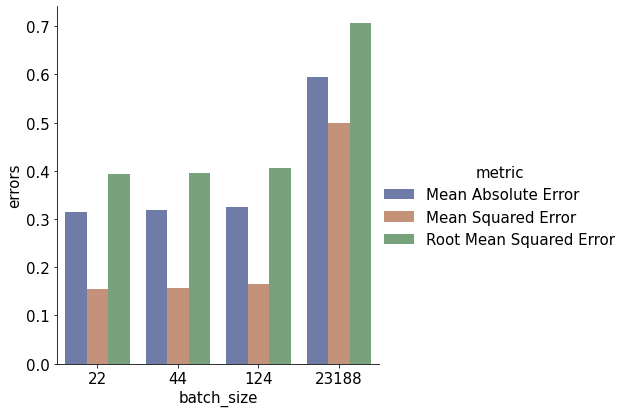

In [ ]:
g = sns.catplot(
    data=batch_effect, kind="bar",
    x="batch_size", y="errors", hue="metric", palette="dark", alpha=.6, height=6, estimator = np.mean, ci=95
)

It can be seen that the batch size of 44 has the least errors while having a batch size equal to the length of the dataset has a very high error in all three categories.

For our further comparisons, we choose the best performing batch size i.e. 44.

##Effects of different optimizers

In this section, we will compare the performance of our model with three different optimizers namely, Adam, SGD and RMSprop.

###Adam optimizer

In all the above computations, Adam optimizer has been used.

###SGD optimizer

In [ ]:
net_44_sgd = Network(X_train.shape[1], 8, 4, 1, 0.1, "SGD")
train_losses_44_sgd, val_losses_44_sgd = net_44_sgd.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 44)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([44])) that is different to the input size (torch.Size([44, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([7730])) that is different to the input size (torch.Size([7730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:00<01:40,  2.48it/s]

Training Loss: 1.1413218778128642 Validation Loss: 0.15469111502170563


  1%|          | 2/250 [00:01<02:11,  1.89it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  1%|          | 3/250 [00:01<01:51,  2.22it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  2%|▏         | 4/250 [00:01<01:41,  2.42it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  2%|▏         | 5/250 [00:02<01:34,  2.58it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  2%|▏         | 6/250 [00:02<01:32,  2.64it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  3%|▎         | 7/250 [00:02<01:29,  2.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  3%|▎         | 8/250 [00:03<01:27,  2.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  4%|▎         | 9/250 [00:03<01:25,  2.83it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  4%|▍         | 10/250 [00:03<01:23,  2.87it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  4%|▍         | 11/250 [00:04<01:27,  2.74it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  5%|▍         | 12/250 [00:04<01:45,  2.26it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  5%|▌         | 13/250 [00:05<02:11,  1.81it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  6%|▌         | 14/250 [00:06<02:18,  1.71it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  6%|▌         | 15/250 [00:06<02:16,  1.72it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  6%|▋         | 16/250 [00:07<02:18,  1.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  7%|▋         | 17/250 [00:08<02:23,  1.63it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  7%|▋         | 18/250 [00:08<02:28,  1.56it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  8%|▊         | 19/250 [00:10<03:41,  1.04it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  8%|▊         | 20/250 [00:10<03:01,  1.27it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  8%|▊         | 21/250 [00:11<02:31,  1.51it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  9%|▉         | 22/250 [00:11<02:13,  1.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


  9%|▉         | 23/250 [00:12<01:59,  1.91it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 10%|▉         | 24/250 [00:12<01:48,  2.09it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 10%|█         | 25/250 [00:12<01:41,  2.21it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 10%|█         | 26/250 [00:13<01:35,  2.33it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 11%|█         | 27/250 [00:13<01:31,  2.42it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 11%|█         | 28/250 [00:14<01:30,  2.46it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 12%|█▏        | 29/250 [00:14<01:28,  2.49it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 12%|█▏        | 30/250 [00:15<01:45,  2.09it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 12%|█▏        | 31/250 [00:15<02:01,  1.80it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 13%|█▎        | 32/250 [00:16<01:53,  1.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 13%|█▎        | 33/250 [00:16<01:48,  2.01it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 14%|█▎        | 34/250 [00:17<01:45,  2.04it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 14%|█▍        | 35/250 [00:17<01:39,  2.15it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 14%|█▍        | 36/250 [00:17<01:31,  2.35it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 15%|█▍        | 37/250 [00:18<01:25,  2.49it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 15%|█▌        | 38/250 [00:18<01:21,  2.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 16%|█▌        | 39/250 [00:18<01:18,  2.69it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 16%|█▌        | 40/250 [00:19<01:15,  2.79it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 16%|█▋        | 41/250 [00:19<01:12,  2.90it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 17%|█▋        | 42/250 [00:19<01:10,  2.94it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 17%|█▋        | 43/250 [00:20<01:10,  2.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 18%|█▊        | 44/250 [00:20<01:09,  2.98it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 18%|█▊        | 45/250 [00:20<01:09,  2.96it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 18%|█▊        | 46/250 [00:21<01:08,  2.98it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 19%|█▉        | 47/250 [00:21<01:07,  3.01it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 19%|█▉        | 48/250 [00:21<01:08,  2.96it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 20%|█▉        | 49/250 [00:22<01:11,  2.82it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 20%|██        | 50/250 [00:22<01:11,  2.81it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 20%|██        | 51/250 [00:22<01:10,  2.83it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 21%|██        | 52/250 [00:23<01:08,  2.87it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 21%|██        | 53/250 [00:23<01:07,  2.91it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 22%|██▏       | 54/250 [00:24<01:07,  2.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 22%|██▏       | 55/250 [00:24<01:06,  2.91it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 22%|██▏       | 56/250 [00:24<01:06,  2.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 23%|██▎       | 57/250 [00:25<01:05,  2.94it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 23%|██▎       | 58/250 [00:25<01:04,  2.97it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 24%|██▎       | 59/250 [00:25<01:04,  2.95it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 24%|██▍       | 60/250 [00:26<01:04,  2.96it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 24%|██▍       | 61/250 [00:26<01:03,  2.97it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 25%|██▍       | 62/250 [00:26<01:03,  2.95it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 25%|██▌       | 63/250 [00:27<01:02,  2.97it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 26%|██▌       | 64/250 [00:27<01:03,  2.94it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 26%|██▌       | 65/250 [00:27<01:02,  2.94it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 26%|██▋       | 66/250 [00:28<01:01,  2.97it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 27%|██▋       | 67/250 [00:28<01:02,  2.94it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 27%|██▋       | 68/250 [00:28<01:03,  2.86it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 28%|██▊       | 69/250 [00:29<01:03,  2.87it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 28%|██▊       | 70/250 [00:29<01:03,  2.85it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 28%|██▊       | 71/250 [00:29<01:08,  2.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 29%|██▉       | 72/250 [00:30<01:12,  2.46it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 29%|██▉       | 73/250 [00:30<01:13,  2.41it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 30%|██▉       | 74/250 [00:31<01:12,  2.42it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 30%|███       | 75/250 [00:31<01:13,  2.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 30%|███       | 76/250 [00:32<01:08,  2.53it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 31%|███       | 77/250 [00:32<01:07,  2.55it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 31%|███       | 78/250 [00:32<01:05,  2.63it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 32%|███▏      | 79/250 [00:33<01:04,  2.65it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 32%|███▏      | 80/250 [00:33<01:29,  1.91it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 32%|███▏      | 81/250 [00:34<01:50,  1.53it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 33%|███▎      | 82/250 [00:36<02:27,  1.14it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 33%|███▎      | 83/250 [00:37<02:41,  1.03it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 34%|███▎      | 84/250 [00:38<02:35,  1.07it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 34%|███▍      | 85/250 [00:38<02:08,  1.28it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 34%|███▍      | 86/250 [00:39<02:03,  1.32it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 35%|███▍      | 87/250 [00:40<01:59,  1.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 35%|███▌      | 88/250 [00:40<01:40,  1.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 36%|███▌      | 89/250 [00:41<01:36,  1.66it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 36%|███▌      | 90/250 [00:41<01:34,  1.69it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 36%|███▋      | 91/250 [00:42<01:40,  1.58it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 37%|███▋      | 92/250 [00:43<01:47,  1.47it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 37%|███▋      | 93/250 [00:43<01:36,  1.62it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 38%|███▊      | 94/250 [00:44<01:23,  1.86it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 38%|███▊      | 95/250 [00:44<01:15,  2.06it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 38%|███▊      | 96/250 [00:44<01:13,  2.09it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 39%|███▉      | 97/250 [00:45<01:07,  2.27it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 39%|███▉      | 98/250 [00:45<01:12,  2.10it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 40%|███▉      | 99/250 [00:46<01:19,  1.89it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 40%|████      | 100/250 [00:47<01:25,  1.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 40%|████      | 101/250 [00:47<01:16,  1.95it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 41%|████      | 102/250 [00:47<01:07,  2.18it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 41%|████      | 103/250 [00:48<01:01,  2.40it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 42%|████▏     | 104/250 [00:48<00:56,  2.57it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 42%|████▏     | 105/250 [00:48<00:53,  2.69it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 42%|████▏     | 106/250 [00:49<01:00,  2.40it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 43%|████▎     | 107/250 [00:49<01:11,  2.01it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 43%|████▎     | 108/250 [00:50<01:18,  1.80it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 44%|████▎     | 109/250 [00:51<01:11,  1.96it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 44%|████▍     | 110/250 [00:51<01:03,  2.21it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 44%|████▍     | 111/250 [00:51<00:57,  2.40it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 45%|████▍     | 112/250 [00:52<00:54,  2.53it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 45%|████▌     | 113/250 [00:52<00:52,  2.63it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 46%|████▌     | 114/250 [00:52<00:50,  2.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 46%|████▌     | 115/250 [00:53<00:53,  2.53it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 46%|████▋     | 116/250 [00:53<01:03,  2.10it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 47%|████▋     | 117/250 [00:54<01:11,  1.86it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 47%|████▋     | 118/250 [00:54<01:06,  1.99it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 48%|████▊     | 119/250 [00:55<00:59,  2.21it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 48%|████▊     | 120/250 [00:55<00:54,  2.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 48%|████▊     | 121/250 [00:56<00:52,  2.48it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 49%|████▉     | 122/250 [00:56<00:49,  2.58it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 49%|████▉     | 123/250 [00:56<00:52,  2.40it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 50%|████▉     | 124/250 [00:57<00:51,  2.47it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 50%|█████     | 125/250 [00:57<01:00,  2.07it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 50%|█████     | 126/250 [00:58<01:14,  1.65it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 51%|█████     | 127/250 [00:59<01:15,  1.62it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 51%|█████     | 128/250 [01:00<01:14,  1.64it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 52%|█████▏    | 129/250 [01:00<01:11,  1.68it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 52%|█████▏    | 130/250 [01:00<01:02,  1.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 52%|█████▏    | 131/250 [01:01<00:56,  2.11it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 53%|█████▎    | 132/250 [01:01<00:58,  2.02it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 53%|█████▎    | 133/250 [01:02<01:01,  1.89it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 54%|█████▎    | 134/250 [01:03<01:03,  1.82it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 54%|█████▍    | 135/250 [01:04<01:19,  1.44it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 54%|█████▍    | 136/250 [01:04<01:22,  1.38it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 55%|█████▍    | 137/250 [01:05<01:12,  1.57it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 55%|█████▌    | 138/250 [01:05<01:01,  1.82it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 56%|█████▌    | 139/250 [01:06<00:58,  1.89it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 56%|█████▌    | 140/250 [01:06<01:02,  1.75it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 56%|█████▋    | 141/250 [01:07<01:09,  1.57it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 57%|█████▋    | 142/250 [01:08<01:02,  1.72it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 57%|█████▋    | 143/250 [01:08<00:57,  1.86it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 58%|█████▊    | 144/250 [01:08<00:55,  1.90it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 58%|█████▊    | 145/250 [01:09<00:54,  1.92it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 58%|█████▊    | 146/250 [01:10<01:08,  1.52it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 59%|█████▉    | 147/250 [01:11<01:17,  1.33it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 59%|█████▉    | 148/250 [01:12<01:12,  1.41it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 60%|█████▉    | 149/250 [01:12<01:12,  1.39it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 60%|██████    | 150/250 [01:13<01:08,  1.47it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 60%|██████    | 151/250 [01:14<01:08,  1.45it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 61%|██████    | 152/250 [01:14<00:57,  1.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 61%|██████    | 153/250 [01:14<00:55,  1.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 62%|██████▏   | 154/250 [01:15<00:58,  1.65it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 62%|██████▏   | 155/250 [01:16<00:55,  1.70it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 62%|██████▏   | 156/250 [01:16<00:48,  1.93it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 63%|██████▎   | 157/250 [01:16<00:44,  2.11it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 63%|██████▎   | 158/250 [01:17<00:41,  2.22it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 64%|██████▎   | 159/250 [01:17<00:38,  2.36it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 64%|██████▍   | 160/250 [01:18<00:35,  2.50it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 64%|██████▍   | 161/250 [01:18<00:36,  2.45it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 65%|██████▍   | 162/250 [01:19<00:40,  2.18it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 65%|██████▌   | 163/250 [01:19<00:42,  2.04it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 66%|██████▌   | 164/250 [01:20<00:44,  1.91it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 66%|██████▌   | 165/250 [01:20<00:44,  1.93it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 66%|██████▋   | 166/250 [01:21<00:44,  1.88it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 67%|██████▋   | 167/250 [01:21<00:45,  1.82it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 67%|██████▋   | 168/250 [01:22<00:54,  1.49it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 68%|██████▊   | 169/250 [01:23<00:49,  1.65it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 68%|██████▊   | 170/250 [01:23<00:42,  1.88it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 68%|██████▊   | 171/250 [01:23<00:37,  2.09it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 69%|██████▉   | 172/250 [01:24<00:34,  2.27it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 69%|██████▉   | 173/250 [01:24<00:31,  2.41it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 70%|██████▉   | 174/250 [01:25<00:29,  2.55it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 70%|███████   | 175/250 [01:25<00:28,  2.65it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 70%|███████   | 176/250 [01:25<00:27,  2.71it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 71%|███████   | 177/250 [01:26<00:26,  2.73it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 71%|███████   | 178/250 [01:26<00:25,  2.77it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 72%|███████▏  | 179/250 [01:26<00:25,  2.81it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 72%|███████▏  | 180/250 [01:27<00:24,  2.83it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 72%|███████▏  | 181/250 [01:27<00:24,  2.83it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 73%|███████▎  | 182/250 [01:28<00:32,  2.10it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 73%|███████▎  | 183/250 [01:28<00:30,  2.21it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 74%|███████▎  | 184/250 [01:28<00:27,  2.36it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 74%|███████▍  | 185/250 [01:29<00:26,  2.49it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 74%|███████▍  | 186/250 [01:29<00:24,  2.60it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 75%|███████▍  | 187/250 [01:30<00:23,  2.64it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 75%|███████▌  | 188/250 [01:30<00:23,  2.67it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 76%|███████▌  | 189/250 [01:30<00:22,  2.68it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 76%|███████▌  | 190/250 [01:31<00:22,  2.72it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 76%|███████▋  | 191/250 [01:31<00:21,  2.75it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 77%|███████▋  | 192/250 [01:31<00:21,  2.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 77%|███████▋  | 193/250 [01:32<00:20,  2.72it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 78%|███████▊  | 194/250 [01:32<00:20,  2.73it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 78%|███████▊  | 195/250 [01:32<00:20,  2.74it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 78%|███████▊  | 196/250 [01:33<00:19,  2.78it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 79%|███████▉  | 197/250 [01:33<00:19,  2.79it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 79%|███████▉  | 198/250 [01:34<00:21,  2.47it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 80%|███████▉  | 199/250 [01:34<00:23,  2.16it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 80%|████████  | 200/250 [01:35<00:26,  1.87it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 80%|████████  | 201/250 [01:36<00:30,  1.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 81%|████████  | 202/250 [01:37<00:31,  1.53it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 81%|████████  | 203/250 [01:37<00:32,  1.44it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 82%|████████▏ | 204/250 [01:38<00:32,  1.43it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 82%|████████▏ | 205/250 [01:39<00:32,  1.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 82%|████████▏ | 206/250 [01:40<00:33,  1.33it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 83%|████████▎ | 207/250 [01:40<00:27,  1.57it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 83%|████████▎ | 208/250 [01:41<00:25,  1.64it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 84%|████████▎ | 209/250 [01:41<00:25,  1.58it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 84%|████████▍ | 210/250 [01:42<00:25,  1.54it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 84%|████████▍ | 211/250 [01:42<00:22,  1.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 85%|████████▍ | 212/250 [01:43<00:19,  1.99it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 85%|████████▌ | 213/250 [01:43<00:17,  2.17it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 86%|████████▌ | 214/250 [01:43<00:15,  2.31it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 86%|████████▌ | 215/250 [01:44<00:14,  2.42it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 86%|████████▋ | 216/250 [01:44<00:13,  2.54it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 87%|████████▋ | 217/250 [01:44<00:12,  2.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 87%|████████▋ | 218/250 [01:45<00:12,  2.63it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 88%|████████▊ | 219/250 [01:45<00:11,  2.69it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 88%|████████▊ | 220/250 [01:46<00:10,  2.74it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 88%|████████▊ | 221/250 [01:46<00:10,  2.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 89%|████████▉ | 222/250 [01:46<00:09,  2.80it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 89%|████████▉ | 223/250 [01:47<00:10,  2.67it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 90%|████████▉ | 224/250 [01:47<00:10,  2.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 90%|█████████ | 225/250 [01:48<00:12,  2.06it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 90%|█████████ | 226/250 [01:48<00:12,  1.96it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 91%|█████████ | 227/250 [01:49<00:14,  1.55it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 91%|█████████ | 228/250 [01:50<00:12,  1.74it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 92%|█████████▏| 229/250 [01:50<00:10,  1.98it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 92%|█████████▏| 230/250 [01:50<00:09,  2.19it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 92%|█████████▏| 231/250 [01:51<00:08,  2.36it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 93%|█████████▎| 232/250 [01:51<00:07,  2.51it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 93%|█████████▎| 233/250 [01:51<00:06,  2.59it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 94%|█████████▎| 234/250 [01:52<00:06,  2.46it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 94%|█████████▍| 235/250 [01:53<00:08,  1.78it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 94%|█████████▍| 236/250 [01:54<00:11,  1.27it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 95%|█████████▍| 237/250 [01:55<00:10,  1.25it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 95%|█████████▌| 238/250 [01:55<00:07,  1.51it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 96%|█████████▌| 239/250 [01:56<00:06,  1.77it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 96%|█████████▌| 240/250 [01:56<00:05,  2.00it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 96%|█████████▋| 241/250 [01:56<00:04,  2.20it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 97%|█████████▋| 242/250 [01:57<00:03,  2.37it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 97%|█████████▋| 243/250 [01:57<00:02,  2.50it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 98%|█████████▊| 244/250 [01:57<00:02,  2.61it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 98%|█████████▊| 245/250 [01:58<00:01,  2.68it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 98%|█████████▊| 246/250 [01:58<00:01,  2.74it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 99%|█████████▉| 247/250 [01:58<00:01,  2.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


 99%|█████████▉| 248/250 [01:59<00:00,  2.77it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


100%|█████████▉| 249/250 [01:59<00:00,  2.76it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


100%|██████████| 250/250 [02:00<00:00,  2.08it/s]

Training Loss: 0.1512194270483683 Validation Loss: 0.15469111502170563


In [ ]:
# Get mean absolute error on the validation data
predictions_44_sgd = net_44_sgd.predict(torch.tensor(X_test.values).float())
mae_44_sgd = torch.mean(torch.abs(predictions_44_sgd - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_44_sgd}")

# Get mean squared error on the validation data
mse_44_sgd = torch.mean((predictions_44_sgd - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_44_sgd}")

# get root mean squared error on the validation data
rmse_44_sgd = torch.sqrt(mse_44_sgd)
print(f"Root Mean Squared Error: {rmse_44_sgd}")




Mean Absolute Error: 0.3141831159591675
Mean Squared Error: 0.15070365369319916
Root Mean Squared Error: 0.3882056772708893


In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_44_sgd.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_44_SGD_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_44_sgd.save("M3_batch_44_SGD_model.pth")

###RMSprop optimizer

In [ ]:
net_44_rms = Network(X_train.shape[1], 8, 4, 1, 0.1, "RMSprop")
train_losses_44_rms, val_losses_44_rms = net_44_rms.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 44)

  0%|          | 1/250 [00:00<01:57,  2.13it/s]

Training Loss: 60.65765210629867 Validation Loss: 0.1567070335149765


  1%|          | 2/250 [00:00<02:00,  2.06it/s]

Training Loss: 0.15210259866951992 Validation Loss: 0.16001054644584656


  1%|          | 3/250 [00:01<01:55,  2.15it/s]

Training Loss: 0.15510443361932005 Validation Loss: 0.15926501154899597


  2%|▏         | 4/250 [00:01<01:52,  2.19it/s]

Training Loss: 0.15526223355158456 Validation Loss: 0.1592646837234497


  2%|▏         | 5/250 [00:02<01:52,  2.17it/s]

Training Loss: 0.1732909134403578 Validation Loss: 0.15944142639636993


  2%|▏         | 6/250 [00:02<01:51,  2.19it/s]

Training Loss: 0.1552329931047655 Validation Loss: 0.15926474332809448


  3%|▎         | 7/250 [00:03<01:49,  2.23it/s]

Training Loss: 0.15526227409857726 Validation Loss: 0.1592646837234497


  3%|▎         | 8/250 [00:03<01:46,  2.28it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  4%|▎         | 9/250 [00:04<01:45,  2.28it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  4%|▍         | 10/250 [00:04<01:44,  2.30it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  4%|▍         | 11/250 [00:04<01:42,  2.33it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  5%|▍         | 12/250 [00:05<01:42,  2.33it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  5%|▌         | 13/250 [00:05<01:42,  2.32it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  6%|▌         | 14/250 [00:06<01:40,  2.34it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  6%|▌         | 15/250 [00:06<01:40,  2.34it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  6%|▋         | 16/250 [00:07<01:39,  2.34it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  7%|▋         | 17/250 [00:07<01:39,  2.33it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  7%|▋         | 18/250 [00:07<01:39,  2.33it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  8%|▊         | 19/250 [00:08<01:39,  2.31it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  8%|▊         | 20/250 [00:08<01:40,  2.30it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  8%|▊         | 21/250 [00:09<01:41,  2.27it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  9%|▉         | 22/250 [00:09<01:41,  2.25it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


  9%|▉         | 23/250 [00:10<01:41,  2.25it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 10%|▉         | 24/250 [00:10<01:41,  2.23it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 10%|█         | 25/250 [00:11<01:39,  2.26it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 10%|█         | 26/250 [00:11<01:38,  2.27it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 11%|█         | 27/250 [00:11<01:37,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 11%|█         | 28/250 [00:12<01:38,  2.25it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 12%|█▏        | 29/250 [00:12<01:37,  2.27it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 12%|█▏        | 30/250 [00:13<01:46,  2.07it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 12%|█▏        | 31/250 [00:14<02:06,  1.73it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 13%|█▎        | 32/250 [00:14<02:13,  1.64it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 13%|█▎        | 33/250 [00:15<02:00,  1.81it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 14%|█▎        | 34/250 [00:15<01:51,  1.94it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 14%|█▍        | 35/250 [00:16<01:44,  2.05it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 14%|█▍        | 36/250 [00:16<01:40,  2.13it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 15%|█▍        | 37/250 [00:17<01:41,  2.10it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 15%|█▌        | 38/250 [00:17<01:49,  1.93it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 16%|█▌        | 39/250 [00:18<02:02,  1.73it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 16%|█▌        | 40/250 [00:19<02:33,  1.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 16%|█▋        | 41/250 [00:19<02:14,  1.56it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 17%|█▋        | 42/250 [00:20<01:59,  1.74it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 17%|█▋        | 43/250 [00:20<01:50,  1.87it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 18%|█▊        | 44/250 [00:21<01:42,  2.01it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 18%|█▊        | 45/250 [00:21<01:38,  2.08it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 18%|█▊        | 46/250 [00:22<01:35,  2.14it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 19%|█▉        | 47/250 [00:22<01:32,  2.19it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 19%|█▉        | 48/250 [00:22<01:29,  2.25it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 20%|█▉        | 49/250 [00:23<01:27,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 20%|██        | 50/250 [00:23<01:27,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 20%|██        | 51/250 [00:24<01:44,  1.91it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 21%|██        | 52/250 [00:25<01:58,  1.67it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 21%|██        | 53/250 [00:25<02:00,  1.64it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 22%|██▏       | 54/250 [00:26<01:57,  1.67it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 22%|██▏       | 55/250 [00:26<01:48,  1.80it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 22%|██▏       | 56/250 [00:27<01:44,  1.85it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 23%|██▎       | 57/250 [00:27<01:42,  1.88it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 23%|██▎       | 58/250 [00:28<01:37,  1.96it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 24%|██▎       | 59/250 [00:28<01:33,  2.05it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 24%|██▍       | 60/250 [00:29<01:42,  1.86it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 24%|██▍       | 61/250 [00:30<01:51,  1.70it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 25%|██▍       | 62/250 [00:30<01:59,  1.57it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 25%|██▌       | 63/250 [00:31<01:48,  1.72it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 26%|██▌       | 64/250 [00:31<01:38,  1.89it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 26%|██▌       | 65/250 [00:32<01:32,  2.01it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 26%|██▋       | 66/250 [00:32<01:27,  2.10it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 27%|██▋       | 67/250 [00:33<01:24,  2.17it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 27%|██▋       | 68/250 [00:33<01:20,  2.25it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 28%|██▊       | 69/250 [00:33<01:19,  2.28it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 28%|██▊       | 70/250 [00:34<01:18,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 28%|██▊       | 71/250 [00:34<01:16,  2.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 29%|██▉       | 72/250 [00:35<01:15,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 29%|██▉       | 73/250 [00:35<01:13,  2.39it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 30%|██▉       | 74/250 [00:35<01:14,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 30%|███       | 75/250 [00:36<01:14,  2.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 30%|███       | 76/250 [00:36<01:13,  2.36it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 31%|███       | 77/250 [00:37<01:12,  2.38it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 31%|███       | 78/250 [00:37<01:12,  2.38it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 32%|███▏      | 79/250 [00:38<01:12,  2.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 32%|███▏      | 80/250 [00:38<01:21,  2.09it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 32%|███▏      | 81/250 [00:39<01:34,  1.79it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 33%|███▎      | 82/250 [00:39<01:32,  1.81it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 33%|███▎      | 83/250 [00:40<01:28,  1.89it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 34%|███▎      | 84/250 [00:40<01:22,  2.00it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 34%|███▍      | 85/250 [00:42<01:53,  1.46it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 34%|███▍      | 86/250 [00:42<01:46,  1.54it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 35%|███▍      | 87/250 [00:43<01:36,  1.70it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 35%|███▌      | 88/250 [00:43<01:31,  1.77it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 36%|███▌      | 89/250 [00:44<01:33,  1.72it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 36%|███▌      | 90/250 [00:44<01:44,  1.53it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 36%|███▋      | 91/250 [00:45<01:35,  1.66it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 37%|███▋      | 92/250 [00:45<01:26,  1.83it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 37%|███▋      | 93/250 [00:46<01:20,  1.96it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 38%|███▊      | 94/250 [00:46<01:14,  2.09it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 38%|███▊      | 95/250 [00:47<01:11,  2.16it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 38%|███▊      | 96/250 [00:47<01:09,  2.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 39%|███▉      | 97/250 [00:48<01:08,  2.24it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 39%|███▉      | 98/250 [00:48<01:06,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 40%|███▉      | 99/250 [00:48<01:06,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 40%|████      | 100/250 [00:49<01:08,  2.19it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 40%|████      | 101/250 [00:49<01:07,  2.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 41%|████      | 102/250 [00:50<01:11,  2.08it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 41%|████      | 103/250 [00:50<01:14,  1.98it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 42%|████▏     | 104/250 [00:51<01:22,  1.76it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 42%|████▏     | 105/250 [00:52<01:24,  1.71it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 42%|████▏     | 106/250 [00:52<01:17,  1.87it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 43%|████▎     | 107/250 [00:53<01:11,  1.99it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 43%|████▎     | 108/250 [00:53<01:09,  2.05it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 44%|████▎     | 109/250 [00:54<01:13,  1.92it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 44%|████▍     | 110/250 [00:54<01:21,  1.73it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 44%|████▍     | 111/250 [00:55<01:18,  1.77it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 45%|████▍     | 112/250 [00:55<01:12,  1.89it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 45%|████▌     | 113/250 [00:56<01:14,  1.85it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 46%|████▌     | 114/250 [00:56<01:11,  1.91it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 46%|████▌     | 115/250 [00:57<01:14,  1.82it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 46%|████▋     | 116/250 [00:58<01:13,  1.82it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 47%|████▋     | 117/250 [00:58<01:10,  1.88it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 47%|████▋     | 118/250 [00:58<01:05,  2.00it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 48%|████▊     | 119/250 [00:59<01:02,  2.10it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 48%|████▊     | 120/250 [00:59<00:59,  2.17it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 48%|████▊     | 121/250 [01:00<01:06,  1.94it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 49%|████▉     | 122/250 [01:01<01:10,  1.83it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 49%|████▉     | 123/250 [01:01<01:08,  1.85it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 50%|████▉     | 124/250 [01:02<01:08,  1.85it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 50%|█████     | 125/250 [01:02<01:10,  1.78it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 50%|█████     | 126/250 [01:03<01:17,  1.61it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 51%|█████     | 127/250 [01:04<01:15,  1.63it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 51%|█████     | 128/250 [01:04<01:07,  1.79it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 52%|█████▏    | 129/250 [01:04<01:03,  1.92it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 52%|█████▏    | 130/250 [01:05<00:58,  2.04it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 52%|█████▏    | 131/250 [01:05<01:01,  1.95it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 53%|█████▎    | 132/250 [01:06<01:04,  1.83it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 53%|█████▎    | 133/250 [01:07<01:06,  1.77it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 54%|█████▎    | 134/250 [01:07<01:06,  1.74it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 54%|█████▍    | 135/250 [01:08<01:10,  1.62it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 54%|█████▍    | 136/250 [01:09<01:07,  1.70it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 55%|█████▍    | 137/250 [01:09<01:01,  1.85it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 55%|█████▌    | 138/250 [01:09<00:57,  1.96it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 56%|█████▌    | 139/250 [01:10<00:54,  2.04it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 56%|█████▌    | 140/250 [01:10<00:52,  2.08it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 56%|█████▋    | 141/250 [01:11<00:51,  2.11it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 57%|█████▋    | 142/250 [01:11<00:49,  2.18it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 57%|█████▋    | 143/250 [01:12<00:48,  2.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 58%|█████▊    | 144/250 [01:12<00:47,  2.24it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 58%|█████▊    | 145/250 [01:12<00:46,  2.26it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 58%|█████▊    | 146/250 [01:13<00:45,  2.30it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 59%|█████▉    | 147/250 [01:13<00:45,  2.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 59%|█████▉    | 148/250 [01:14<00:44,  2.31it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 60%|█████▉    | 149/250 [01:14<00:43,  2.31it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 60%|██████    | 150/250 [01:15<00:43,  2.32it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 60%|██████    | 151/250 [01:15<00:41,  2.36it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 61%|██████    | 152/250 [01:15<00:41,  2.36it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 61%|██████    | 153/250 [01:16<00:40,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 62%|██████▏   | 154/250 [01:16<00:40,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 62%|██████▏   | 155/250 [01:17<00:40,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 62%|██████▏   | 156/250 [01:17<00:39,  2.37it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 63%|██████▎   | 157/250 [01:18<00:39,  2.34it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 63%|██████▎   | 158/250 [01:18<00:39,  2.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 64%|██████▎   | 159/250 [01:18<00:39,  2.31it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 64%|██████▍   | 160/250 [01:19<00:38,  2.33it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 64%|██████▍   | 161/250 [01:19<00:40,  2.22it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 65%|██████▍   | 162/250 [01:20<00:47,  1.87it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 65%|██████▌   | 163/250 [01:21<00:57,  1.52it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 66%|██████▌   | 164/250 [01:21<00:50,  1.70it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 66%|██████▌   | 165/250 [01:22<00:45,  1.86it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 66%|██████▋   | 166/250 [01:22<00:42,  1.98it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 67%|██████▋   | 167/250 [01:23<00:40,  2.06it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 67%|██████▋   | 168/250 [01:23<00:38,  2.12it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 68%|██████▊   | 169/250 [01:24<00:38,  2.13it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 68%|██████▊   | 170/250 [01:24<00:36,  2.18it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 68%|██████▊   | 171/250 [01:25<00:35,  2.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 69%|██████▉   | 172/250 [01:25<00:34,  2.23it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 69%|██████▉   | 173/250 [01:25<00:33,  2.27it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 70%|██████▉   | 174/250 [01:26<00:32,  2.30it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 70%|███████   | 175/250 [01:26<00:31,  2.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 70%|███████   | 176/250 [01:27<00:31,  2.36it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 71%|███████   | 177/250 [01:27<00:31,  2.34it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 71%|███████   | 178/250 [01:28<00:34,  2.07it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 72%|███████▏  | 179/250 [01:28<00:35,  1.99it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 72%|███████▏  | 180/250 [01:29<00:36,  1.91it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 72%|███████▏  | 181/250 [01:29<00:38,  1.81it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 73%|███████▎  | 182/250 [01:30<00:35,  1.92it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 73%|███████▎  | 183/250 [01:30<00:33,  1.99it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 74%|███████▎  | 184/250 [01:31<00:35,  1.84it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 74%|███████▍  | 185/250 [01:32<00:47,  1.36it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 74%|███████▍  | 186/250 [01:33<00:53,  1.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 75%|███████▍  | 187/250 [01:34<00:52,  1.21it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 75%|███████▌  | 188/250 [01:35<00:48,  1.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 76%|███████▌  | 189/250 [01:35<00:40,  1.49it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 76%|███████▌  | 190/250 [01:36<00:35,  1.67it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 76%|███████▋  | 191/250 [01:36<00:32,  1.80it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 77%|███████▋  | 192/250 [01:37<00:31,  1.82it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 77%|███████▋  | 193/250 [01:37<00:29,  1.94it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 78%|███████▊  | 194/250 [01:38<00:30,  1.86it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 78%|███████▊  | 195/250 [01:38<00:32,  1.69it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 78%|███████▊  | 196/250 [01:39<00:29,  1.82it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 79%|███████▉  | 197/250 [01:39<00:27,  1.92it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 79%|███████▉  | 198/250 [01:40<00:29,  1.74it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 80%|███████▉  | 199/250 [01:41<00:31,  1.63it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 80%|████████  | 200/250 [01:41<00:27,  1.80it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 80%|████████  | 201/250 [01:41<00:26,  1.87it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 81%|████████  | 202/250 [01:42<00:25,  1.89it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 81%|████████  | 203/250 [01:43<00:27,  1.72it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 82%|████████▏ | 204/250 [01:43<00:27,  1.69it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 82%|████████▏ | 205/250 [01:44<00:25,  1.77it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 82%|████████▏ | 206/250 [01:44<00:24,  1.82it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 83%|████████▎ | 207/250 [01:45<00:22,  1.95it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 83%|████████▎ | 208/250 [01:45<00:24,  1.75it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 84%|████████▎ | 209/250 [01:46<00:25,  1.63it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 84%|████████▍ | 210/250 [01:47<00:22,  1.76it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 84%|████████▍ | 211/250 [01:47<00:21,  1.84it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 85%|████████▍ | 212/250 [01:48<00:20,  1.83it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 85%|████████▌ | 213/250 [01:48<00:19,  1.92it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 86%|████████▌ | 214/250 [01:49<00:22,  1.57it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 86%|████████▌ | 215/250 [01:50<00:27,  1.29it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 86%|████████▋ | 216/250 [01:51<00:23,  1.42it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 87%|████████▋ | 217/250 [01:51<00:20,  1.62it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 87%|████████▋ | 218/250 [01:52<00:18,  1.71it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 88%|████████▊ | 219/250 [01:52<00:19,  1.62it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 88%|████████▊ | 220/250 [01:53<00:18,  1.60it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 88%|████████▊ | 221/250 [01:53<00:16,  1.74it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 89%|████████▉ | 222/250 [01:54<00:14,  1.88it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 89%|████████▉ | 223/250 [01:54<00:13,  1.96it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 90%|████████▉ | 224/250 [01:55<00:12,  2.02it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 90%|█████████ | 225/250 [01:55<00:12,  2.05it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 90%|█████████ | 226/250 [01:56<00:17,  1.41it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 91%|█████████ | 227/250 [01:57<00:16,  1.40it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 91%|█████████ | 228/250 [01:58<00:13,  1.59it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 92%|█████████▏| 229/250 [01:58<00:11,  1.77it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 92%|█████████▏| 230/250 [01:58<00:10,  1.90it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 92%|█████████▏| 231/250 [01:59<00:09,  2.01it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 93%|█████████▎| 232/250 [01:59<00:08,  2.01it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 93%|█████████▎| 233/250 [02:01<00:11,  1.47it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 94%|█████████▎| 234/250 [02:02<00:13,  1.15it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 94%|█████████▍| 235/250 [02:02<00:11,  1.27it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 94%|█████████▍| 236/250 [02:03<00:11,  1.20it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 95%|█████████▍| 237/250 [02:04<00:09,  1.40it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 95%|█████████▌| 238/250 [02:04<00:07,  1.61it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 96%|█████████▌| 239/250 [02:05<00:06,  1.78it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 96%|█████████▌| 240/250 [02:05<00:05,  1.93it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 96%|█████████▋| 241/250 [02:05<00:04,  2.02it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 97%|█████████▋| 242/250 [02:06<00:03,  2.08it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 97%|█████████▋| 243/250 [02:06<00:03,  2.09it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 98%|█████████▊| 244/250 [02:07<00:03,  1.68it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 98%|█████████▊| 245/250 [02:08<00:03,  1.35it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 98%|█████████▊| 246/250 [02:09<00:03,  1.21it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 99%|█████████▉| 247/250 [02:10<00:02,  1.38it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


 99%|█████████▉| 248/250 [02:10<00:01,  1.51it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


100%|█████████▉| 249/250 [02:11<00:00,  1.64it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


100%|██████████| 250/250 [02:11<00:00,  1.90it/s]

Training Loss: 0.155262280927098 Validation Loss: 0.1592646837234497


In [ ]:
# Get mean absolute error on the validation data
predictions_44_rms = net_44_rms.predict(torch.tensor(X_test.values).float())
mae_44_rms = torch.mean(torch.abs(predictions_44_rms - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_44_rms}")

# Get mean squared error on the validation data
mse_44_rms = torch.mean((predictions_44_rms - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_44_rms}")

# get root mean squared error on the validation data
rmse_44_rms = torch.sqrt(mse_44_rms)
print(f"Root Mean Squared Error: {rmse_44_rms}")




Mean Absolute Error: 0.32301488518714905
Mean Squared Error: 0.15542683005332947
Root Mean Squared Error: 0.3942421078681946


In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_44_rms.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_44_RMS_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_44_rms.save("M3_batch_44_RMS_model.pth")

###Analysis

In [ ]:
optimizers = ["Adam"]*3 + ["SGD"]*3 + ["RMSprop"]*3
errors = [mae_44.item(), mse_44.item(), rmse_44.item(), mae_44_sgd.item(), mse_44_sgd.item(), rmse_44_sgd.item(), mae_44_rms.item(), mse_44_rms.item(), rmse_44_rms.item()]
metric = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"]*3
optim_effect = pd.DataFrame({'optimizer': optimizers, 'errors': errors, 'metric': metric})
optim_effect

,optimizer,errors,metric
0,Adam,0.317960,Mean Absolute Error
1,Adam,0.156960,Mean Squared Error
2,Adam,0.396182,Root Mean Squared Error
3,SGD,0.314183,Mean Absolute Error
4,SGD,0.150704,Mean Squared Error
5,SGD,0.388206,Root Mean Squared Error
6,RMSprop,0.323015,Mean Absolute Error
7,RMSprop,0.155427,Mean Squared Error
8,RMSprop,0.394242,Root Mean Squared Error


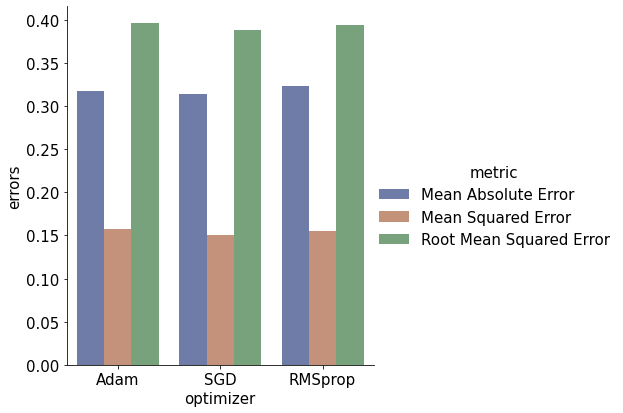

In [ ]:
g = sns.catplot(
    data=optim_effect, kind="bar",
    x="optimizer", y="errors", hue="metric", palette="dark", alpha=.6, height=6, estimator = np.mean, ci=95
)

All three optimizers produce almost the same errors with the Adam optimizer being the best and RMSprop being the worst.

##Hyperparameter Tuning

In the above sections, we have already tuned parameters like the dropout, batch size, optimizer and weight decay. In this section, we tune the learning rate of the Adam optimizer to see the impact of an increasing/decreasing learning rate on the three errors.

### Learning rate = 0.00001

The above section deals with all the computations related to the learning rate 0.00001.

###Learning rate = 0.001

In [ ]:
net_44_1em3 = Network(X_train.shape[1], 8, 4, 1, 0.001, "Adam")
train_losses_44_1em3, val_losses_44_1em3 = net_44_1em3.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 44)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([44])) that is different to the input size (torch.Size([44, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([7730])) that is different to the input size (torch.Size([7730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:01<04:18,  1.04s/it]

Training Loss: 5.8716909641106625 Validation Loss: 1.6603279113769531


  1%|          | 2/250 [00:02<04:36,  1.12s/it]

Training Loss: 0.2854081708124964 Validation Loss: 0.20678089559078217


  1%|          | 3/250 [00:02<03:26,  1.20it/s]

Training Loss: 0.18308074817598657 Validation Loss: 0.17310670018196106


  2%|▏         | 4/250 [00:03<02:50,  1.44it/s]

Training Loss: 0.1652540911052666 Validation Loss: 0.166837677359581


  2%|▏         | 5/250 [00:03<02:35,  1.58it/s]

Training Loss: 0.16221606143285472 Validation Loss: 0.16596722602844238


  2%|▏         | 6/250 [00:04<02:22,  1.72it/s]

Training Loss: 0.16141115104959858 Validation Loss: 0.1655949354171753


  3%|▎         | 7/250 [00:04<02:15,  1.80it/s]

Training Loss: 0.16076117751155 Validation Loss: 0.16501453518867493


  3%|▎         | 8/250 [00:05<02:09,  1.87it/s]

Training Loss: 0.16009363014625644 Validation Loss: 0.16423438489437103


  4%|▎         | 9/250 [00:05<02:06,  1.91it/s]

Training Loss: 0.15940000690816702 Validation Loss: 0.16336186230182648


  4%|▍         | 10/250 [00:06<02:03,  1.95it/s]

Training Loss: 0.15869226196402617 Validation Loss: 0.16248933970928192


  4%|▍         | 11/250 [00:06<02:02,  1.95it/s]

Training Loss: 0.15799067897520663 Validation Loss: 0.1616535484790802


  5%|▍         | 12/250 [00:07<02:01,  1.96it/s]

Training Loss: 0.15731223822488277 Validation Loss: 0.16088120639324188


  5%|▌         | 13/250 [00:07<02:02,  1.93it/s]

Training Loss: 0.15667397961501153 Validation Loss: 0.16016742587089539


  6%|▌         | 14/250 [00:08<02:00,  1.95it/s]

Training Loss: 0.1560602251164601 Validation Loss: 0.15942995250225067


  6%|▌         | 15/250 [00:08<02:01,  1.93it/s]

Training Loss: 0.15544736417862223 Validation Loss: 0.1588369607925415


  6%|▋         | 16/250 [00:09<02:01,  1.93it/s]

Training Loss: 0.15497530326671347 Validation Loss: 0.15836291015148163


  7%|▋         | 17/250 [00:09<02:01,  1.91it/s]

Training Loss: 0.15459829868582667 Validation Loss: 0.15795601904392242


  7%|▋         | 18/250 [00:10<01:59,  1.93it/s]

Training Loss: 0.15427495468499763 Validation Loss: 0.15758740901947021


  8%|▊         | 19/250 [00:10<01:59,  1.94it/s]

Training Loss: 0.15399774513163195 Validation Loss: 0.1572829782962799


  8%|▊         | 20/250 [00:11<01:57,  1.95it/s]

Training Loss: 0.15375719596923415 Validation Loss: 0.15702345967292786


  8%|▊         | 21/250 [00:11<01:58,  1.94it/s]

Training Loss: 0.15354623880230273 Validation Loss: 0.1567840725183487


  9%|▉         | 22/250 [00:12<01:57,  1.94it/s]

Training Loss: 0.15336332704864825 Validation Loss: 0.1565704047679901


  9%|▉         | 23/250 [00:12<01:57,  1.93it/s]

Training Loss: 0.15320528989951118 Validation Loss: 0.15641294419765472


 10%|▉         | 24/250 [00:13<01:55,  1.95it/s]

Training Loss: 0.15306756427720103 Validation Loss: 0.15625590085983276


 10%|█         | 25/250 [00:13<01:54,  1.97it/s]

Training Loss: 0.1529489583008882 Validation Loss: 0.15613114833831787


 10%|█         | 26/250 [00:14<01:53,  1.97it/s]

Training Loss: 0.15284745191600335 Validation Loss: 0.15599028766155243


 11%|█         | 27/250 [00:15<02:21,  1.58it/s]

Training Loss: 0.15276142187147937 Validation Loss: 0.1558828204870224


 11%|█         | 28/250 [00:16<02:39,  1.39it/s]

Training Loss: 0.152689590640154 Validation Loss: 0.15579105913639069


 12%|█▏        | 29/250 [00:16<02:29,  1.48it/s]

Training Loss: 0.15262404653955908 Validation Loss: 0.1557094305753708


 12%|█▏        | 30/250 [00:17<02:18,  1.59it/s]

Training Loss: 0.15256667644690292 Validation Loss: 0.15564240515232086


 12%|█▏        | 31/250 [00:17<02:16,  1.61it/s]

Training Loss: 0.15251758756854727 Validation Loss: 0.15558330714702606


 13%|█▎        | 32/250 [00:18<02:16,  1.59it/s]

Training Loss: 0.15247350238419122 Validation Loss: 0.15554773807525635


 13%|█▎        | 33/250 [00:19<02:08,  1.69it/s]

Training Loss: 0.15243552281632594 Validation Loss: 0.15550053119659424


 14%|█▎        | 34/250 [00:19<02:11,  1.65it/s]

Training Loss: 0.15240213103889289 Validation Loss: 0.15546223521232605


 14%|█▍        | 35/250 [00:20<02:26,  1.47it/s]

Training Loss: 0.15237125690736625 Validation Loss: 0.15541589260101318


 14%|█▍        | 36/250 [00:21<02:30,  1.42it/s]

Training Loss: 0.1523321635271838 Validation Loss: 0.15536172688007355


 15%|█▍        | 37/250 [00:21<02:16,  1.56it/s]

Training Loss: 0.15234307939119537 Validation Loss: 0.15534506738185883


 15%|█▌        | 38/250 [00:22<02:07,  1.67it/s]

Training Loss: 0.1523046108842801 Validation Loss: 0.15532471239566803


 16%|█▌        | 39/250 [00:22<02:01,  1.74it/s]

Training Loss: 0.15228516525064067 Validation Loss: 0.15530718863010406


 16%|█▌        | 40/250 [00:23<01:56,  1.81it/s]

Training Loss: 0.15226536474598878 Validation Loss: 0.1552918553352356


 16%|█▋        | 41/250 [00:23<01:52,  1.87it/s]

Training Loss: 0.15224607256320669 Validation Loss: 0.15527381002902985


 17%|█▋        | 42/250 [00:24<01:50,  1.88it/s]

Training Loss: 0.1522284164119943 Validation Loss: 0.15526187419891357


 17%|█▋        | 43/250 [00:24<01:48,  1.91it/s]

Training Loss: 0.15221356975172684 Validation Loss: 0.15525880455970764


 18%|█▊        | 44/250 [00:25<01:49,  1.89it/s]

Training Loss: 0.15219963457880709 Validation Loss: 0.1552428901195526


 18%|█▊        | 45/250 [00:26<02:12,  1.55it/s]

Training Loss: 0.1521864811230656 Validation Loss: 0.15523290634155273


 18%|█▊        | 46/250 [00:27<02:19,  1.47it/s]

Training Loss: 0.15217544886317153 Validation Loss: 0.15522071719169617


 19%|█▉        | 47/250 [00:27<02:17,  1.48it/s]

Training Loss: 0.15216245756712538 Validation Loss: 0.15521299839019775


 19%|█▉        | 48/250 [00:28<02:16,  1.48it/s]

Training Loss: 0.15215102447447787 Validation Loss: 0.15520617365837097


 20%|█▉        | 49/250 [00:29<02:14,  1.50it/s]

Training Loss: 0.15214155584686848 Validation Loss: 0.15519732236862183


 20%|██        | 50/250 [00:29<02:02,  1.63it/s]

Training Loss: 0.15213185107685356 Validation Loss: 0.15519043803215027


 20%|██        | 51/250 [00:30<01:55,  1.72it/s]

Training Loss: 0.1521225868524591 Validation Loss: 0.15518325567245483


 21%|██        | 52/250 [00:30<01:50,  1.79it/s]

Training Loss: 0.1521135774888169 Validation Loss: 0.15517862141132355


 21%|██        | 53/250 [00:31<01:48,  1.82it/s]

Training Loss: 0.15210492839679773 Validation Loss: 0.15517288446426392


 22%|██▏       | 54/250 [00:31<01:45,  1.86it/s]

Training Loss: 0.15209619568014054 Validation Loss: 0.15516908466815948


 22%|██▏       | 55/250 [00:32<01:45,  1.85it/s]

Training Loss: 0.15208780564777766 Validation Loss: 0.15516607463359833


 22%|██▏       | 56/250 [00:32<01:43,  1.87it/s]

Training Loss: 0.15207950862750155 Validation Loss: 0.15516263246536255


 23%|██▎       | 57/250 [00:33<01:46,  1.81it/s]

Training Loss: 0.15207279766194057 Validation Loss: 0.1551605761051178


 23%|██▎       | 58/250 [00:34<02:06,  1.52it/s]

Training Loss: 0.15206473775957297 Validation Loss: 0.1551579087972641


 24%|██▎       | 59/250 [00:34<02:04,  1.54it/s]

Training Loss: 0.15205756689384722 Validation Loss: 0.15515750646591187


 24%|██▍       | 60/250 [00:35<01:55,  1.65it/s]

Training Loss: 0.152051750860359 Validation Loss: 0.15515178442001343


 24%|██▍       | 61/250 [00:35<01:49,  1.72it/s]

Training Loss: 0.1520448196856075 Validation Loss: 0.1551467925310135


 25%|██▍       | 62/250 [00:36<01:47,  1.76it/s]

Training Loss: 0.1520394139288725 Validation Loss: 0.15514953434467316


 25%|██▌       | 63/250 [00:36<01:45,  1.78it/s]

Training Loss: 0.15203323893856957 Validation Loss: 0.15514828264713287


 26%|██▌       | 64/250 [00:37<02:02,  1.52it/s]

Training Loss: 0.15202546748818663 Validation Loss: 0.1551467776298523


 26%|██▌       | 65/250 [00:38<02:00,  1.53it/s]

Training Loss: 0.15201930601354793 Validation Loss: 0.15514862537384033


 26%|██▋       | 66/250 [00:39<02:00,  1.52it/s]

Training Loss: 0.15200868263077238 Validation Loss: 0.15511862933635712


 27%|██▋       | 67/250 [00:40<02:13,  1.37it/s]

Training Loss: 0.15201012197832456 Validation Loss: 0.15514425933361053


 27%|██▋       | 68/250 [00:40<02:01,  1.50it/s]

Training Loss: 0.15200040236369936 Validation Loss: 0.1551460474729538


 28%|██▊       | 69/250 [00:41<01:52,  1.61it/s]

Training Loss: 0.15199456130643949 Validation Loss: 0.15514634549617767


 28%|██▊       | 70/250 [00:41<01:46,  1.70it/s]

Training Loss: 0.1519867341392859 Validation Loss: 0.155142143368721


 28%|██▊       | 71/250 [00:42<01:41,  1.77it/s]

Training Loss: 0.15198211931752525 Validation Loss: 0.15513667464256287


 29%|██▉       | 72/250 [00:42<01:38,  1.81it/s]

Training Loss: 0.15197467997641897 Validation Loss: 0.15513011813163757


 29%|██▉       | 73/250 [00:43<01:36,  1.84it/s]

Training Loss: 0.15197043539337687 Validation Loss: 0.15513083338737488


 30%|██▉       | 74/250 [00:44<01:53,  1.56it/s]

Training Loss: 0.15196571812966744 Validation Loss: 0.15513822436332703


 30%|███       | 75/250 [00:44<01:51,  1.57it/s]

Training Loss: 0.151960795543791 Validation Loss: 0.1551392525434494


 30%|███       | 76/250 [00:45<01:43,  1.68it/s]

Training Loss: 0.1519549140950534 Validation Loss: 0.15514442324638367


 31%|███       | 77/250 [00:45<01:38,  1.76it/s]

Training Loss: 0.15195021887205584 Validation Loss: 0.15515504777431488


 31%|███       | 78/250 [00:46<01:51,  1.54it/s]

Training Loss: 0.15194453687832976 Validation Loss: 0.15515193343162537


 32%|███▏      | 79/250 [00:47<01:51,  1.54it/s]

Training Loss: 0.15193960725186673 Validation Loss: 0.15514817833900452


 32%|███▏      | 80/250 [00:47<01:42,  1.66it/s]

Training Loss: 0.15193393096978117 Validation Loss: 0.15514904260635376


 32%|███▏      | 81/250 [00:48<01:36,  1.76it/s]

Training Loss: 0.15192851456733988 Validation Loss: 0.15515200793743134


 33%|███▎      | 82/250 [00:49<01:53,  1.47it/s]

Training Loss: 0.15192337410499746 Validation Loss: 0.15514960885047913


 33%|███▎      | 83/250 [00:50<02:26,  1.14it/s]

Training Loss: 0.15191824926484016 Validation Loss: 0.1551506072282791


 34%|███▎      | 84/250 [00:51<02:23,  1.16it/s]

Training Loss: 0.1519128074144955 Validation Loss: 0.15515214204788208


 34%|███▍      | 85/250 [00:51<02:17,  1.20it/s]

Training Loss: 0.15190791174684576 Validation Loss: 0.1551576554775238


 34%|███▍      | 86/250 [00:52<01:59,  1.37it/s]

Training Loss: 0.1519021991308093 Validation Loss: 0.15516123175621033


 35%|███▍      | 87/250 [00:52<01:47,  1.51it/s]

Training Loss: 0.15189687041053285 Validation Loss: 0.15516208112239838


 35%|███▌      | 88/250 [00:53<01:39,  1.63it/s]

Training Loss: 0.15189176806349455 Validation Loss: 0.15516319870948792


 36%|███▌      | 89/250 [00:54<01:58,  1.36it/s]

Training Loss: 0.15188667879385107 Validation Loss: 0.15516498684883118


 36%|███▌      | 90/250 [00:55<02:01,  1.31it/s]

Training Loss: 0.15188104020293794 Validation Loss: 0.15516620874404907


 36%|███▋      | 91/250 [00:56<01:59,  1.34it/s]

Training Loss: 0.15187529728975874 Validation Loss: 0.15516462922096252


 37%|███▋      | 92/250 [00:56<02:03,  1.28it/s]

Training Loss: 0.1518698998460055 Validation Loss: 0.15516534447669983


 37%|███▋      | 93/250 [00:57<01:53,  1.39it/s]

Training Loss: 0.1518654388709584 Validation Loss: 0.15516971051692963


 38%|███▊      | 94/250 [00:58<02:03,  1.27it/s]

Training Loss: 0.15186015697482416 Validation Loss: 0.15517215430736542


 38%|███▊      | 95/250 [00:59<01:52,  1.38it/s]

Training Loss: 0.15185397648494656 Validation Loss: 0.15517255663871765


 38%|███▊      | 96/250 [00:59<01:41,  1.52it/s]

Training Loss: 0.15184834828526064 Validation Loss: 0.1551729142665863


 39%|███▉      | 97/250 [01:00<01:33,  1.64it/s]

Training Loss: 0.15184389879004553 Validation Loss: 0.15517237782478333


 39%|███▉      | 98/250 [01:00<01:27,  1.74it/s]

Training Loss: 0.15183744059285356 Validation Loss: 0.15517425537109375


 40%|███▉      | 99/250 [01:01<01:24,  1.79it/s]

Training Loss: 0.15183120664824118 Validation Loss: 0.1551760733127594


 40%|████      | 100/250 [01:01<01:21,  1.83it/s]

Training Loss: 0.15182590655685602 Validation Loss: 0.15517650544643402


 40%|████      | 101/250 [01:02<01:26,  1.72it/s]

Training Loss: 0.1518194362860477 Validation Loss: 0.15517283976078033


 41%|████      | 102/250 [01:02<01:27,  1.68it/s]

Training Loss: 0.15181175042544642 Validation Loss: 0.155166894197464


 41%|████      | 103/250 [01:03<01:28,  1.66it/s]

Training Loss: 0.15180545816272215 Validation Loss: 0.155157208442688


 42%|████▏     | 104/250 [01:03<01:24,  1.72it/s]

Training Loss: 0.15179948626082582 Validation Loss: 0.15516288578510284


 42%|████▏     | 105/250 [01:04<01:22,  1.77it/s]

Training Loss: 0.15179209675519698 Validation Loss: 0.15516243875026703


 42%|████▏     | 106/250 [01:05<01:19,  1.81it/s]

Training Loss: 0.15178893984382022 Validation Loss: 0.1551610827445984


 43%|████▎     | 107/250 [01:05<01:16,  1.88it/s]

Training Loss: 0.15178367211368549 Validation Loss: 0.1551673263311386


 43%|████▎     | 108/250 [01:06<01:13,  1.92it/s]

Training Loss: 0.15177885130528482 Validation Loss: 0.15516480803489685


 44%|████▎     | 109/250 [01:06<01:12,  1.95it/s]

Training Loss: 0.15177471244414345 Validation Loss: 0.1551624983549118


 44%|████▍     | 110/250 [01:07<01:11,  1.95it/s]

Training Loss: 0.1517698376579122 Validation Loss: 0.1551605463027954


 44%|████▍     | 111/250 [01:07<01:10,  1.96it/s]

Training Loss: 0.15176505056798345 Validation Loss: 0.15515871345996857


 45%|████▍     | 112/250 [01:08<01:09,  1.98it/s]

Training Loss: 0.1517588436971127 Validation Loss: 0.1551537960767746


 45%|████▌     | 113/250 [01:08<01:08,  1.99it/s]

Training Loss: 0.1517553204207538 Validation Loss: 0.1551513820886612


 46%|████▌     | 114/250 [01:09<01:08,  1.99it/s]

Training Loss: 0.151751159292697 Validation Loss: 0.1551496684551239


 46%|████▌     | 115/250 [01:09<01:07,  1.99it/s]

Training Loss: 0.1517451926783095 Validation Loss: 0.15514375269412994


 46%|████▋     | 116/250 [01:10<01:08,  1.96it/s]

Training Loss: 0.15174069929959877 Validation Loss: 0.155144602060318


 47%|████▋     | 117/250 [01:10<01:08,  1.95it/s]

Training Loss: 0.15173583230325347 Validation Loss: 0.1551406979560852


 47%|████▋     | 118/250 [01:11<01:17,  1.69it/s]

Training Loss: 0.15172937583086388 Validation Loss: 0.15513409674167633


 48%|████▊     | 119/250 [01:12<01:27,  1.50it/s]

Training Loss: 0.15172557968229225 Validation Loss: 0.1551334410905838


 48%|████▊     | 120/250 [01:12<01:20,  1.62it/s]

Training Loss: 0.15171969221088422 Validation Loss: 0.15512429177761078


 48%|████▊     | 121/250 [01:13<01:15,  1.70it/s]

Training Loss: 0.15171229147990242 Validation Loss: 0.1551196575164795


 49%|████▉     | 122/250 [01:13<01:11,  1.80it/s]

Training Loss: 0.15170313104054053 Validation Loss: 0.15512079000473022


 49%|████▉     | 123/250 [01:14<01:08,  1.84it/s]

Training Loss: 0.15171055901491665 Validation Loss: 0.15509554743766785


 50%|████▉     | 124/250 [01:14<01:14,  1.70it/s]

Training Loss: 0.15169632260950963 Validation Loss: 0.15513014793395996


 50%|█████     | 125/250 [01:15<01:30,  1.38it/s]

Training Loss: 0.15168865211661445 Validation Loss: 0.15513202548027039


 50%|█████     | 126/250 [01:16<01:26,  1.43it/s]

Training Loss: 0.15168183301160187 Validation Loss: 0.15511523187160492


 51%|█████     | 127/250 [01:17<01:25,  1.43it/s]

Training Loss: 0.1516777434345667 Validation Loss: 0.15510575473308563


 51%|█████     | 128/250 [01:18<01:28,  1.38it/s]

Training Loss: 0.15167392844040886 Validation Loss: 0.15510623157024384


 52%|█████▏    | 129/250 [01:19<01:52,  1.07it/s]

Training Loss: 0.15167205974431372 Validation Loss: 0.15509110689163208


 52%|█████▏    | 130/250 [01:20<01:59,  1.01it/s]

Training Loss: 0.1516670724924873 Validation Loss: 0.15509644150733948


 52%|█████▏    | 131/250 [01:21<01:55,  1.03it/s]

Training Loss: 0.1516622792102354 Validation Loss: 0.15509696304798126


 53%|█████▎    | 132/250 [01:22<01:44,  1.13it/s]

Training Loss: 0.15166027804366553 Validation Loss: 0.15510736405849457


 53%|█████▎    | 133/250 [01:22<01:30,  1.30it/s]

Training Loss: 0.15165849260462755 Validation Loss: 0.1551000475883484


 54%|█████▎    | 134/250 [01:23<01:19,  1.45it/s]

Training Loss: 0.15165439068535927 Validation Loss: 0.15509238839149475


 54%|█████▍    | 135/250 [01:23<01:13,  1.57it/s]

Training Loss: 0.15165024071196678 Validation Loss: 0.15507856011390686


 54%|█████▍    | 136/250 [01:24<01:09,  1.64it/s]

Training Loss: 0.15164613986716552 Validation Loss: 0.15507163107395172


 55%|█████▍    | 137/250 [01:24<01:05,  1.73it/s]

Training Loss: 0.15164246394579958 Validation Loss: 0.15506060421466827


 55%|█████▌    | 138/250 [01:25<01:03,  1.75it/s]

Training Loss: 0.15163864633616278 Validation Loss: 0.15505647659301758


 56%|█████▌    | 139/250 [01:26<01:15,  1.48it/s]

Training Loss: 0.15163493333154657 Validation Loss: 0.15504974126815796


 56%|█████▌    | 140/250 [01:27<01:17,  1.43it/s]

Training Loss: 0.15163135783043485 Validation Loss: 0.15504053235054016


 56%|█████▋    | 141/250 [01:28<01:37,  1.12it/s]

Training Loss: 0.1516284876321027 Validation Loss: 0.15503983199596405


 57%|█████▋    | 142/250 [01:29<01:35,  1.13it/s]

Training Loss: 0.15162419431632565 Validation Loss: 0.15502846240997314


 57%|█████▋    | 143/250 [01:29<01:24,  1.26it/s]

Training Loss: 0.15162058525225697 Validation Loss: 0.1550227552652359


 58%|█████▊    | 144/250 [01:30<01:15,  1.41it/s]

Training Loss: 0.15161716324441574 Validation Loss: 0.15501655638217926


 58%|█████▊    | 145/250 [01:30<01:08,  1.53it/s]

Training Loss: 0.15161394333534042 Validation Loss: 0.1550164371728897


 58%|█████▊    | 146/250 [01:31<01:04,  1.62it/s]

Training Loss: 0.15161070350621186 Validation Loss: 0.1550043821334839


 59%|█████▉    | 147/250 [01:31<01:00,  1.69it/s]

Training Loss: 0.15160709623763413 Validation Loss: 0.15499986708164215


 59%|█████▉    | 148/250 [01:32<00:57,  1.76it/s]

Training Loss: 0.1516044424737201 Validation Loss: 0.1549990326166153


 60%|█████▉    | 149/250 [01:32<00:56,  1.80it/s]

Training Loss: 0.15160107999983505 Validation Loss: 0.15498888492584229


 60%|██████    | 150/250 [01:33<00:53,  1.86it/s]

Training Loss: 0.15159835660762985 Validation Loss: 0.15498603880405426


 60%|██████    | 151/250 [01:33<00:52,  1.89it/s]

Training Loss: 0.15159430019769543 Validation Loss: 0.15497593581676483


 61%|██████    | 152/250 [01:34<00:51,  1.92it/s]

Training Loss: 0.1515929084094471 Validation Loss: 0.15497440099716187


 61%|██████    | 153/250 [01:34<00:50,  1.94it/s]

Training Loss: 0.15158819101849816 Validation Loss: 0.15496891736984253


 62%|██████▏   | 154/250 [01:35<00:49,  1.95it/s]

Training Loss: 0.1515857493063078 Validation Loss: 0.15496370196342468


 62%|██████▏   | 155/250 [01:35<00:48,  1.94it/s]

Training Loss: 0.15158270436570587 Validation Loss: 0.1549578458070755


 62%|██████▏   | 156/250 [01:36<00:48,  1.94it/s]

Training Loss: 0.1515795508049697 Validation Loss: 0.1549520492553711


 63%|██████▎   | 157/250 [01:37<00:48,  1.94it/s]

Training Loss: 0.151576596190287 Validation Loss: 0.15494605898857117


 63%|██████▎   | 158/250 [01:37<00:47,  1.95it/s]

Training Loss: 0.15157250862080865 Validation Loss: 0.1549418866634369


 64%|██████▎   | 159/250 [01:38<00:46,  1.94it/s]

Training Loss: 0.15156952807753996 Validation Loss: 0.15493591129779816


 64%|██████▍   | 160/250 [01:38<00:46,  1.94it/s]

Training Loss: 0.1515670299699682 Validation Loss: 0.15492935478687286


 64%|██████▍   | 161/250 [01:39<00:52,  1.71it/s]

Training Loss: 0.15156780242693718 Validation Loss: 0.1549210548400879


 65%|██████▍   | 162/250 [01:40<00:59,  1.47it/s]

Training Loss: 0.15156043757749915 Validation Loss: 0.15491455793380737


 65%|██████▌   | 163/250 [01:40<00:57,  1.50it/s]

Training Loss: 0.15155705109775858 Validation Loss: 0.15490758419036865


 66%|██████▌   | 164/250 [01:41<01:05,  1.31it/s]

Training Loss: 0.15155401770767724 Validation Loss: 0.15490028262138367


 66%|██████▌   | 165/250 [01:42<01:04,  1.31it/s]

Training Loss: 0.15155086748344396 Validation Loss: 0.1548924446105957


 66%|██████▋   | 166/250 [01:43<01:00,  1.39it/s]

Training Loss: 0.1515470188556405 Validation Loss: 0.15488335490226746


 67%|██████▋   | 167/250 [01:44<01:19,  1.05it/s]

Training Loss: 0.15154361002415814 Validation Loss: 0.15487419068813324


 67%|██████▋   | 168/250 [01:45<01:15,  1.08it/s]

Training Loss: 0.15153996828780908 Validation Loss: 0.1548638939857483


 68%|██████▊   | 169/250 [01:46<01:13,  1.11it/s]

Training Loss: 0.15153627805906636 Validation Loss: 0.15485315024852753


 68%|██████▊   | 170/250 [01:47<01:10,  1.13it/s]

Training Loss: 0.15153229045743508 Validation Loss: 0.15484514832496643


 68%|██████▊   | 171/250 [01:48<01:06,  1.18it/s]

Training Loss: 0.15154010149344546 Validation Loss: 0.1549087017774582


 69%|██████▉   | 172/250 [01:48<00:57,  1.36it/s]

Training Loss: 0.15152836538695746 Validation Loss: 0.1548260897397995


 69%|██████▉   | 173/250 [01:49<00:51,  1.49it/s]

Training Loss: 0.15152077085605384 Validation Loss: 0.15481778979301453


 70%|██████▉   | 174/250 [01:49<00:46,  1.63it/s]

Training Loss: 0.15151711662195666 Validation Loss: 0.1548072248697281


 70%|███████   | 175/250 [01:49<00:43,  1.72it/s]

Training Loss: 0.15151292820809237 Validation Loss: 0.15479831397533417


 70%|███████   | 176/250 [01:50<00:41,  1.80it/s]

Training Loss: 0.15150900613481225 Validation Loss: 0.15478867292404175


 71%|███████   | 177/250 [01:51<00:40,  1.81it/s]

Training Loss: 0.1515056358003526 Validation Loss: 0.15477892756462097


 71%|███████   | 178/250 [01:51<00:38,  1.85it/s]

Training Loss: 0.15150270896629772 Validation Loss: 0.15476997196674347


 72%|███████▏  | 179/250 [01:52<00:37,  1.87it/s]

Training Loss: 0.15149981898928955 Validation Loss: 0.1547619104385376


 72%|███████▏  | 180/250 [01:52<00:36,  1.91it/s]

Training Loss: 0.15149811918244643 Validation Loss: 0.15475516021251678


 72%|███████▏  | 181/250 [01:53<00:35,  1.93it/s]

Training Loss: 0.15149462907318825 Validation Loss: 0.1547493040561676


 73%|███████▎  | 182/250 [01:53<00:34,  1.96it/s]

Training Loss: 0.1514941545546168 Validation Loss: 0.15474623441696167


 73%|███████▎  | 183/250 [01:54<00:42,  1.59it/s]

Training Loss: 0.15149201708624893 Validation Loss: 0.15474002063274384


 74%|███████▎  | 184/250 [01:55<00:39,  1.66it/s]

Training Loss: 0.1514897449136459 Validation Loss: 0.15473398566246033


 74%|███████▍  | 185/250 [01:55<00:37,  1.74it/s]

Training Loss: 0.15148772427942991 Validation Loss: 0.15472786128520966


 74%|███████▍  | 186/250 [01:56<00:35,  1.79it/s]

Training Loss: 0.1514855694075237 Validation Loss: 0.15472306311130524


 75%|███████▍  | 187/250 [01:56<00:34,  1.83it/s]

Training Loss: 0.15148799897540904 Validation Loss: 0.15476050972938538


 75%|███████▌  | 188/250 [01:57<00:33,  1.87it/s]

Training Loss: 0.15149002915258877 Validation Loss: 0.15470576286315918


 76%|███████▌  | 189/250 [01:57<00:32,  1.86it/s]

Training Loss: 0.15147974466519745 Validation Loss: 0.15470033884048462


 76%|███████▌  | 190/250 [01:58<00:31,  1.89it/s]

Training Loss: 0.15147763920463692 Validation Loss: 0.15469469130039215


 76%|███████▋  | 191/250 [01:58<00:32,  1.82it/s]

Training Loss: 0.1514761255350692 Validation Loss: 0.15468615293502808


 77%|███████▋  | 192/250 [01:59<00:32,  1.77it/s]

Training Loss: 0.151473814582689 Validation Loss: 0.15467743575572968


 77%|███████▋  | 193/250 [02:00<00:34,  1.65it/s]

Training Loss: 0.15146196854125843 Validation Loss: 0.1546732485294342


 78%|███████▊  | 194/250 [02:00<00:35,  1.59it/s]

Training Loss: 0.15147097899350542 Validation Loss: 0.15466955304145813


 78%|███████▊  | 195/250 [02:01<00:39,  1.39it/s]

Training Loss: 0.15146871372011173 Validation Loss: 0.1546604484319687


 78%|███████▊  | 196/250 [02:02<00:35,  1.52it/s]

Training Loss: 0.15146667371721376 Validation Loss: 0.15465669333934784


 79%|███████▉  | 197/250 [02:02<00:35,  1.50it/s]

Training Loss: 0.15146490726513925 Validation Loss: 0.15465089678764343


 79%|███████▉  | 198/250 [02:03<00:39,  1.33it/s]

Training Loss: 0.15146363378136615 Validation Loss: 0.15464437007904053


 80%|███████▉  | 199/250 [02:04<00:35,  1.45it/s]

Training Loss: 0.15146049906621623 Validation Loss: 0.15463049709796906


 80%|████████  | 200/250 [02:04<00:31,  1.58it/s]

Training Loss: 0.15145972684958856 Validation Loss: 0.1546231210231781


 80%|████████  | 201/250 [02:05<00:29,  1.66it/s]

Training Loss: 0.15145801429051828 Validation Loss: 0.15461765229701996


 81%|████████  | 202/250 [02:05<00:27,  1.76it/s]

Training Loss: 0.1514558633206239 Validation Loss: 0.1546117216348648


 81%|████████  | 203/250 [02:06<00:25,  1.82it/s]

Training Loss: 0.15145451435554186 Validation Loss: 0.15460574626922607


 82%|████████▏ | 204/250 [02:06<00:24,  1.86it/s]

Training Loss: 0.15145244004038752 Validation Loss: 0.15459983050823212


 82%|████████▏ | 205/250 [02:07<00:23,  1.89it/s]

Training Loss: 0.15145120171713422 Validation Loss: 0.15459409356117249


 82%|████████▏ | 206/250 [02:07<00:23,  1.91it/s]

Training Loss: 0.1514497033728594 Validation Loss: 0.15458792448043823


 83%|████████▎ | 207/250 [02:08<00:22,  1.92it/s]

Training Loss: 0.1514478453790214 Validation Loss: 0.15458188951015472


 83%|████████▎ | 208/250 [02:08<00:21,  1.94it/s]

Training Loss: 0.1514459467675021 Validation Loss: 0.1545756757259369


 84%|████████▎ | 209/250 [02:09<00:21,  1.93it/s]

Training Loss: 0.15144401151100192 Validation Loss: 0.15456745028495789


 84%|████████▍ | 210/250 [02:09<00:20,  1.95it/s]

Training Loss: 0.15144192748323113 Validation Loss: 0.15456144511699677


 84%|████████▍ | 211/250 [02:10<00:20,  1.94it/s]

Training Loss: 0.15144044999209935 Validation Loss: 0.1545555740594864


 85%|████████▍ | 212/250 [02:10<00:19,  1.96it/s]

Training Loss: 0.15143844124770933 Validation Loss: 0.1545494794845581


 85%|████████▌ | 213/250 [02:11<00:19,  1.93it/s]

Training Loss: 0.1514367671432486 Validation Loss: 0.1545432060956955


 86%|████████▌ | 214/250 [02:11<00:18,  1.95it/s]

Training Loss: 0.15143527197996173 Validation Loss: 0.1545369029045105


 86%|████████▌ | 215/250 [02:12<00:17,  1.96it/s]

Training Loss: 0.15143340738380656 Validation Loss: 0.15453070402145386


 86%|████████▋ | 216/250 [02:12<00:17,  1.98it/s]

Training Loss: 0.15143169580023927 Validation Loss: 0.15452438592910767


 87%|████████▋ | 217/250 [02:13<00:16,  1.97it/s]

Training Loss: 0.1514302649070461 Validation Loss: 0.15451806783676147


 87%|████████▋ | 218/250 [02:13<00:16,  1.98it/s]

Training Loss: 0.15142857058563994 Validation Loss: 0.15451160073280334


 88%|████████▊ | 219/250 [02:14<00:15,  1.99it/s]

Training Loss: 0.15142833352428234 Validation Loss: 0.15450569987297058


 88%|████████▊ | 220/250 [02:14<00:14,  2.01it/s]

Training Loss: 0.15142513029772145 Validation Loss: 0.15449893474578857


 88%|████████▊ | 221/250 [02:15<00:14,  2.01it/s]

Training Loss: 0.15142421082255964 Validation Loss: 0.15449258685112


 89%|████████▉ | 222/250 [02:15<00:13,  2.02it/s]

Training Loss: 0.15142178594839867 Validation Loss: 0.15448616445064545


 89%|████████▉ | 223/250 [02:16<00:13,  2.02it/s]

Training Loss: 0.15142584389934505 Validation Loss: 0.15447847545146942


 90%|████████▉ | 224/250 [02:16<00:12,  2.04it/s]

Training Loss: 0.1514181716816475 Validation Loss: 0.15447217226028442


 90%|█████████ | 225/250 [02:17<00:12,  2.02it/s]

Training Loss: 0.15141733208462682 Validation Loss: 0.15446804463863373


 90%|█████████ | 226/250 [02:17<00:11,  2.02it/s]

Training Loss: 0.1514151700731699 Validation Loss: 0.15445934236049652


 91%|█████████ | 227/250 [02:18<00:11,  2.01it/s]

Training Loss: 0.15141392438416237 Validation Loss: 0.15445493161678314


 91%|█████████ | 228/250 [02:18<00:10,  2.02it/s]

Training Loss: 0.15141219511430223 Validation Loss: 0.15444858372211456


 92%|█████████▏| 229/250 [02:19<00:10,  2.01it/s]

Training Loss: 0.1514107223451703 Validation Loss: 0.15444205701351166


 92%|█████████▏| 230/250 [02:19<00:09,  2.03it/s]

Training Loss: 0.15140913544219178 Validation Loss: 0.15443578362464905


 92%|█████████▏| 231/250 [02:20<00:09,  2.01it/s]

Training Loss: 0.15140748480635305 Validation Loss: 0.1544298231601715


 93%|█████████▎| 232/250 [02:20<00:08,  2.03it/s]

Training Loss: 0.1514052450656891 Validation Loss: 0.15442395210266113


 93%|█████████▎| 233/250 [02:21<00:08,  2.00it/s]

Training Loss: 0.15140452211902988 Validation Loss: 0.15441641211509705


 94%|█████████▎| 234/250 [02:21<00:08,  2.00it/s]

Training Loss: 0.15140186318070883 Validation Loss: 0.15440599620342255


 94%|█████████▍| 235/250 [02:22<00:07,  1.97it/s]

Training Loss: 0.1513998647992706 Validation Loss: 0.15439991652965546


 94%|█████████▍| 236/250 [02:22<00:07,  1.99it/s]

Training Loss: 0.15139849025904567 Validation Loss: 0.1543925255537033


 95%|█████████▍| 237/250 [02:23<00:06,  2.00it/s]

Training Loss: 0.15139656441826974 Validation Loss: 0.15438628196716309


 95%|█████████▌| 238/250 [02:23<00:06,  1.98it/s]

Training Loss: 0.15139484296657102 Validation Loss: 0.15437926352024078


 96%|█████████▌| 239/250 [02:24<00:05,  1.98it/s]

Training Loss: 0.15139274784068682 Validation Loss: 0.15437234938144684


 96%|█████████▌| 240/250 [02:24<00:05,  1.97it/s]

Training Loss: 0.15139101379227593 Validation Loss: 0.15436527132987976


 96%|█████████▋| 241/250 [02:25<00:04,  1.96it/s]

Training Loss: 0.15138832860020127 Validation Loss: 0.1543581485748291


 97%|█████████▋| 242/250 [02:26<00:04,  1.93it/s]

Training Loss: 0.15138727717766046 Validation Loss: 0.15435108542442322


 97%|█████████▋| 243/250 [02:26<00:03,  1.93it/s]

Training Loss: 0.15138556705027875 Validation Loss: 0.15434390306472778


 98%|█████████▊| 244/250 [02:27<00:03,  1.94it/s]

Training Loss: 0.15138370888678807 Validation Loss: 0.1543363630771637


 98%|█████████▊| 245/250 [02:27<00:02,  1.92it/s]

Training Loss: 0.15138153577721775 Validation Loss: 0.15432901680469513


 98%|█████████▊| 246/250 [02:28<00:02,  1.94it/s]

Training Loss: 0.15138041247848769 Validation Loss: 0.15432189404964447


 99%|█████████▉| 247/250 [02:28<00:01,  1.93it/s]

Training Loss: 0.15137798317921908 Validation Loss: 0.15431475639343262


 99%|█████████▉| 248/250 [02:29<00:01,  1.96it/s]

Training Loss: 0.15137465565378797 Validation Loss: 0.15430988371372223


100%|█████████▉| 249/250 [02:29<00:00,  1.97it/s]

Training Loss: 0.1513737492418832 Validation Loss: 0.1543002873659134


100%|██████████| 250/250 [02:30<00:00,  1.67it/s]

Training Loss: 0.1513728416848228 Validation Loss: 0.1542944759130478


In [ ]:
# Get mean absolute error on the validation data
predictions_44_1em3 = net_44_1em3.predict(torch.tensor(X_test.values).float())
mae_44_1em3 = torch.mean(torch.abs(predictions_44_1em3 - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_44_1em3}")

# Get mean squared error on the validation data
mse_44_1em3 = torch.mean((predictions_44_1em3 - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_44_1em3}")

# get root mean squared error on the validation data
rmse_44_1em3 = torch.sqrt(mse_44_1em3)
print(f"Root Mean Squared Error: {rmse_44_1em3}")




Mean Absolute Error: 0.30978938937187195
Mean Squared Error: 0.1501690149307251
Root Mean Squared Error: 0.38751646876335144


In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_44_1em3.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_44__1em3_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_44_1em3.save("M3_batch_44_1em3_model.pth")

###Learning rate = 0.05

In [ ]:
net_44_5em2 = Network(X_train.shape[1], 8, 4, 1, 0.05, "Adam")
train_losses_44_5em2, val_losses_44_5em2 = net_44_5em2.train(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float(), torch.tensor(X_val.values).float(), torch.tensor(y_val.values).float(), 250, 44)

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([44])) that is different to the input size (torch.Size([44, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([7730])) that is different to the input size (torch.Size([7730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 1/250 [00:00<02:10,  1.90it/s]

Training Loss: 0.4485998749591594 Validation Loss: 0.15449611842632294


  1%|          | 2/250 [00:01<02:08,  1.94it/s]

Training Loss: 0.15156556663069826 Validation Loss: 0.15439331531524658


  1%|          | 3/250 [00:01<02:07,  1.94it/s]

Training Loss: 0.15142478263694828 Validation Loss: 0.15414297580718994


  2%|▏         | 4/250 [00:02<02:07,  1.93it/s]

Training Loss: 0.1514288303380447 Validation Loss: 0.1544179469347


  2%|▏         | 5/250 [00:02<02:41,  1.52it/s]

Training Loss: 0.15151590586726535 Validation Loss: 0.1548626869916916


  2%|▏         | 6/250 [00:03<02:27,  1.65it/s]

Training Loss: 0.1516227412975943 Validation Loss: 0.1551019549369812


  3%|▎         | 7/250 [00:03<02:19,  1.74it/s]

Training Loss: 0.15171628665935383 Validation Loss: 0.15520089864730835


  3%|▎         | 8/250 [00:04<02:14,  1.80it/s]

Training Loss: 0.15178898477350738 Validation Loss: 0.15522924065589905


  4%|▎         | 9/250 [00:05<02:23,  1.67it/s]

Training Loss: 0.15183677965425224 Validation Loss: 0.15523137152194977


  4%|▍         | 10/250 [00:06<02:45,  1.45it/s]

Training Loss: 0.1518647402129092 Validation Loss: 0.15522782504558563


  4%|▍         | 11/250 [00:06<02:40,  1.49it/s]

Training Loss: 0.15188042194612564 Validation Loss: 0.15522441267967224


  5%|▍         | 12/250 [00:07<02:55,  1.36it/s]

Training Loss: 0.15188907522291115 Validation Loss: 0.1552221029996872


  5%|▌         | 13/250 [00:08<02:46,  1.42it/s]

Training Loss: 0.15189381192599122 Validation Loss: 0.15522067248821259


  6%|▌         | 14/250 [00:08<02:31,  1.56it/s]

Training Loss: 0.15189639881847028 Validation Loss: 0.1552198976278305


  6%|▌         | 15/250 [00:09<02:56,  1.33it/s]

Training Loss: 0.15189780581890971 Validation Loss: 0.1552194356918335


  6%|▋         | 16/250 [00:10<03:25,  1.14it/s]

Training Loss: 0.15189857624004643 Validation Loss: 0.1552192121744156


  7%|▋         | 17/250 [00:11<03:33,  1.09it/s]

Training Loss: 0.15189899236981738 Validation Loss: 0.15521907806396484


  7%|▋         | 18/250 [00:12<03:05,  1.25it/s]

Training Loss: 0.15189921827651065 Validation Loss: 0.15521898865699768


  8%|▊         | 19/250 [00:12<02:43,  1.41it/s]

Training Loss: 0.1518993441729437 Validation Loss: 0.1552189439535141


  8%|▊         | 20/250 [00:13<02:28,  1.54it/s]

Training Loss: 0.1518994131226241 Validation Loss: 0.1552189141511917


  8%|▊         | 21/250 [00:14<02:25,  1.58it/s]

Training Loss: 0.15189944694006013 Validation Loss: 0.15521886944770813


  9%|▉         | 22/250 [00:15<02:47,  1.36it/s]

Training Loss: 0.15189946454152664 Validation Loss: 0.1552189141511917


  9%|▉         | 23/250 [00:16<03:37,  1.04it/s]

Training Loss: 0.15189947340587964 Validation Loss: 0.1552189141511917


 10%|▉         | 24/250 [00:17<03:20,  1.13it/s]

Training Loss: 0.15189948012129859 Validation Loss: 0.15521886944770813


 10%|█         | 25/250 [00:17<02:55,  1.28it/s]

Training Loss: 0.15190453246320673 Validation Loss: 0.15521904826164246


 10%|█         | 26/250 [00:18<02:36,  1.43it/s]

Training Loss: 0.15185939432943568 Validation Loss: 0.15521647036075592


 11%|█         | 27/250 [00:18<02:24,  1.54it/s]

Training Loss: 0.1519471930739323 Validation Loss: 0.15522031486034393


 11%|█         | 28/250 [00:19<02:34,  1.44it/s]

Training Loss: 0.15189794886440208 Validation Loss: 0.15521936118602753


 12%|█▏        | 29/250 [00:20<02:38,  1.39it/s]

Training Loss: 0.1518987094315451 Validation Loss: 0.15521912276744843


 12%|█▏        | 30/250 [00:21<02:41,  1.36it/s]

Training Loss: 0.1519205488646279 Validation Loss: 0.1552196443080902


 12%|█▏        | 31/250 [00:21<02:48,  1.30it/s]

Training Loss: 0.1518982078957829 Validation Loss: 0.15521931648254395


 13%|█▎        | 32/250 [00:22<02:28,  1.47it/s]

Training Loss: 0.15189879760853028 Validation Loss: 0.15521912276744843


 13%|█▎        | 33/250 [00:22<02:15,  1.60it/s]

Training Loss: 0.15189910650366398 Validation Loss: 0.15521900355815887


 14%|█▎        | 34/250 [00:23<02:07,  1.69it/s]

Training Loss: 0.15189928480864023 Validation Loss: 0.1552189588546753


 14%|█▍        | 35/250 [00:24<02:05,  1.71it/s]

Training Loss: 0.15189712754745863 Validation Loss: 0.15521880984306335


 14%|█▍        | 36/250 [00:24<02:22,  1.50it/s]

Training Loss: 0.151878153647259 Validation Loss: 0.15521839261054993


 15%|█▍        | 37/250 [00:26<02:53,  1.23it/s]

Training Loss: 0.15204626645546485 Validation Loss: 0.15523232519626617


 15%|█▌        | 38/250 [00:27<03:12,  1.10it/s]

Training Loss: 0.1518918651472459 Validation Loss: 0.15522125363349915


 16%|█▌        | 39/250 [00:28<03:10,  1.11it/s]

Training Loss: 0.1518890623999954 Validation Loss: 0.15521365404129028


 16%|█▌        | 40/250 [00:28<02:42,  1.29it/s]

Training Loss: 0.1518976943853684 Validation Loss: 0.15521948039531708


 16%|█▋        | 41/250 [00:29<02:25,  1.44it/s]

Training Loss: 0.15189852745076057 Validation Loss: 0.1552192121744156


 17%|█▋        | 42/250 [00:29<02:12,  1.57it/s]

Training Loss: 0.15189896651192 Validation Loss: 0.15521907806396484


 17%|█▋        | 43/250 [00:30<02:22,  1.45it/s]

Training Loss: 0.1518992020464034 Validation Loss: 0.15521898865699768


 18%|█▊        | 44/250 [00:30<02:16,  1.51it/s]

Training Loss: 0.151899329554537 Validation Loss: 0.1552189439535141


 18%|█▊        | 45/250 [00:31<02:27,  1.39it/s]

Training Loss: 0.15189940169934305 Validation Loss: 0.1552189290523529


 18%|█▊        | 46/250 [00:32<02:22,  1.43it/s]

Training Loss: 0.15189438040387698 Validation Loss: 0.15521878004074097


 19%|█▉        | 47/250 [00:33<02:11,  1.54it/s]

Training Loss: 0.1518843570685251 Validation Loss: 0.15521837770938873


 19%|█▉        | 48/250 [00:33<02:02,  1.64it/s]

Training Loss: 0.1519003836915208 Validation Loss: 0.15521863102912903


 20%|█▉        | 49/250 [00:34<02:11,  1.53it/s]

Training Loss: 0.1518999680000193 Validation Loss: 0.15521873533725739


 20%|██        | 50/250 [00:35<02:49,  1.18it/s]

Training Loss: 0.15189974376157747 Validation Loss: 0.15521860122680664


 20%|██        | 51/250 [00:36<02:51,  1.16it/s]

Training Loss: 0.15201403238798228 Validation Loss: 0.1552213579416275


 21%|██        | 52/250 [00:36<02:29,  1.33it/s]

Training Loss: 0.15189517798358168 Validation Loss: 0.15522027015686035


 21%|██        | 53/250 [00:37<02:13,  1.48it/s]

Training Loss: 0.15189793483977979 Validation Loss: 0.1552196741104126


 22%|██▏       | 54/250 [00:37<02:01,  1.62it/s]

Training Loss: 0.15189816993599373 Validation Loss: 0.15521933138370514


 22%|██▏       | 55/250 [00:38<01:54,  1.71it/s]

Training Loss: 0.16011009146185481 Validation Loss: 0.154796302318573


 22%|██▏       | 56/250 [00:39<01:58,  1.64it/s]

Training Loss: 0.15159980778845708 Validation Loss: 0.15508301556110382


 23%|██▎       | 57/250 [00:39<02:02,  1.57it/s]

Training Loss: 0.1517072618573169 Validation Loss: 0.1551961451768875


 23%|██▎       | 58/250 [00:40<02:20,  1.36it/s]

Training Loss: 0.1517836423113631 Validation Loss: 0.1552281528711319


 24%|██▎       | 59/250 [00:42<03:09,  1.01it/s]

Training Loss: 0.15183309253580882 Validation Loss: 0.15523159503936768


 24%|██▍       | 60/250 [00:43<02:47,  1.13it/s]

Training Loss: 0.151862440429331 Validation Loss: 0.15522824227809906


 24%|██▍       | 61/250 [00:43<02:25,  1.30it/s]

Training Loss: 0.15187906589804384 Validation Loss: 0.1552247554063797


 25%|██▍       | 62/250 [00:44<02:09,  1.45it/s]

Training Loss: 0.15192205119574093 Validation Loss: 0.1552230566740036


 25%|██▌       | 63/250 [00:44<02:11,  1.42it/s]

Training Loss: 0.15189188519453867 Validation Loss: 0.15522129833698273


 26%|██▌       | 64/250 [00:45<02:03,  1.51it/s]

Training Loss: 0.15189534861177376 Validation Loss: 0.15522022545337677


 26%|██▌       | 65/250 [00:46<02:14,  1.37it/s]

Training Loss: 0.15189722888666493 Validation Loss: 0.15521958470344543


 26%|██▋       | 66/250 [00:46<02:09,  1.42it/s]

Training Loss: 0.15189825781608668 Validation Loss: 0.15521931648254395


 27%|██▋       | 67/250 [00:47<01:58,  1.55it/s]

Training Loss: 0.153332697315958 Validation Loss: 0.15523040294647217


 27%|██▋       | 68/250 [00:47<01:51,  1.64it/s]

Training Loss: 0.15184186444223718 Validation Loss: 0.15523099899291992


 28%|██▊       | 69/250 [00:48<01:46,  1.70it/s]

Training Loss: 0.15182541829641674 Validation Loss: 0.15522463619709015


 28%|██▊       | 70/250 [00:49<02:04,  1.45it/s]

Training Loss: 0.15188420562522462 Validation Loss: 0.15522342920303345


 28%|██▊       | 71/250 [00:49<01:55,  1.55it/s]

Training Loss: 0.15189113189418582 Validation Loss: 0.15522149205207825


 29%|██▉       | 72/250 [00:50<01:58,  1.50it/s]

Training Loss: 0.1531445389539286 Validation Loss: 0.15521714091300964


 29%|██▉       | 73/250 [00:51<02:05,  1.41it/s]

Training Loss: 0.15183407072493882 Validation Loss: 0.1552315503358841


 30%|██▉       | 74/250 [00:51<01:53,  1.55it/s]

Training Loss: 0.15186311785251863 Validation Loss: 0.1552281528711319


 30%|███       | 75/250 [00:52<01:48,  1.61it/s]

Training Loss: 0.15187945004828288 Validation Loss: 0.15522463619709015


 30%|███       | 76/250 [00:53<01:54,  1.52it/s]

Training Loss: 0.1518885193841507 Validation Loss: 0.15522223711013794


 31%|███       | 77/250 [00:54<02:06,  1.37it/s]

Training Loss: 0.15189350117881564 Validation Loss: 0.15522074699401855


 31%|███       | 78/250 [00:54<02:10,  1.31it/s]

Training Loss: 0.1518962236803442 Validation Loss: 0.1552199423313141


 32%|███▏      | 79/250 [00:55<01:58,  1.44it/s]

Training Loss: 0.1518759518381088 Validation Loss: 0.15521898865699768


 32%|███▏      | 80/250 [00:55<01:48,  1.57it/s]

Training Loss: 0.1518993576037816 Validation Loss: 0.1552189290523529


 32%|███▏      | 81/250 [00:56<01:40,  1.68it/s]

Training Loss: 0.1518994179294503 Validation Loss: 0.1552189141511917


 33%|███▎      | 82/250 [00:56<01:34,  1.77it/s]

Training Loss: 0.1518994491031319 Validation Loss: 0.15521886944770813


 33%|███▎      | 83/250 [00:57<01:31,  1.83it/s]

Training Loss: 0.1518994682880235 Validation Loss: 0.1552189141511917


 34%|███▎      | 84/250 [00:57<01:28,  1.87it/s]

Training Loss: 0.15189947517309516 Validation Loss: 0.15521886944770813


 34%|███▍      | 85/250 [00:58<01:27,  1.90it/s]

Training Loss: 0.1518994838960709 Validation Loss: 0.15521886944770813


 34%|███▍      | 86/250 [00:58<01:24,  1.93it/s]

Training Loss: 0.15189948932495695 Validation Loss: 0.15521886944770813


 35%|███▍      | 87/250 [00:59<01:22,  1.97it/s]

Training Loss: 0.15189948555018462 Validation Loss: 0.1552189141511917


 35%|███▌      | 88/250 [00:59<01:21,  1.98it/s]

Training Loss: 0.15200382910767815 Validation Loss: 0.15522107481956482


 36%|███▌      | 89/250 [01:00<01:22,  1.96it/s]

Training Loss: 0.15189461428424664 Validation Loss: 0.1552204191684723


 36%|███▌      | 90/250 [01:01<01:21,  1.97it/s]

Training Loss: 0.1518968311359353 Validation Loss: 0.15521974861621857


 36%|███▋      | 91/250 [01:01<01:20,  1.97it/s]

Training Loss: 0.15189098972523235 Validation Loss: 0.15521898865699768


 37%|███▋      | 92/250 [01:02<01:19,  1.98it/s]

Training Loss: 0.15189913747941747 Validation Loss: 0.15521907806396484


 37%|███▋      | 93/250 [01:02<01:18,  2.01it/s]

Training Loss: 0.15189664583278562 Validation Loss: 0.15521886944770813


 38%|███▊      | 94/250 [01:03<01:18,  1.98it/s]

Training Loss: 0.15189972583494332 Validation Loss: 0.15521886944770813


 38%|███▊      | 95/250 [01:03<01:21,  1.91it/s]

Training Loss: 0.1518994830053943 Validation Loss: 0.15521886944770813


 38%|███▊      | 96/250 [01:04<01:30,  1.70it/s]

Training Loss: 0.15190100732066825 Validation Loss: 0.15521898865699768


 39%|███▉      | 97/250 [01:05<01:45,  1.46it/s]

Training Loss: 0.15189004140911339 Validation Loss: 0.15392474830150604


 39%|███▉      | 98/250 [01:06<02:03,  1.23it/s]

Training Loss: 0.15356382379834974 Validation Loss: 0.15522895753383636


 40%|███▉      | 99/250 [01:07<01:59,  1.26it/s]

Training Loss: 0.1518357673366563 Validation Loss: 0.15523144602775574


 40%|████      | 100/250 [01:07<01:44,  1.43it/s]

Training Loss: 0.1518639807202332 Validation Loss: 0.15522797405719757


 40%|████      | 101/250 [01:08<01:35,  1.56it/s]

Training Loss: 0.1518799209617347 Validation Loss: 0.1552245318889618


 41%|████      | 102/250 [01:08<01:27,  1.68it/s]

Training Loss: 0.15188877673314238 Validation Loss: 0.15522219240665436


 41%|████      | 103/250 [01:09<01:23,  1.77it/s]

Training Loss: 0.15189364201882305 Validation Loss: 0.15522073209285736


 42%|████▏     | 104/250 [01:09<01:32,  1.57it/s]

Training Loss: 0.15189623496224802 Validation Loss: 0.1552199125289917


 42%|████▏     | 105/250 [01:10<01:33,  1.55it/s]

Training Loss: 0.1518977578778873 Validation Loss: 0.15521948039531708


 42%|████▏     | 106/250 [01:11<01:41,  1.42it/s]

Training Loss: 0.15189869533623418 Validation Loss: 0.15522079169750214


 43%|████▎     | 107/250 [01:12<01:46,  1.34it/s]

Training Loss: 0.15190862606949326 Validation Loss: 0.1548987627029419


 43%|████▎     | 108/250 [01:13<01:52,  1.26it/s]

Training Loss: 0.15208617350408202 Validation Loss: 0.15522286295890808


 44%|████▎     | 109/250 [01:13<01:38,  1.43it/s]

Training Loss: 0.15189229914710012 Validation Loss: 0.1552211493253708


 44%|████▍     | 110/250 [01:14<01:28,  1.58it/s]

Training Loss: 0.1524594278133119 Validation Loss: 0.15523026883602142


 44%|████▍     | 111/250 [01:15<01:40,  1.38it/s]

Training Loss: 0.15186936503004078 Validation Loss: 0.15522737801074982


 45%|████▍     | 112/250 [01:16<02:12,  1.05it/s]

Training Loss: 0.15188287588744734 Validation Loss: 0.1552237868309021


 45%|████▌     | 113/250 [01:17<01:57,  1.17it/s]

Training Loss: 0.15189039920663472 Validation Loss: 0.15522168576717377


 46%|████▌     | 114/250 [01:17<01:48,  1.25it/s]

Training Loss: 0.15189452918928534 Validation Loss: 0.15522044897079468


 46%|████▌     | 115/250 [01:18<01:49,  1.23it/s]

Training Loss: 0.15189678868034986 Validation Loss: 0.15521974861621857


 46%|████▋     | 116/250 [01:19<01:39,  1.34it/s]

Training Loss: 0.15190082871879979 Validation Loss: 0.1552194356918335


 47%|████▋     | 117/250 [01:19<01:35,  1.39it/s]

Training Loss: 0.15190257929421014 Validation Loss: 0.15521931648254395


 47%|████▋     | 118/250 [01:20<01:44,  1.27it/s]

Training Loss: 0.1518988001391829 Validation Loss: 0.15521912276744843


 48%|████▊     | 119/250 [01:21<01:33,  1.39it/s]

Training Loss: 0.15189906660700658 Validation Loss: 0.15521900355815887


 48%|████▊     | 120/250 [01:22<01:39,  1.30it/s]

Training Loss: 0.15269424206448234 Validation Loss: 0.1552307903766632


 48%|████▊     | 121/250 [01:22<01:34,  1.36it/s]

Training Loss: 0.15186664611949413 Validation Loss: 0.1552227884531021


 49%|████▉     | 122/250 [01:23<01:25,  1.50it/s]

Training Loss: 0.15188118278188542 Validation Loss: 0.15522420406341553


 49%|████▉     | 123/250 [01:23<01:18,  1.62it/s]

Training Loss: 0.15188945624871317 Validation Loss: 0.15522195398807526


 50%|████▉     | 124/250 [01:24<01:13,  1.71it/s]

Training Loss: 0.151917109778416 Validation Loss: 0.15522122383117676


 50%|█████     | 125/250 [01:25<01:22,  1.52it/s]

Training Loss: 0.15189551009285834 Validation Loss: 0.1552201509475708


 50%|█████     | 126/250 [01:25<01:18,  1.57it/s]

Training Loss: 0.15189424577033045 Validation Loss: 0.15521951019763947


 51%|█████     | 127/250 [01:26<01:14,  1.66it/s]

Training Loss: 0.1518984638592776 Validation Loss: 0.15521924197673798


 51%|█████     | 128/250 [01:26<01:12,  1.69it/s]

Training Loss: 0.15189893184622053 Validation Loss: 0.15521907806396484


 52%|█████▏    | 129/250 [01:27<01:14,  1.63it/s]

Training Loss: 0.1518991837380507 Validation Loss: 0.15521900355815887


 52%|█████▏    | 130/250 [01:28<01:22,  1.46it/s]

Training Loss: 0.1520001895061254 Validation Loss: 0.15522122383117676


 52%|█████▏    | 131/250 [01:28<01:15,  1.58it/s]

Training Loss: 0.151895602087029 Validation Loss: 0.1552201211452484


 53%|█████▎    | 132/250 [01:29<01:10,  1.68it/s]

Training Loss: 0.15189737688036073 Validation Loss: 0.15521958470344543


 53%|█████▎    | 133/250 [01:29<01:06,  1.77it/s]

Training Loss: 0.15189834117210793 Validation Loss: 0.15521924197673798


 54%|█████▎    | 134/250 [01:30<01:03,  1.83it/s]

Training Loss: 0.15189886115760007 Validation Loss: 0.15521909296512604


 54%|█████▍    | 135/250 [01:30<01:01,  1.87it/s]

Training Loss: 0.152016288075999 Validation Loss: 0.15523689985275269


 54%|█████▍    | 136/250 [01:31<00:59,  1.91it/s]

Training Loss: 0.15190153034577109 Validation Loss: 0.15522120893001556


 55%|█████▍    | 137/250 [01:31<00:58,  1.94it/s]

Training Loss: 0.1518955130617804 Validation Loss: 0.1552201509475708


 55%|█████▌    | 138/250 [01:32<00:57,  1.94it/s]

Training Loss: 0.15189732704488332 Validation Loss: 0.15521958470344543


 56%|█████▌    | 139/250 [01:33<00:56,  1.96it/s]

Training Loss: 0.1518983092915401 Validation Loss: 0.15521927177906036


 56%|█████▌    | 140/250 [01:33<00:55,  1.98it/s]

Training Loss: 0.15189624576346925 Validation Loss: 0.15521730482578278


 56%|█████▋    | 141/250 [01:33<00:54,  1.98it/s]

Training Loss: 0.1518991322201841 Validation Loss: 0.1552189439535141


 57%|█████▋    | 142/250 [01:34<00:54,  1.99it/s]

Training Loss: 0.15189960188951618 Validation Loss: 0.1552189439535141


 57%|█████▋    | 143/250 [01:34<00:53,  1.99it/s]

Training Loss: 0.15189923570832445 Validation Loss: 0.1552189141511917


 58%|█████▊    | 144/250 [01:35<00:53,  1.99it/s]

Training Loss: 0.15498330806023256 Validation Loss: 0.15515147149562836


 58%|█████▊    | 145/250 [01:36<00:53,  1.97it/s]

Training Loss: 0.1517515294324515 Validation Loss: 0.155218705534935


 58%|█████▊    | 146/250 [01:36<00:53,  1.96it/s]

Training Loss: 0.15181242164217318 Validation Loss: 0.15523159503936768


 59%|█████▉    | 147/250 [01:37<00:52,  1.98it/s]

Training Loss: 0.15192429514944666 Validation Loss: 0.1552308201789856


 59%|█████▉    | 148/250 [01:37<00:51,  2.00it/s]

Training Loss: 0.15186872576457047 Validation Loss: 0.15522705018520355


 60%|█████▉    | 149/250 [01:38<00:50,  2.00it/s]

Training Loss: 0.15188257462668464 Validation Loss: 0.15522384643554688


 60%|██████    | 150/250 [01:38<00:49,  2.01it/s]

Training Loss: 0.15189023816381958 Validation Loss: 0.15522176027297974


 60%|██████    | 151/250 [01:39<00:49,  2.00it/s]

Training Loss: 0.15189444198780314 Validation Loss: 0.15522047877311707


 61%|██████    | 152/250 [01:39<00:48,  2.00it/s]

Training Loss: 0.15193503034748207 Validation Loss: 0.15522059798240662


 61%|██████    | 153/250 [01:39<00:47,  2.03it/s]

Training Loss: 0.1518965429525674 Validation Loss: 0.15521985292434692


 62%|██████▏   | 154/250 [01:40<00:47,  2.03it/s]

Training Loss: 0.15193894538017558 Validation Loss: 0.15522031486034393


 62%|██████▏   | 155/250 [01:40<00:47,  2.02it/s]

Training Loss: 0.15189693537337504 Validation Loss: 0.15521973371505737


 62%|██████▏   | 156/250 [01:41<00:47,  1.99it/s]

Training Loss: 0.15192418715137232 Validation Loss: 0.1552198976278305


 63%|██████▎   | 157/250 [01:41<00:46,  2.01it/s]

Training Loss: 0.15189777463109036 Validation Loss: 0.15521948039531708


 63%|██████▎   | 158/250 [01:42<00:45,  2.01it/s]

Training Loss: 0.1518985573944602 Validation Loss: 0.1552191823720932


 64%|██████▎   | 159/250 [01:42<00:45,  2.02it/s]

Training Loss: 0.15189898568267388 Validation Loss: 0.15521907806396484


 64%|██████▍   | 160/250 [01:43<00:44,  2.03it/s]

Training Loss: 0.15189921239521742 Validation Loss: 0.15521900355815887


 64%|██████▍   | 161/250 [01:43<00:43,  2.02it/s]

Training Loss: 0.15189933878647083 Validation Loss: 0.1552189439535141


 65%|██████▍   | 162/250 [01:44<00:43,  2.02it/s]

Training Loss: 0.1519000410496397 Validation Loss: 0.1552247405052185


 65%|██████▌   | 163/250 [01:44<00:43,  2.00it/s]

Training Loss: 0.15353369857034377 Validation Loss: 0.1552281677722931


 66%|██████▌   | 164/250 [01:45<00:43,  1.99it/s]

Training Loss: 0.15183398759512115 Validation Loss: 0.1552315354347229


 66%|██████▌   | 165/250 [01:45<00:42,  1.99it/s]

Training Loss: 0.15186294106027887 Validation Loss: 0.1552281528711319


 66%|██████▋   | 166/250 [01:46<00:42,  1.97it/s]

Training Loss: 0.15187518032836733 Validation Loss: 0.1551833599805832


 67%|██████▋   | 167/250 [01:47<00:45,  1.83it/s]

Training Loss: 0.1518886165527284 Validation Loss: 0.15522219240665436


 67%|██████▋   | 168/250 [01:48<00:53,  1.54it/s]

Training Loss: 0.15207611079516853 Validation Loss: 0.1552242636680603


 68%|██████▊   | 169/250 [01:48<00:51,  1.56it/s]

Training Loss: 0.15188936115838092 Validation Loss: 0.15522198379039764


 68%|██████▊   | 170/250 [01:49<00:48,  1.66it/s]

Training Loss: 0.1518939641468665 Validation Loss: 0.1552206575870514


 68%|██████▊   | 171/250 [01:49<00:45,  1.75it/s]

Training Loss: 0.15191658290785223 Validation Loss: 0.15522035956382751


 69%|██████▉   | 172/250 [01:50<00:42,  1.82it/s]

Training Loss: 0.1518968426864559 Validation Loss: 0.15521974861621857


 69%|██████▉   | 173/250 [01:50<00:41,  1.87it/s]

Training Loss: 0.1518980502036084 Validation Loss: 0.15521937608718872


 70%|██████▉   | 174/250 [01:51<00:40,  1.90it/s]

Training Loss: 0.1518987057415991 Validation Loss: 0.15521912276744843


 70%|███████   | 175/250 [01:51<00:39,  1.89it/s]

Training Loss: 0.1518990663242521 Validation Loss: 0.15521904826164246


 70%|███████   | 176/250 [01:52<00:45,  1.63it/s]

Training Loss: 0.15193024396443955 Validation Loss: 0.15521714091300964


 71%|███████   | 177/250 [01:53<00:58,  1.24it/s]

Training Loss: 0.1518907931119034 Validation Loss: 0.1552192121744156


 71%|███████   | 178/250 [01:54<01:02,  1.15it/s]

Training Loss: 0.15189888444243166 Validation Loss: 0.15521907806396484


 72%|███████▏  | 179/250 [01:56<01:10,  1.01it/s]

Training Loss: 0.15303582022323553 Validation Loss: 0.1542864590883255


 72%|███████▏  | 180/250 [01:56<00:59,  1.18it/s]

Training Loss: 0.1518064876859283 Validation Loss: 0.15523114800453186


 72%|███████▏  | 181/250 [01:57<00:51,  1.34it/s]

Training Loss: 0.1518665189930791 Validation Loss: 0.15522746741771698


 73%|███████▎  | 182/250 [01:57<00:46,  1.47it/s]

Training Loss: 0.15188135244871226 Validation Loss: 0.15522415935993195


 73%|███████▎  | 183/250 [01:58<00:41,  1.60it/s]

Training Loss: 0.15188957475111653 Validation Loss: 0.15522195398807526


 74%|███████▎  | 184/250 [01:58<00:38,  1.71it/s]

Training Loss: 0.15189407416663542 Validation Loss: 0.15522059798240662


 74%|███████▍  | 185/250 [01:59<00:36,  1.79it/s]

Training Loss: 0.15189653917779505 Validation Loss: 0.15521985292434692


 74%|███████▍  | 186/250 [01:59<00:34,  1.87it/s]

Training Loss: 0.1519926397776694 Validation Loss: 0.15651839971542358


 75%|███████▍  | 187/250 [02:00<00:32,  1.91it/s]

Training Loss: 0.15189451738428572 Validation Loss: 0.1552208811044693


 75%|███████▌  | 188/250 [02:00<00:31,  1.96it/s]

Training Loss: 0.1518960284949254 Validation Loss: 0.15521998703479767


 76%|███████▌  | 189/250 [02:01<00:30,  1.99it/s]

Training Loss: 0.15189763386177157 Validation Loss: 0.15521851181983948


 76%|███████▌  | 190/250 [02:01<00:30,  2.00it/s]

Training Loss: 0.1519267569089298 Validation Loss: 0.15521998703479767


 76%|███████▋  | 191/250 [02:02<00:29,  1.98it/s]

Training Loss: 0.151897613856892 Validation Loss: 0.1552068293094635


 77%|███████▋  | 192/250 [02:02<00:29,  1.98it/s]

Training Loss: 0.15316304602647868 Validation Loss: 0.15525254607200623


 77%|███████▋  | 193/250 [02:03<00:28,  1.97it/s]

Training Loss: 0.15185348782865102 Validation Loss: 0.15522950887680054


 78%|███████▊  | 194/250 [02:03<00:28,  1.96it/s]

Training Loss: 0.15187470066366432 Validation Loss: 0.15522576868534088


 78%|███████▊  | 195/250 [02:04<00:28,  1.95it/s]

Training Loss: 0.15188589735942729 Validation Loss: 0.15522299706935883


 78%|███████▊  | 196/250 [02:04<00:27,  1.96it/s]

Training Loss: 0.1518920589613055 Validation Loss: 0.15522120893001556


 79%|███████▉  | 197/250 [02:05<00:26,  1.96it/s]

Training Loss: 0.15189543879631576 Validation Loss: 0.1552201807498932


 79%|███████▉  | 198/250 [02:05<00:26,  1.98it/s]

Training Loss: 0.1518972850699805 Validation Loss: 0.15521961450576782


 80%|███████▉  | 199/250 [02:06<00:26,  1.96it/s]

Training Loss: 0.1531520191389198 Validation Loss: 0.15523086488246918


 80%|████████  | 200/250 [02:06<00:25,  1.95it/s]

Training Loss: 0.15184423109725032 Validation Loss: 0.15523076057434082


 80%|████████  | 201/250 [02:07<00:25,  1.95it/s]

Training Loss: 0.15187601668784922 Validation Loss: 0.15522712469100952


 81%|████████  | 202/250 [02:07<00:24,  1.97it/s]

Training Loss: 0.15183861868940224 Validation Loss: 0.15522252023220062


 81%|████████  | 203/250 [02:08<00:23,  1.96it/s]

Training Loss: 0.15189242887485638 Validation Loss: 0.1552211046218872


 82%|████████▏ | 204/250 [02:08<00:23,  2.00it/s]

Training Loss: 0.15189564390641688 Validation Loss: 0.1552201360464096


 82%|████████▏ | 205/250 [02:09<00:22,  2.00it/s]

Training Loss: 0.15189739510388708 Validation Loss: 0.15521958470344543


 82%|████████▏ | 206/250 [02:09<00:21,  2.01it/s]

Training Loss: 0.15189834681305986 Validation Loss: 0.15521927177906036


 83%|████████▎ | 207/250 [02:10<00:21,  2.00it/s]

Training Loss: 0.1518998100250903 Validation Loss: 0.1552191823720932


 83%|████████▎ | 208/250 [02:10<00:20,  2.00it/s]

Training Loss: 0.1518990982472331 Validation Loss: 0.15521900355815887


 84%|████████▎ | 209/250 [02:11<00:20,  2.00it/s]

Training Loss: 0.15189927632600578 Validation Loss: 0.1552189588546753


 84%|████████▍ | 210/250 [02:11<00:19,  2.00it/s]

Training Loss: 0.15198199155491263 Validation Loss: 0.1552208811044693


 84%|████████▍ | 211/250 [02:12<00:19,  1.96it/s]

Training Loss: 0.15189605904654715 Validation Loss: 0.15522001683712006


 85%|████████▍ | 212/250 [02:12<00:19,  1.99it/s]

Training Loss: 0.15189697330488877 Validation Loss: 0.15521948039531708


 85%|████████▌ | 213/250 [02:13<00:18,  1.99it/s]

Training Loss: 0.1518985058624559 Validation Loss: 0.1552192121744156


 86%|████████▌ | 214/250 [02:13<00:17,  2.00it/s]

Training Loss: 0.15190920728546844 Validation Loss: 0.15521930158138275


 86%|████████▌ | 215/250 [02:14<00:17,  2.00it/s]

Training Loss: 0.15207592918196486 Validation Loss: 0.1552228480577469


 86%|████████▋ | 216/250 [02:14<00:16,  2.01it/s]

Training Loss: 0.15189229675782473 Validation Loss: 0.1552211493253708


 87%|████████▋ | 217/250 [02:15<00:16,  1.99it/s]

Training Loss: 0.15186310132551917 Validation Loss: 0.15521785616874695


 87%|████████▋ | 218/250 [02:15<00:16,  2.00it/s]

Training Loss: 0.15189900796372705 Validation Loss: 0.15521907806396484


 88%|████████▊ | 219/250 [02:16<00:15,  1.94it/s]

Training Loss: 0.1518992271550014 Validation Loss: 0.15521900355815887


 88%|████████▊ | 220/250 [02:17<00:18,  1.64it/s]

Training Loss: 0.15189934451224907 Validation Loss: 0.1552189588546753


 88%|████████▊ | 221/250 [02:17<00:18,  1.53it/s]

Training Loss: 0.15192001452934584 Validation Loss: 0.1552194058895111


 89%|████████▉ | 222/250 [02:18<00:20,  1.37it/s]

Training Loss: 0.15189856123992115 Validation Loss: 0.15521924197673798


 89%|████████▉ | 223/250 [02:19<00:18,  1.43it/s]

Training Loss: 0.15223771643310616 Validation Loss: 0.1552264243364334


 90%|████████▉ | 224/250 [02:19<00:16,  1.58it/s]

Training Loss: 0.15188422746800834 Validation Loss: 0.15522344410419464


 90%|█████████ | 225/250 [02:20<00:14,  1.69it/s]

Training Loss: 0.1518911482939458 Validation Loss: 0.15522149205207825


 90%|█████████ | 226/250 [02:20<00:13,  1.74it/s]

Training Loss: 0.15189494267530187 Validation Loss: 0.15522034466266632


 91%|█████████ | 227/250 [02:21<00:13,  1.69it/s]

Training Loss: 0.15189701106674983 Validation Loss: 0.1552196443080902


 91%|█████████ | 228/250 [02:22<00:12,  1.70it/s]

Training Loss: 0.15189814078400665 Validation Loss: 0.15521933138370514


 92%|█████████▏| 229/250 [02:22<00:14,  1.46it/s]

Training Loss: 0.1519011575763999 Validation Loss: 0.15501195192337036


 92%|█████████▏| 230/250 [02:23<00:13,  1.51it/s]

Training Loss: 0.15189530492620631 Validation Loss: 0.15521900355815887


 92%|█████████▏| 231/250 [02:24<00:11,  1.64it/s]

Training Loss: 0.1518994759082568 Validation Loss: 0.1552189439535141


 93%|█████████▎| 232/250 [02:24<00:10,  1.65it/s]

Training Loss: 0.15190658740967908 Validation Loss: 0.1552179455757141


 93%|█████████▎| 233/250 [02:25<00:11,  1.42it/s]

Training Loss: 0.15189902396763072 Validation Loss: 0.15521907806396484


 94%|█████████▎| 234/250 [02:26<00:11,  1.40it/s]

Training Loss: 0.15189924772538993 Validation Loss: 0.15521898865699768


 94%|█████████▍| 235/250 [02:26<00:09,  1.53it/s]

Training Loss: 0.15326174882998728 Validation Loss: 0.1552296280860901


 94%|█████████▍| 236/250 [02:27<00:08,  1.65it/s]

Training Loss: 0.1518382803736647 Validation Loss: 0.1552312672138214


 95%|█████████▍| 237/250 [02:28<00:08,  1.58it/s]

Training Loss: 0.15186540429008527 Validation Loss: 0.15522773563861847


 95%|█████████▌| 238/250 [02:28<00:07,  1.62it/s]

Training Loss: 0.15188072910231928 Validation Loss: 0.15522430837154388


 96%|█████████▌| 239/250 [02:29<00:07,  1.44it/s]

Training Loss: 0.1521048022176102 Validation Loss: 0.15522654354572296


 96%|█████████▌| 240/250 [02:30<00:06,  1.45it/s]

Training Loss: 0.1519888858867551 Validation Loss: 0.1552259773015976


 96%|█████████▋| 241/250 [02:30<00:05,  1.59it/s]

Training Loss: 0.15188612098994697 Validation Loss: 0.1552230417728424


 97%|█████████▋| 242/250 [02:31<00:04,  1.68it/s]

Training Loss: 0.15189193484622568 Validation Loss: 0.15522125363349915


 97%|█████████▋| 243/250 [02:31<00:04,  1.70it/s]

Training Loss: 0.15189537113316823 Validation Loss: 0.15522021055221558


 98%|█████████▊| 244/250 [02:32<00:03,  1.77it/s]

Training Loss: 0.16006093535862115 Validation Loss: 0.15493308007717133


 98%|█████████▊| 245/250 [02:32<00:02,  1.71it/s]

Training Loss: 0.1516464398979462 Validation Loss: 0.1551407277584076


 98%|█████████▊| 246/250 [02:33<00:02,  1.79it/s]

Training Loss: 0.15173973427268994 Validation Loss: 0.15521419048309326


 99%|█████████▉| 247/250 [02:34<00:01,  1.58it/s]

Training Loss: 0.15180564284381196 Validation Loss: 0.15523114800453186


 99%|█████████▉| 248/250 [02:34<00:01,  1.49it/s]

Training Loss: 0.15184619084028864 Validation Loss: 0.1552305817604065


100%|█████████▉| 249/250 [02:35<00:00,  1.60it/s]

Training Loss: 0.15186991556715468 Validation Loss: 0.15522684156894684


100%|██████████| 250/250 [02:36<00:00,  1.60it/s]

Training Loss: 0.1518832398631541 Validation Loss: 0.15522369742393494


In [ ]:
# Get mean absolute error on the validation data
predictions_44_5em2 = net_44_5em2.predict(torch.tensor(X_test.values).float())
mae_44_5em2 = torch.mean(torch.abs(predictions_44_5em2 - torch.tensor(y_test.values).float()))
print(f"Mean Absolute Error: {mae_44_5em2}")

# Get mean squared error on the validation data
mse_44_5em2 = torch.mean((predictions_44_5em2 - torch.tensor(y_test.values).float())**2)
print(f"Mean Squared Error: {mse_44_5em2}")

# get root mean squared error on the validation data
rmse_44_5em2 = torch.sqrt(mse_44_5em2)
print(f"Root Mean Squared Error: {rmse_44_5em2}")




Mean Absolute Error: 0.3086716830730438
Mean Squared Error: 0.15102608501911163
Root Mean Squared Error: 0.3886207640171051


In [ ]:
# Save the predictions vs actuals to a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_44_5em2.flatten()})
df

# Save the predictions vs actuals
df.to_csv('M3_batch_44_5em2_ActualvsPredicted.csv', index=False)

In [ ]:
# Save the model
net_44_5em2.save("M3_batch_44_5em2_model.pth")

###Analysis

In [ ]:
lrs = [0.00001]*3 + [0.001]*3 + [0.05]*3
metric = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"]*3
errors = [mae_44.item(), mse_44.item(), rmse_44.item(), mae_44_1em3.item(), mse_44_1em3.item(), rmse_44_1em3.item(), mae_44_5em2.item(), mse_44_5em2.item(), rmse_44_5em2.item()]
lr_effect = pd.DataFrame({'Learning rate': lrs, 'metric': metric, 'errors': errors})
lr_effect

,Learning rate,metric,errors
0,0.00001,Mean Absolute Error,0.317960
1,0.00001,Mean Squared Error,0.156960
2,0.00001,Root Mean Squared Error,0.396182
3,0.00100,Mean Absolute Error,0.309789
4,0.00100,Mean Squared Error,0.150169
5,0.00100,Root Mean Squared Error,0.387516
6,0.05000,Mean Absolute Error,0.308672
7,0.05000,Mean Squared Error,0.151026
8,0.05000,Root Mean Squared Error,0.388621


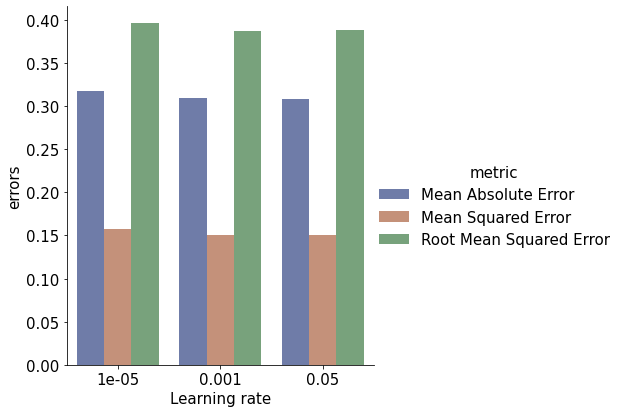

In [ ]:
g = sns.catplot(
    data=lr_effect, kind="bar",
    x="Learning rate", y="errors", hue="metric", palette="dark", alpha=.6, height=6, estimator = np.mean, ci=95
)

It can be seen that the higher learning rate i.e. 0.05 has the least amount of error while 1e-5 has the highest error.